In [1]:
library(Seurat)

library(dplyr)
library(glue)
library(ggplot2)
library(patchwork)
library(cowplot)
library(stringr)
library(tidyr)
library("dplyr")
library(velocyto.R)
library(stringr)
library(SeuratWrappers)
library(DAseq)
load("manual_label.RData")


Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘glue’


The following object is masked from ‘package:dplyr’:

    collapse



Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




# cluster size difference

In [546]:
cell_data %>%
    group_by(orig.ident) %>%
    dplyr::summarise(Total_cell = n()) 

orig.ident Total_cell
1 mWT        7341      
2 mNFIXko    6608

In [543]:
Total_cell

ERROR: Error in eval(expr, envir, enclos): object 'Total_cell' not found


In [454]:
a=cell_data %>%
    group_by(orig.ident) %>%
    summarise(Total_cell = n()) 
cell_data2 = merge(cell_data,a,by=c("orig.ident"))

In [455]:
head(cell_data2)

orig.ident nCount_RNA nFeature_RNA nCount_ADT nFeature_ADT percent.mt
1 mNFIXko     4737      2155          89        8            5.552037  
2 mNFIXko    15511      3995         193        8            2.952743  
3 mNFIXko     3395      1268         205        8            4.918999  
4 mNFIXko    25841      4636         147        8            2.778530  
5 mNFIXko    16922      3965         179        8            3.102470  
6 mNFIXko     5433      2041          81        7            4.196576  
  RNA.weight ADT.weight wsnn_res.1 seurat_clusters ⋯ id        manual_label
1 0.1015684  0.8984316  2          2               ⋯ reference ST-HSC.1    
2 0.4737958  0.5262042  4          4               ⋯ reference GMP         
3 0.4150431  0.5849569  15         15              ⋯ reference CMP         
4 0.4444899  0.5555101  6          6               ⋯ reference ERP         
5 0.3529422  0.6470578  4          4               ⋯ reference GMP         
6 0.4531319  0.5468681  8          8               ⋯ reference MEP         
  wnnUMAP_1 wnnUMAP_2  manual_label2 S.Score     G2M.Score   Phase old.ident
1 -2.328212  0.3204321 2             -0.40530887 -0.32063295 G1    2        
2 -1.660308 -5.7972487 4             -0.02985259 -0.23209984 G1    4        
3 -3.000256 -2.8317748 15            -0.25345630 -0.12464347 G1    15       
4  6.095256 -0.9013358 6              0.01904253  0.17508981 G2M   6        
5 -1.771326 -6.1404608 4             -0.23932885  0.09855647 G2M   4        
6  1.720611  1.1890206 8             -0.01348139 -0.16219753 G1    8        
  Total_cell
1 6608      
2 6608      
3 6608      
4 6608      
5 6608      
6 6608

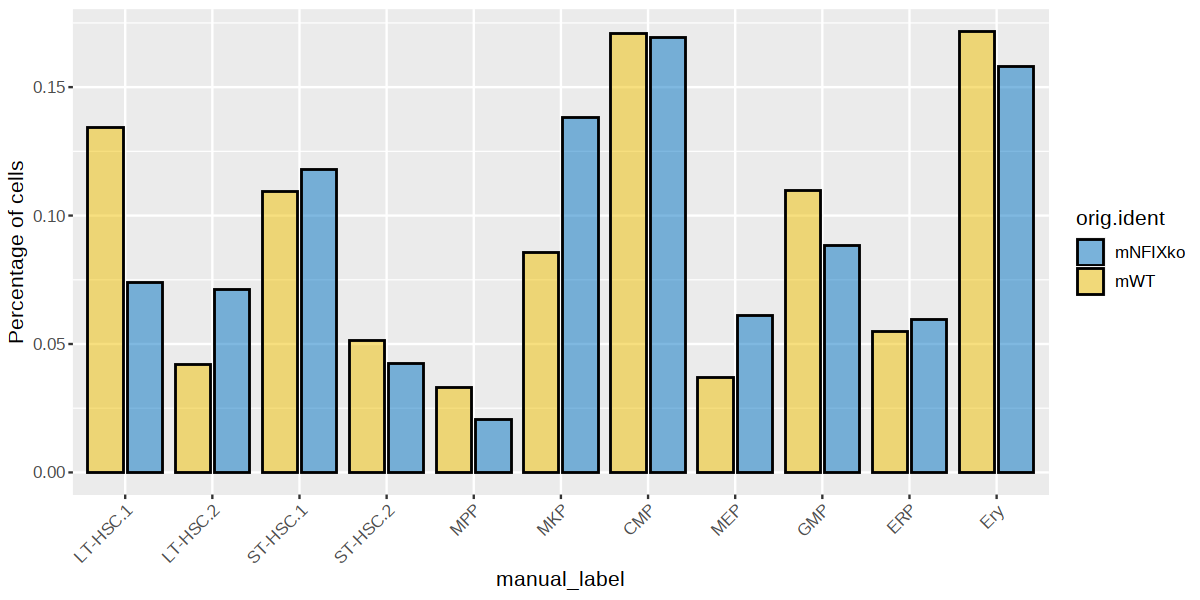

In [461]:
ggplot(cell_data2, aes(x = manual_label, fill = orig.ident,Total_cell=Total_cell)) +
    geom_bar(aes( y=..count../..Total_cell..),position=position_dodge2(reverse = TRUE),size=0.6,alpha=0.5,color="black") +
    # theme_minimal()
    scale_x_discrete(limits =new_level)+
scale_fill_manual(values = c("#0073C2FF","#EFC000FF"))+theme(axis.text.x = element_text(angle = 45, vjust =1, hjust=1),
                                                             text = element_text(size=12))+
ylab("Percentage of cells")
ggsave("cluster_size.norm.barplot.pdf",width=7,height=4)


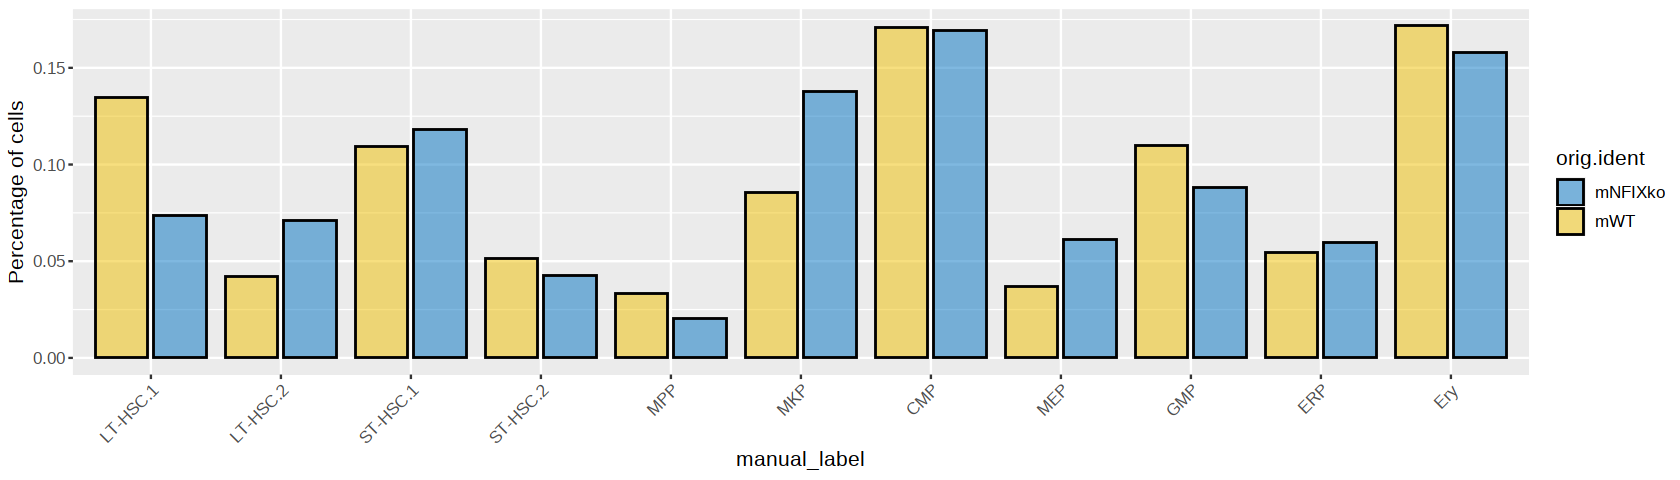

In [595]:
ggplot(cell_data2, aes(x = manual_label, fill = orig.ident,Total_cell=Total_cell)) +
    geom_bar(aes( y=..count../..Total_cell..),position=position_dodge2(reverse = TRUE),size=0.6,alpha=0.5,color="black") +
    # theme_minimal()
    scale_x_discrete(limits =new_level)+
scale_fill_manual(values = c("#0073C2FF","#EFC000FF"))+theme(axis.text.x = element_text(angle = 45, vjust =1, hjust=1),
                                                             text = element_text(size=12))+
ylab("Percentage of cells")
# ggsave("cluster_size.norm.barplot.pdf",width=7,height=4)


In [600]:
write.table(cell_data2,"cell_data2.tsv",sep="\t")

In [563]:
cell_data

orig.ident nCount_RNA nFeature_RNA nCount_ADT
mWT_AAACCCAAGTGATCGG-1     mWT         3787      1690         103       
mWT_AAACCCACAAACCATC-1     mWT        13420      3991         284       
mWT_AAACCCACACTGTCCT-1     mWT        20299      4446         208       
mWT_AAACCCACAGCCATTA-1     mWT        11463      3649         180       
mWT_AAACCCAGTACCTAAC-1     mWT        22463      5146         414       
mWT_AAACCCAGTCCTCCTA-1     mWT        28107      5085         196       
mWT_AAACCCAGTGAATTAG-1     mWT        19208      4646         341       
mWT_AAACCCAGTTCTCTCG-1     mWT        19647      4037         221       
mWT_AAACCCATCAAATGAG-1     mWT        18893      4245         389       
mWT_AAACCCATCTGTCCCA-1     mWT         4328      1881          58       
mWT_AAACGAAAGATTTGCC-1     mWT         7124      2374          42       
mWT_AAACGAAAGCCTCGTG-1     mWT        22751      4418         230       
mWT_AAACGAAAGGAACGTC-1     mWT        10575      3052          59       
mWT_AAACGAACAACCAGAG-1     mWT        17856      4043         191       
mWT_AAACGAACAAGCAGGT-1     mWT        11934      3719         247       
mWT_AAACGAACACATCATG-1     mWT        20066      4234         297       
mWT_AAACGAATCCGTAATG-1     mWT        22187      4761         450       
mWT_AAACGAATCCTTCAGC-1     mWT        16976      4131         305       
mWT_AAACGAATCGAAGGAC-1     mWT         3817      1681         129       
mWT_AAACGAATCGGCTTCT-1     mWT         2896      1274         107       
mWT_AAACGAATCGTAGCTA-1     mWT        10332      3092          87       
mWT_AAACGAATCTTGGCTC-1     mWT         5459      2513         327       
mWT_AAACGAATCTTGGTGA-1     mWT        22797      4573         274       
mWT_AAACGCTAGCGCCCAT-1     mWT        12258      3779          91       
mWT_AAACGCTAGCTGACAG-1     mWT        18410      4636         530       
mWT_AAACGCTAGTGCGACA-1     mWT        16030      4180         405       
mWT_AAACGCTCAAGTGACG-1     mWT         4721      1961         114       
mWT_AAACGCTCATACAGGG-1     mWT        14127      3632         123       
mWT_AAACGCTGTCTTGCGG-1     mWT        23734      4434         209       
mWT_AAACGCTGTGTCATCA-1     mWT        15737      4025         261       
⋮                          ⋮          ⋮          ⋮            ⋮         
mNFIXko_TTTGACTGTTCAGGTT-1 mNFIXko    16322      4449         113       
mNFIXko_TTTGACTGTTTGAAAG-1 mNFIXko    12399      3252         256       
mNFIXko_TTTGACTTCAAGCCGC-1 mNFIXko     7240      2691         304       
mNFIXko_TTTGACTTCACTTTGT-1 mNFIXko     7846      2746         343       
mNFIXko_TTTGACTTCCACCTCA-1 mNFIXko    17872      4356         286       
mNFIXko_TTTGATCAGCAGCCCT-1 mNFIXko    25676      5034         231       
mNFIXko_TTTGATCCACAACGAG-1 mNFIXko     6101      2346          81       
mNFIXko_TTTGATCCAGCAGTTT-1 mNFIXko     4863      1973         159       
mNFIXko_TTTGATCGTAATTGGA-1 mNFIXko    38478      5664         514       
mNFIXko_TTTGATCGTCGGAACA-1 mNFIXko     4307      1763         113       
mNFIXko_TTTGATCGTTGCTGAT-1 mNFIXko    11835      3479         252       
mNFIXko_TTTGGAGAGTCATGGG-1 mNFIXko    13906      3701         167       
mNFIXko_TTTGGAGAGTTCTCTT-1 mNFIXko     3710      1614         164       
mNFIXko_TTTGGAGCAAACTGCT-1 mNFIXko     4523      1800         159       
mNFIXko_TTTGGAGCAAATACAG-1 mNFIXko    10532      3562          83       
mNFIXko_TTTGGAGCAGGCGAAT-1 mNFIXko     7840      2670         115       
mNFIXko_TTTGGAGCATGACTAC-1 mNFIXko     5187      1805         342       
mNFIXko_TTTGGAGGTACTGCCG-1 mNFIXko    11419      3494         388       
mNFIXko_TTTGGAGTCAAGCCAT-1 mNFIXko     9910      3054         242       
mNFIXko_TTTGGTTAGAGCCCAA-1 mNFIXko     6843      2391         421       
mNFIXko_TTTGGTTGTCTTGCTC-1 mNFIXko     6319      2424          83       
mNFIXko_TTTGGTTGTGGCAACA-1 mNFIXko    11909      3372         134       
mNFIXko_TTTGGTTTCAACACCA-1 mNFIXko     7124      2548          84       
mNFIXko_TTTG

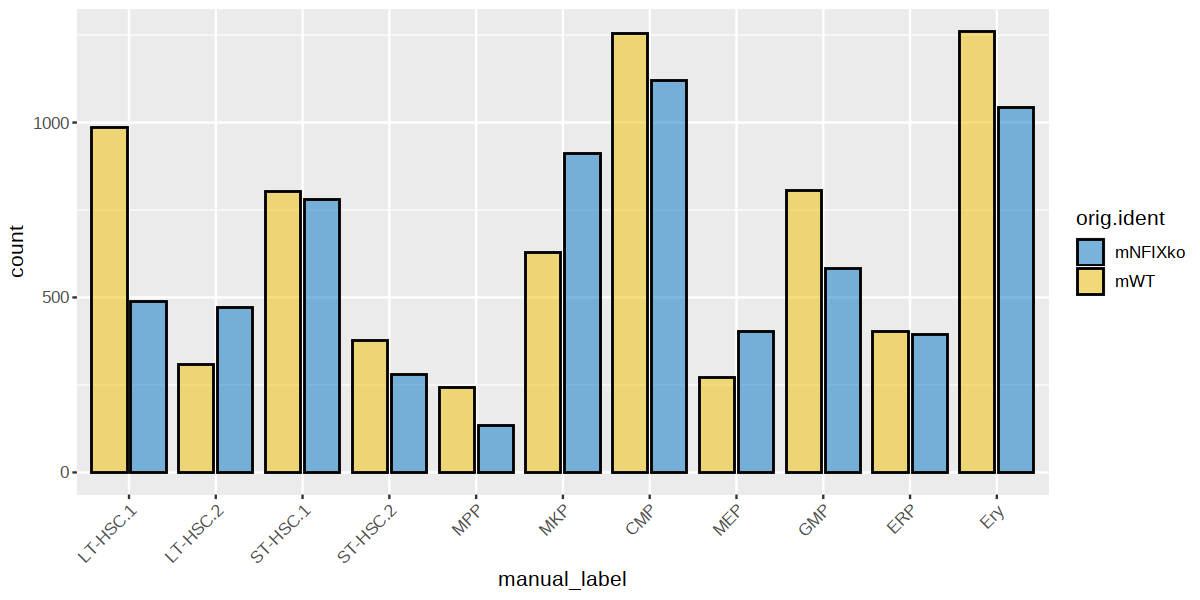

In [326]:
library(viridis)  # Load viridis for the viridis palette

# options(repr.plot.width = 13, repr.plot.height = 5)
# genes=c('Mllt3','Mpl',"Mecom","Hlf","Ifitm1","Meis1",'Sox4',"Top2a","Hmgb2","Pbx1","Cavin2","Cd34",'H2afy',"Apoe","Gata2","Mpo","Med21","Elane","Klf1","Car1","Ermap","Hbb-bs","Hba-a1")
new_level = c("LT-HSC.1","LT-HSC.2","ST-HSC.1","ST-HSC.2","MPP","MKP","CMP","MEP","GMP","ERP","Ery")
# DotPlot(merged_obj,features=genes)+
# scale_y_discrete(limits =rev(new_level))+
# theme(axis.text.x = element_text(angle = 45, vjust =1, hjust=1))+
# scale_color_gradientn(colours = viridis::viridis(10))

ggplot(cell_data, aes(x = manual_label, fill = orig.ident)) +
    geom_bar(position=position_dodge2(reverse = TRUE),size=0.6,alpha=0.5,color="black") +
    # theme_minimal()
    scale_x_discrete(limits =new_level)+
scale_fill_manual(values = c("#0073C2FF","#EFC000FF"))+theme(axis.text.x = element_text(angle = 45, vjust =1, hjust=1),
                                                             text = element_text(size=12))
ggsave("cluster_size.barplot.pdf",width=7,height=4)


# cell cycle

In [4]:
s.genes <- str_to_title(cc.genes$s.genes)
g2m.genes <- str_to_title(cc.genes$g2m.genes)
merged_obj <- CellCycleScoring(merged_obj, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE)


Warning message:
“The following features are not present in the object: Mlf1ip, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: Fam64a, Hn1, not searching for symbol synonyms”


Saving 6.67 x 6.67 in image



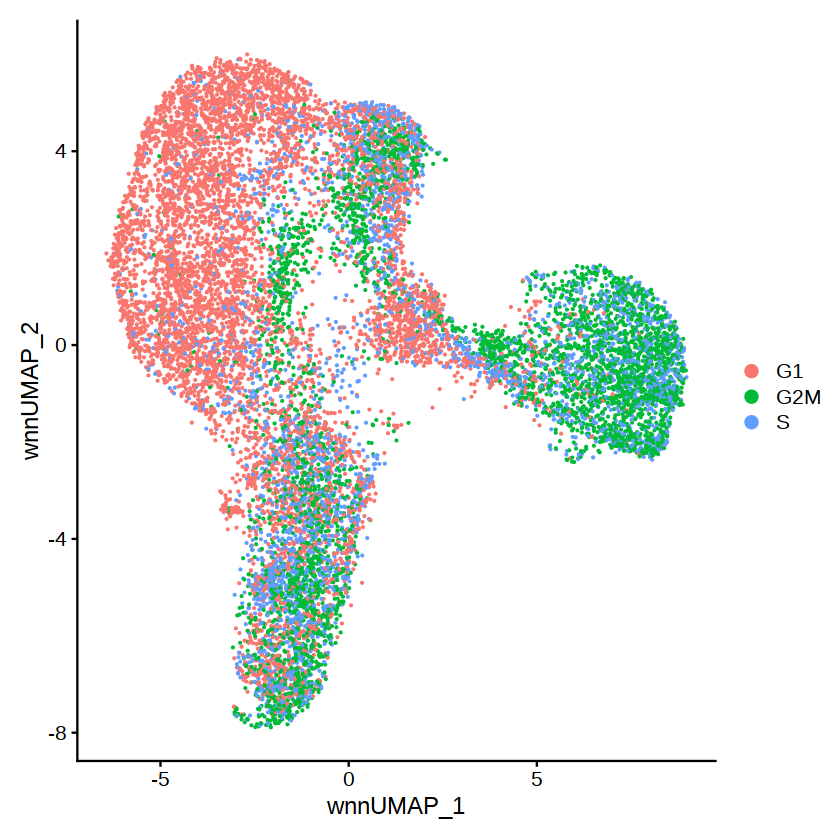

In [6]:
DimPlot(merged_obj,reduction="wnn.umap")
ggsave("Cell_cycle.umap.pdf")

In [9]:
cell_data <- merged_obj[[]]


In [23]:
cell_data %>%
    group_by(manual_label,orig.ident,Phase) %>%
    summarise(Count = n()) %>%
    mutate(Prop = Count / sum(Count))

`summarise()` has grouped output by 'manual_label', 'orig.ident'. You can override using the `.groups` argument.



manual_label orig.ident Phase Count Prop       
1  Ery          mNFIXko    G1     35   0.033557047
2  Ery          mNFIXko    G2M   654   0.627037392
3  Ery          mNFIXko    S     354   0.339405561
4  Ery          mWT        G1     20   0.015860428
5  Ery          mWT        G2M   898   0.712133228
6  Ery          mWT        S     343   0.272006344
7  CMP          mNFIXko    G1    489   0.436607143
8  CMP          mNFIXko    G2M   270   0.241071429
9  CMP          mNFIXko    S     361   0.322321429
10 CMP          mWT        G1    480   0.382775120
11 CMP          mWT        G2M   367   0.292663477
12 CMP          mWT        S     407   0.324561404
13 ST-HSC.1     mNFIXko    G1    707   0.907573813
14 ST-HSC.1     mNFIXko    G2M     8   0.010269576
15 ST-HSC.1     mNFIXko    S      64   0.082156611
16 ST-HSC.1     mWT        G1    710   0.884184309
17 ST-HSC.1     mWT        G2M    17   0.021170610
18 ST-HSC.1     mWT        S      76   0.094645081
19 LT-HSC.1     mNFIXko    G1    468   0.959016393
20 LT-HSC.1     mNFIXko    G2M     2   0.004098361
21 LT-HSC.1     mNFIXko    S      18   0.036885246
22 LT-HSC.1     mWT        G1    926   0.938196555
23 LT-HSC.1     mWT        G2M     7   0.007092199
24 LT-HSC.1     mWT        S      54   0.054711246
25 GMP          mNFIXko    G1    147   0.251712329
26 GMP          mNFIXko    G2M   251   0.429794521
27 GMP          mNFIXko    S     186   0.318493151
28 GMP          mWT        G1    206   0.255900621
29 GMP          mWT        G2M   378   0.469565217
30 GMP          mWT        S     221   0.274534161
⋮  ⋮            ⋮          ⋮     ⋮     ⋮          
36 MKP          mWT        S     198   0.31478537 
37 ERP          mNFIXko    G1     91   0.23155216 
38 ERP          mNFIXko    G2M   172   0.43765903 
39 ERP          mNFIXko    S     130   0.33078880 
40 ERP          mWT        G1     61   0.15174129 
41 ERP          mWT        G2M   216   0.53731343 
42 ERP          mWT        S     125   0.31094527 
43 LT-HSC.2     mNFIXko    G1    421   0.89574468 
44 LT-HSC.2     mNFIXko    G2M     9   0.01914894 
45 LT-HSC.2     mNFIXko    S      40   0.08510638 
46 LT-HSC.2     mWT        G1    270   0.87662338 
47 LT-HSC.2     mWT        G2M     8   0.02597403 
48 LT-HSC.2     mWT        S      30   0.09740260 
49 MEP          mNFIXko    G1    319   0.79156328 
50 MEP          mNFIXko    G2M    19   0.04714640 
51 MEP          mNFIXko    S      65   0.16129032 
52 MEP          mWT        G1    193   0.71481481 
53 MEP          mWT        G2M    23   0.08518519 
54 MEP          mWT        S      54   0.20000000 
55 ST-HSC.2     mNFIXko    G1    256   0.91103203 
56 ST-HSC.2     mNFIXko    G2M     3   0.01067616 
57 ST-HSC.2     mNFIXko    S      22   0.07829181 
58 ST-HSC.2     mWT        G1    324   0.85714286 
59 ST-HSC.2     mWT        G2M    11   0.02910053 
60 ST-HSC.2     mWT        S      43   0.11375661 
61 MPP          mNFIXko    G2M    77   0.57037037 
62 MPP          mNFIXko    S      58   0.42962963 
63 MPP          mWT        G1      3   0.01229508 
64 MPP          mWT        G2M   174   0.71311475 
65 MPP          mWT        S      67   0.27459016

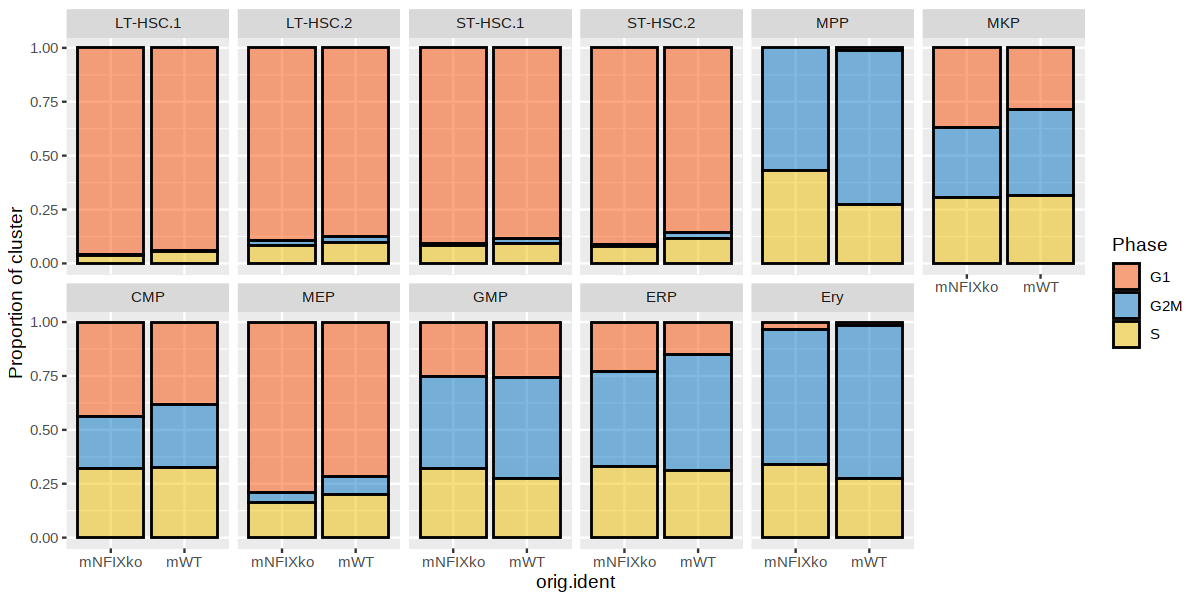

In [318]:
ggplot(plot_data, aes(x = orig.ident, y = Prop, fill = Phase)) + 
    facet_wrap( ~manual_label, ncol = 6)+
    geom_col(size=0.6,alpha=0.5,color="black") +
    ylab("Proportion of cluster") +
    scale_fill_manual(values = c("#FC4E07","#0073C2FF","#EFC000FF"))+scale_alpha(0.5)


`summarise()` has grouped output by 'manual_label', 'orig.ident'. You can override using the `.groups` argument.



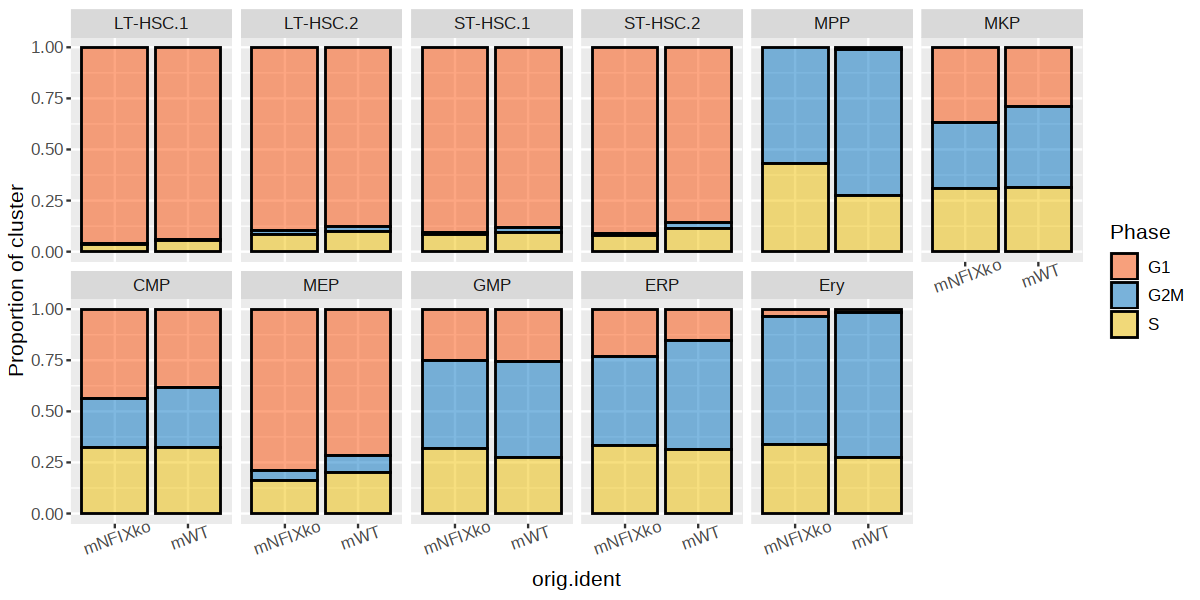

In [332]:
options(repr.plot.width = 10, repr.plot.height = 5)

# new_level = c("LT-HSC.1","LT-HSC.2","ST-HSC.1","ST-HSC.2","MPP","MKP","CMP","MEP","GMP","ERP","Ery")
# ggplot(cell_data, aes(x = manual_label, fill = orig.ident)) +
#     geom_bar(position=position_dodge2(reverse = TRUE),size=0.6,alpha=0.5,color="black") +
#     scale_x_discrete(limits =new_level)+
# scale_fill_manual(values = c("#0073C2FF","#EFC000FF"))


plot_data = cell_data %>%
    group_by(manual_label,orig.ident,Phase) %>%
    summarise(Count = n()) %>%
    mutate(Prop = Count / sum(Count))
plot_data$manual_label <- factor(x = plot_data$manual_label, levels = new_level)

# head(plot_data)
ggplot(plot_data, aes(x = orig.ident, y = Prop, fill = Phase)) + 
    facet_wrap( ~manual_label, ncol = 6)+
    geom_col(size=0.6,alpha=0.5,color="black") +
    ylab("Proportion of cluster") +
    scale_fill_manual(values = c("#FC4E07","#0073C2FF","#EFC000FF"))+theme(axis.text.x = element_text(angle = 20, vjust =1, hjust=0.5),
                                                             text = element_text(size=12))

ggsave("Cell_cycle.barplot.WT_vs_KO.pdf",width=7,heigh=4)

# 3D density

Setting default values for Cornell box: lookfrom `c(278,278,-800)` lookat `c(278,278,0)` fov `40` .



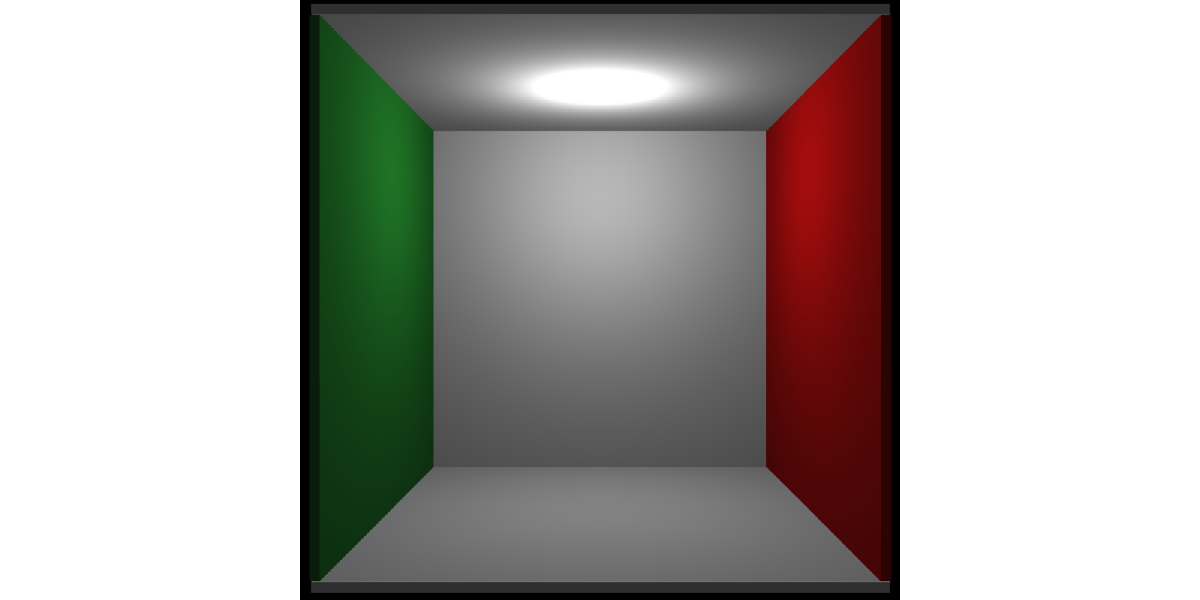

In [84]:
library(rayshader)
library(rayvertex)

generate_cornell_mesh() %>% 
  rasterize_scene()

TinyObjReader: Vertex texcoord indices out of bounds (line 3390598.)



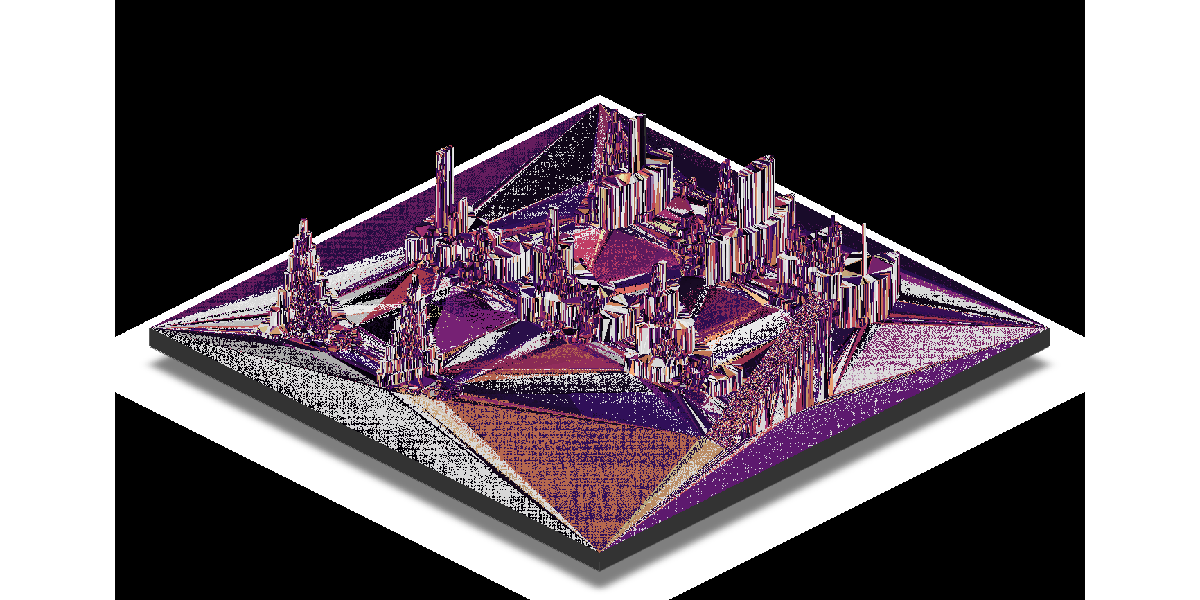

In [85]:
library(rayshader)

library(ggplot2)
library(viridis)
#> Loading required package: viridisLite
# \dontshow{
options("cores"=2)
# }

ggdiamonds = ggplot(diamonds, aes(x, depth)) +
 stat_density_2d(aes(fill = stat(nlevel)), geom = "polygon", n = 200, bins = 50,contour = TRUE) +
 facet_wrap(clarity~.) +
 scale_fill_viridis_c(option = "A")
# \dontrun{
plot_gg(ggdiamonds,multicore = TRUE,width=5,height=5,scale=250,windowsize=c(1400,866),
       zoom = 0.55, phi = 30)
render_snapshot()

In [86]:
head(cell_data)

orig.ident nCount_RNA nFeature_RNA nCount_ADT
mWT_AAACCCAAGTGATCGG-1 mWT         3787      1690         103       
mWT_AAACCCACAAACCATC-1 mWT        13420      3991         284       
mWT_AAACCCACACTGTCCT-1 mWT        20299      4446         208       
mWT_AAACCCACAGCCATTA-1 mWT        11463      3649         180       
mWT_AAACCCAGTACCTAAC-1 mWT        22463      5146         414       
mWT_AAACCCAGTCCTCCTA-1 mWT        28107      5085         196       
                       nFeature_ADT percent.mt RNA.weight  ADT.weight
mWT_AAACCCAAGTGATCGG-1 7            5.307631   0.129729865 0.8702701 
mWT_AAACCCACAAACCATC-1 8            3.204173   0.040801805 0.9591982 
mWT_AAACCCACACTGTCCT-1 7            1.059165   0.135924221 0.8640758 
mWT_AAACCCACAGCCATTA-1 8            2.852656   0.118308303 0.8816917 
mWT_AAACCCAGTACCTAAC-1 8            3.770645   0.001217896 0.9987821 
mWT_AAACCCAGTCCTCCTA-1 8            1.946134   0.093460246 0.9065398 
                       wsnn_res.1 seurat_clusters ⋯ Bone_pred       id       
mWT_AAACCCAAGTGATCGG-1 9          9               ⋯ 9               reference
mWT_AAACCCACAAACCATC-1 3          3               ⋯ 3               reference
mWT_AAACCCACACTGTCCT-1 0          0               ⋯ Progenitor Cell reference
mWT_AAACCCACAGCCATTA-1 9          9               ⋯ 9               reference
mWT_AAACCCAGTACCTAAC-1 5          5               ⋯ 5               reference
mWT_AAACCCAGTCCTCCTA-1 6          6               ⋯ 6               reference
                       manual_label wnnUMAP_1  wnnUMAP_2  manual_label2
mWT_AAACCCAAGTGATCGG-1 ST-HSC.2     -4.7057502  1.7845275 9            
mWT_AAACCCACAAACCATC-1 LT-HSC.1     -3.9969773  3.5022456 3            
mWT_AAACCCACACTGTCCT-1 Ery           7.5857146 -0.5133145 0            
mWT_AAACCCACAGCCATTA-1 ST-HSC.2     -4.9241063 -0.0769835 9            
mWT_AAACCCAGTACCTAAC-1 MKP           0.4048008  2.4942974 5            
mWT_AAACCCAGTCCTCCTA-1 ERP           4.1330612 -0.4263477 6            
                       S.Score      G2M.Score   Phase old.ident
mWT_AAACCCAAGTGATCGG-1 -0.264718335 -0.23655684 G1    9        
mWT_AAACCCACAAACCATC-1 -0.292356896 -0.24428204 G1    3        
mWT_AAACCCACACTGTCCT-1 -0.091990828  0.17973530 G2M   0        
mWT_AAACCCACAGCCATTA-1 -0.001030188  0.01822655 G2M   9        
mWT_AAACCCAGTACCTAAC-1 -0.304517525  0.42806296 G2M   5        
mWT_AAACCCAGTCCTCCTA-1 -0.239271139  0.35613581 G2M   6

In [95]:
library(MASS)


Attaching package: ‘MASS’


The following object is masked from ‘package:patchwork’:

    area


The following object is masked from ‘package:dplyr’:

    select




In [96]:
f2 <- kde2d(cell_data$wnnUMAP_1, cell_data$wnnUMAP_2 )

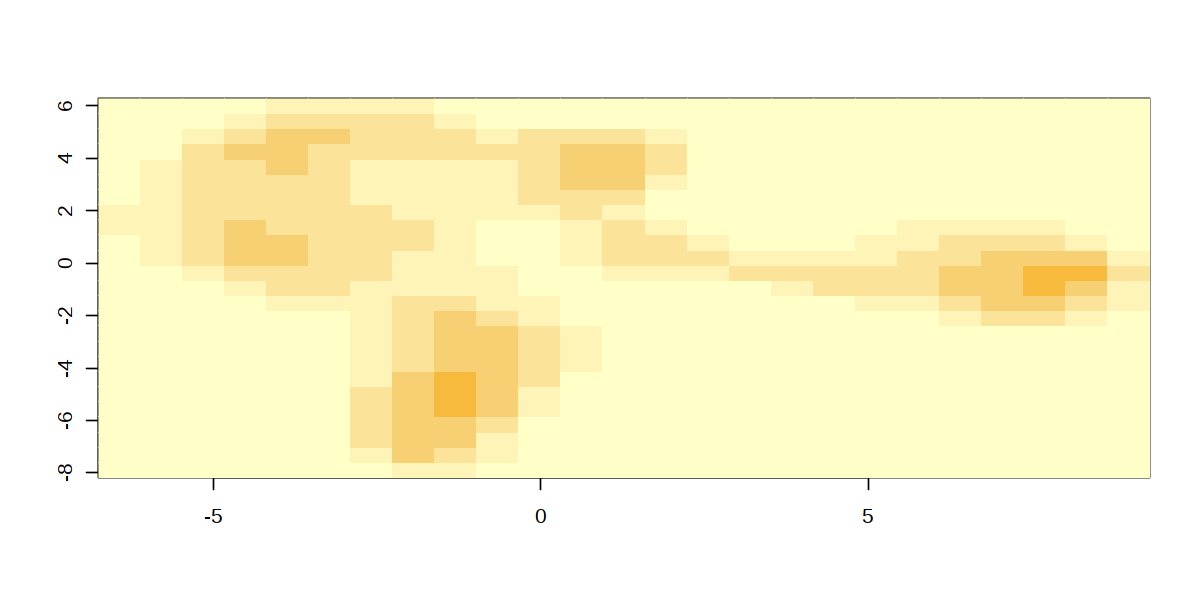

In [98]:
image(f2, zlim = c(0, 0.05))


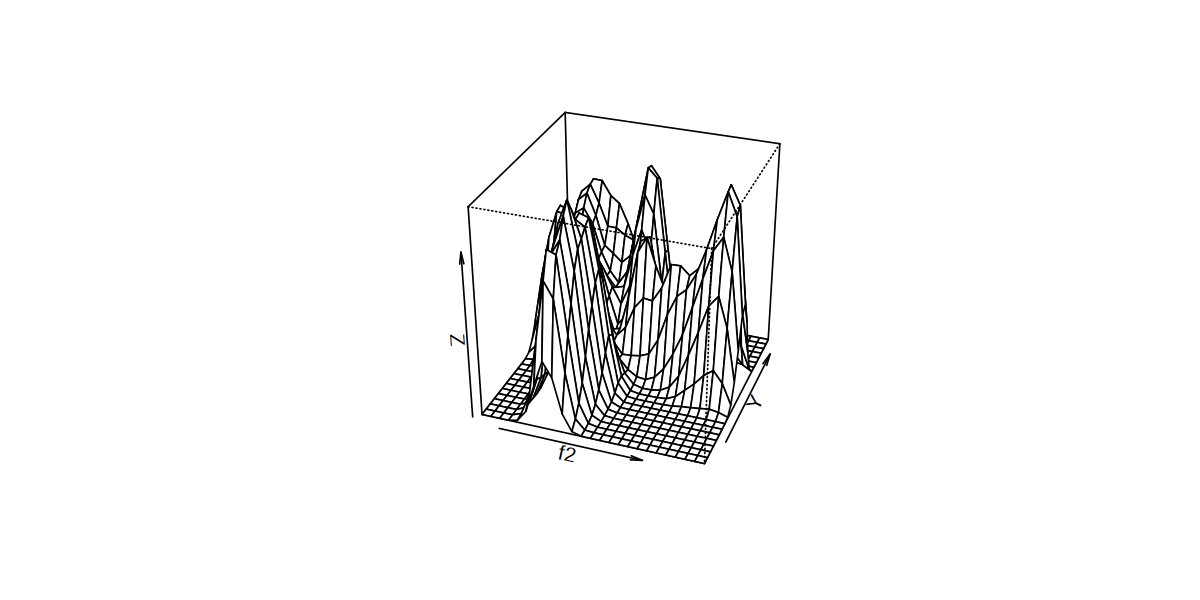

In [99]:
persp(f2, phi = 30, theta = 20, d = 5)


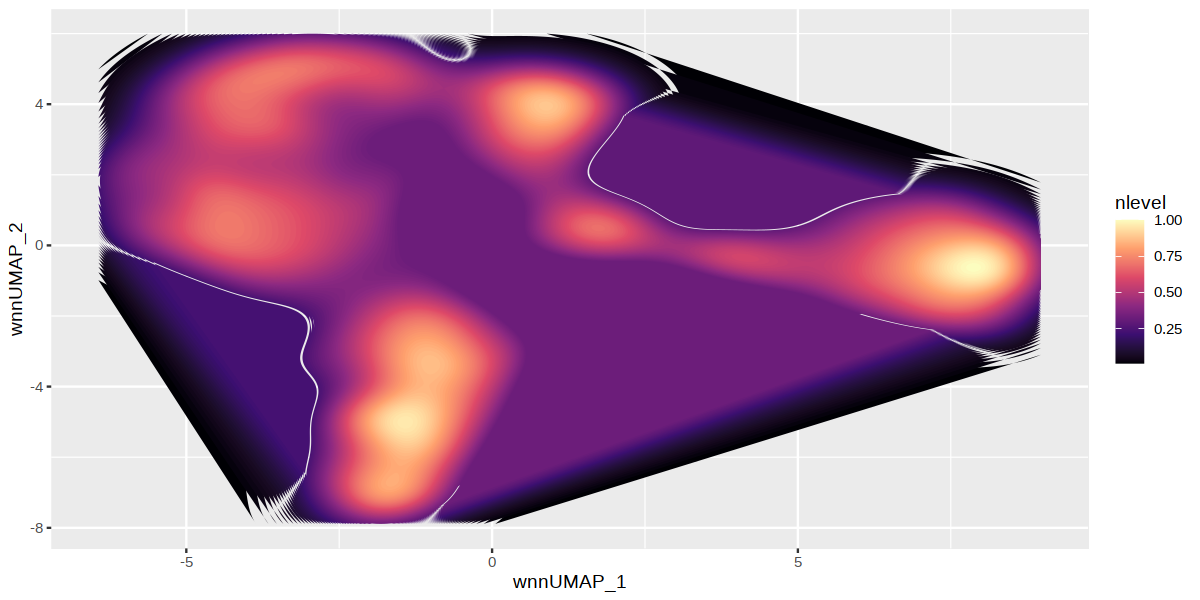

In [104]:
ggplot(cell_data, aes(wnnUMAP_1, wnnUMAP_2)) +
 stat_density_2d(aes(fill = stat(nlevel)), geom = "polygon", n = 500, bins = 100,contour = TRUE) +
 scale_fill_viridis_c(option = "A")

In [107]:
?plot_3d

plot_3d               package:rayshader                R Documentation

_P_l_o_t _3_D

_D_e_s_c_r_i_p_t_i_o_n:

     Displays the shaded map in 3D with the `rgl` package.

_U_s_a_g_e:

     plot_3d(
       hillshade,
       heightmap,
       zscale = 1,
       baseshape = "rectangle",
       solid = TRUE,
       soliddepth = "auto",
       solidcolor = "grey20",
       solidlinecolor = "grey30",
       shadow = TRUE,
       shadowdepth = "auto",
       shadowcolor = "grey50",
       shadowwidth = "auto",
       water = FALSE,
       waterdepth = 0,
       watercolor = "dodgerblue",
       wateralpha = 0.5,
       waterlinecolor = NULL,
       waterlinealpha = 1,
       linewidth = 2,
       lineantialias = FALSE,
       theta = 45,
       phi = 45,
       fov = 0,
       zoom = 1,
       background = "white",
       windowsize = 600,
       precomputed_normals = NULL,
       asp = 1,
       triangulate = FALSE,
       max_error = 0,
       max_tri = 0,
       verbose = FALSE,
       ...
     )
     
_A_r_g_u_m_e_n_t_s:

hillshade: Hillshade/image to be added to 3D surface map.

heightmap: A two-dimensional matrix, where each entry in the matrix is
          the elevation at that point. All points are assumed to be
          evenly spaced.

  zscale: Default `1`. The ratio between the x and y spacing (which are
          assumed to be equal) and the z axis. For example, if the
          elevation levels are in units of 1 meter and the grid values
          are separated by 10 meters, `zscale` would be 10. Adjust the
          zscale down to exaggerate elevation features.

baseshape: Default `rectangle`. Shape of the base. Options are
          c("rectangle","circle","hex").

   solid: Default `TRUE`. If `FALSE`, just the surface is rendered.

soliddepth: Default `auto`, which sets it to the lowest elevation in
          the matrix minus one unit (scaled by zscale). Depth of the
          solid base.

solidcolor: Default `grey20`. Base color.

solidlinecolor: Default `grey30`. Base edge line color.

  shadow: Default `TRUE`. If `FALSE`, no shadow is rendered.

shadowdepth: Default `auto`, which sets it to `soliddepth -
          soliddepth/10`. Depth of the shadow layer.

shadowcolor: Default `grey50`. Color of the shadow.

shadowwidth: Default `auto`, which sizes it to 1/10th the smallest
          dimension of `heightmap`. Width of the shadow in units of the
          matrix.

   water: Default `FALSE`. If `TRUE`, a water layer is rendered.

waterdepth: Default `0`. Water level.

watercolor: Default `lightblue`. Color of the water.

wateralpha: Default `0.5`. Water transparency.

waterlinecolor: Default `NULL`. Color of the lines around the edges of
          the water layer.

waterlinealpha: Default `1`. Water line tranparency.

linewidth: Default `2`. Width of the edge lines in the scene.

lineantialias: Default `FALSE`. Whether to anti-alias the lines in the
          scene.

   theta: Default `45`. Rotation around z-axis.

     phi: Default `45`. Azimuth angle.

     fov: Default `0`-isometric. Field-of-view angle.

    zoom: Default `1`. Zoom factor.

background: Default `grey10`. Color of the background.

windowsize: Default `600`. Position, width, and height of the `rgl`
          device displaying the plot.  If a single number, viewport
          will be a square and located in upper left corner.  If two
          numbers, (e.g. `c(600,800)`), user will specify width and
          height separately.  If four numbers (e.g.
          `c(200,0,600,800)`), the first two coordinates specify the
          location of the x-y coordinates of the bottom-left corner of
          the viewport on the screen, and the next two (or one, if
          square) specify the window size. NOTE: The absolute
          positioning of the window does not currently work on macOS
          (tested on Mojave), but the size can still be specified.

precomputed_normals: Default `NULL`. Takes the output of
          `c

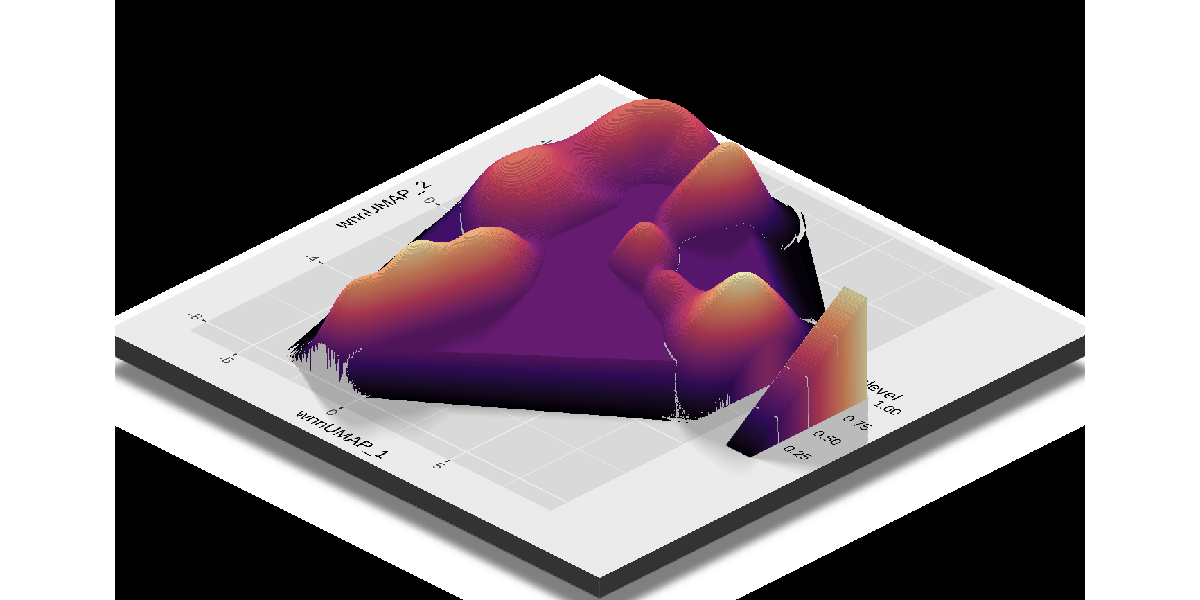

In [118]:
ggdiamonds=ggplot(cell_data, aes(wnnUMAP_1, wnnUMAP_2)) +
 stat_density_2d(aes(fill = stat(nlevel)), geom = "polygon", n = 500, bins = 100,contour = TRUE) +
 scale_fill_viridis_c(option = "A")
plot_gg(ggdiamonds,multicore = TRUE,width=5,height=5,scale=250,
       zoom = 0.5, phi = 30, windowsize=c(1400,866))
render_snapshot(clear = TRUE)

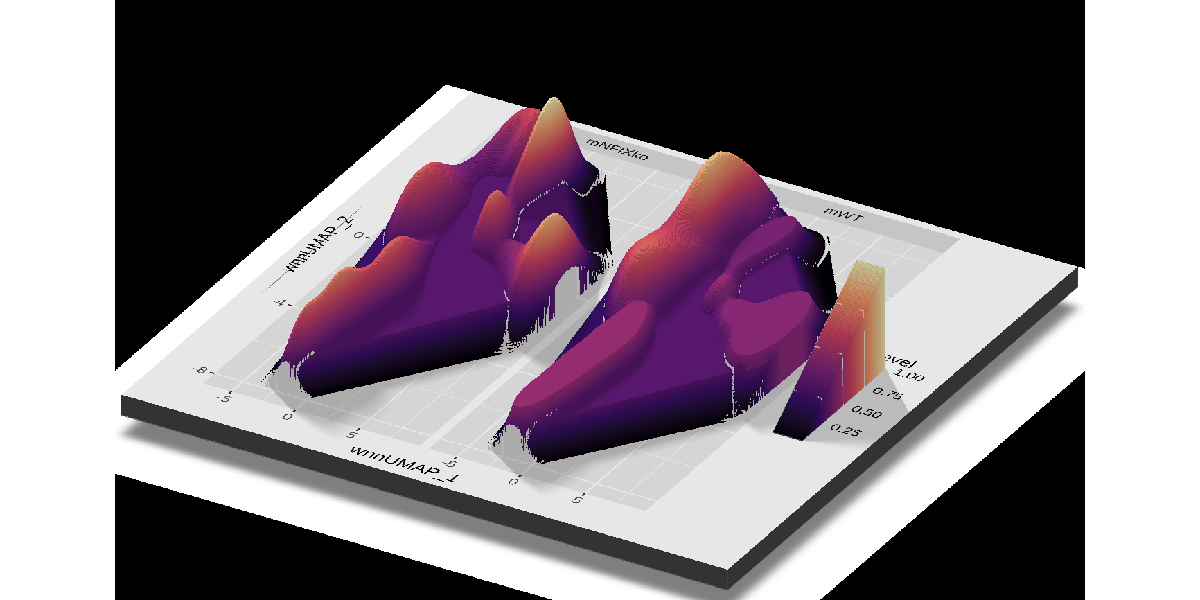

In [123]:
ggdiamonds=ggplot(cell_data, aes(wnnUMAP_1, wnnUMAP_2)) +
 stat_density_2d(aes(fill = stat(nlevel)), geom = "polygon", n = 500, bins = 100,contour = TRUE) +
facet_wrap(orig.ident~.) +
 scale_fill_viridis_c(option = "A")
plot_gg(ggdiamonds,multicore = TRUE,width=5,height=5,scale=250,
       zoom = 0.5, phi = 30,theta=30, windowsize=c(1400,866))
render_snapshot(clear = TRUE)

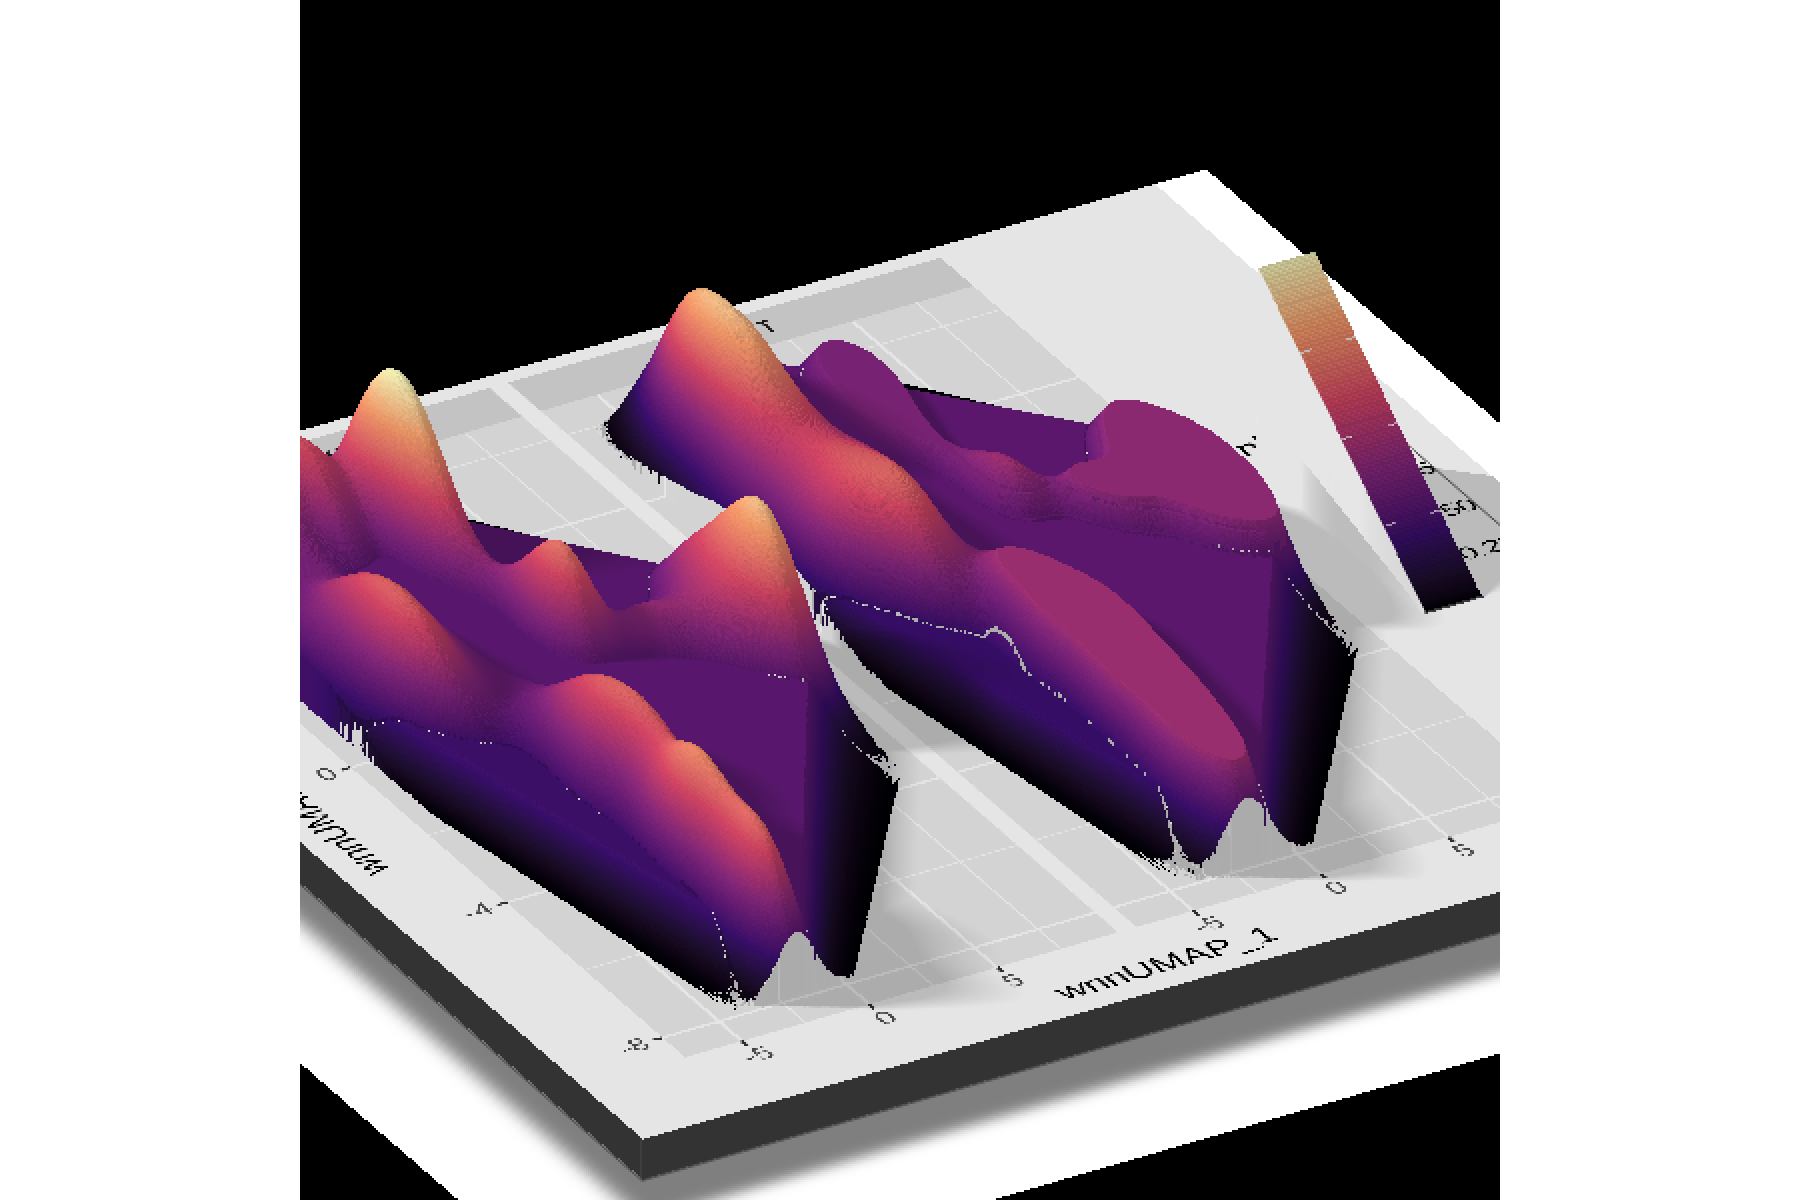

In [124]:
options(repr.plot.width = 15, repr.plot.height = 10)

ggdiamonds=ggplot(cell_data, aes(wnnUMAP_1, wnnUMAP_2)) +
 stat_density_2d(aes(fill = stat(nlevel)), geom = "polygon", n = 500, bins = 500,contour = TRUE) +
facet_wrap(orig.ident~.) +
 scale_fill_viridis_c(option = "A")
plot_gg(ggdiamonds,multicore = TRUE,width=5,height=5,scale=250,
       zoom = 0.5, phi = 30,theta=-30)
render_snapshot(clear = TRUE)

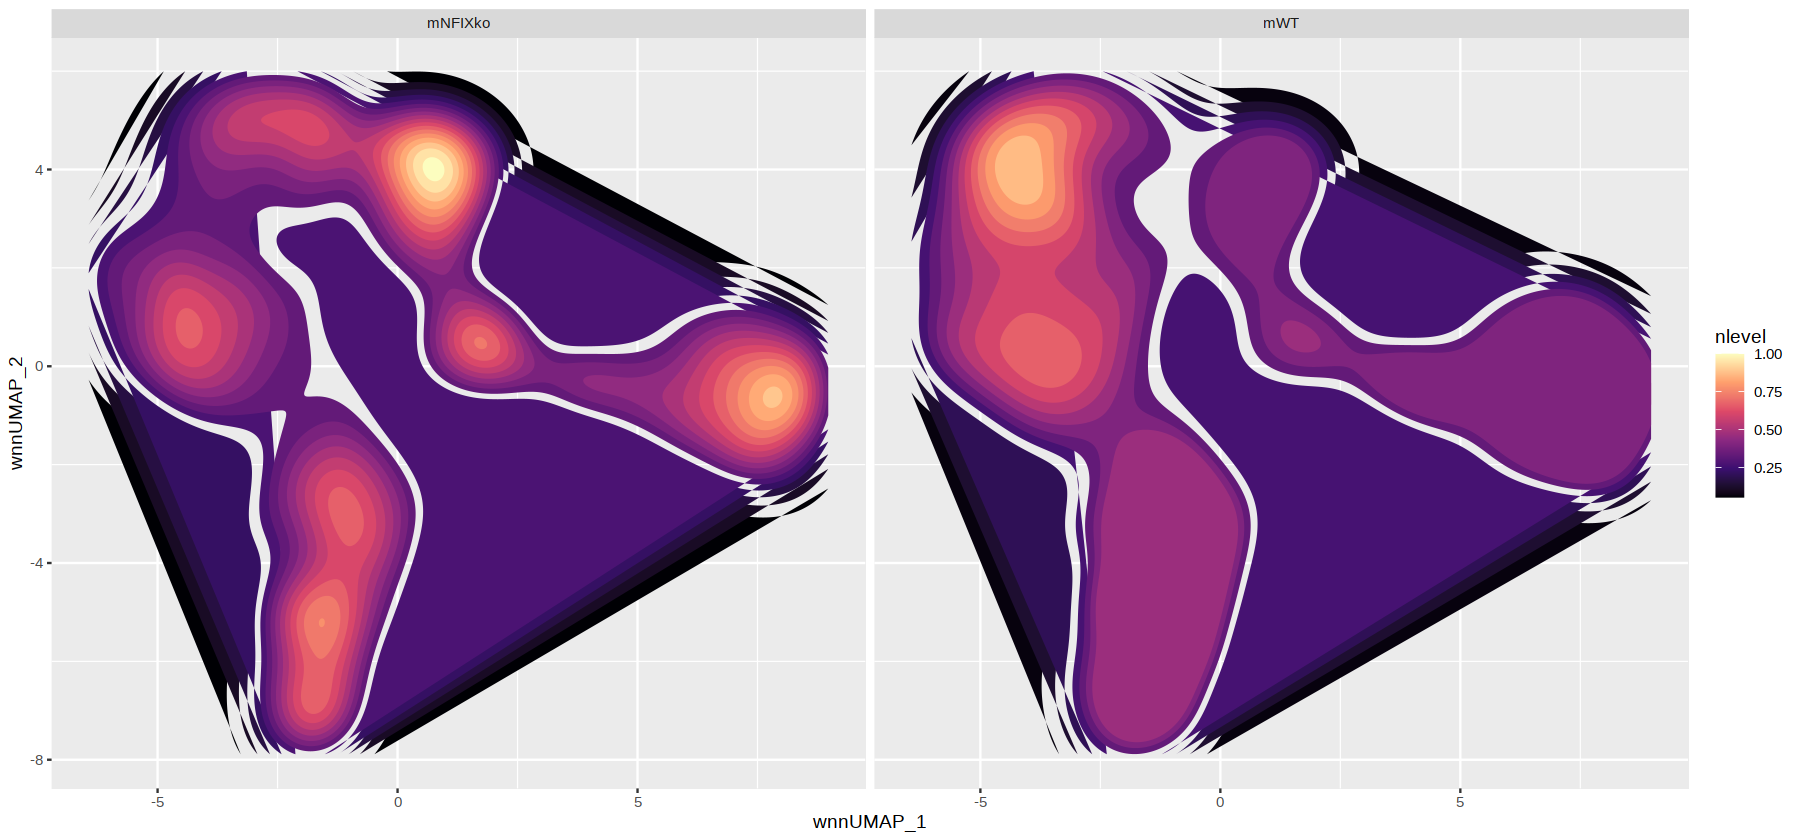

In [130]:
ggplot(cell_data, aes(wnnUMAP_1, wnnUMAP_2)) +
 stat_density_2d(aes(fill = stat(nlevel)), geom = "polygon", n = 2000, bins = 20,contour = TRUE) +
facet_wrap(orig.ident~.) +
 scale_fill_viridis_c(option = "A")

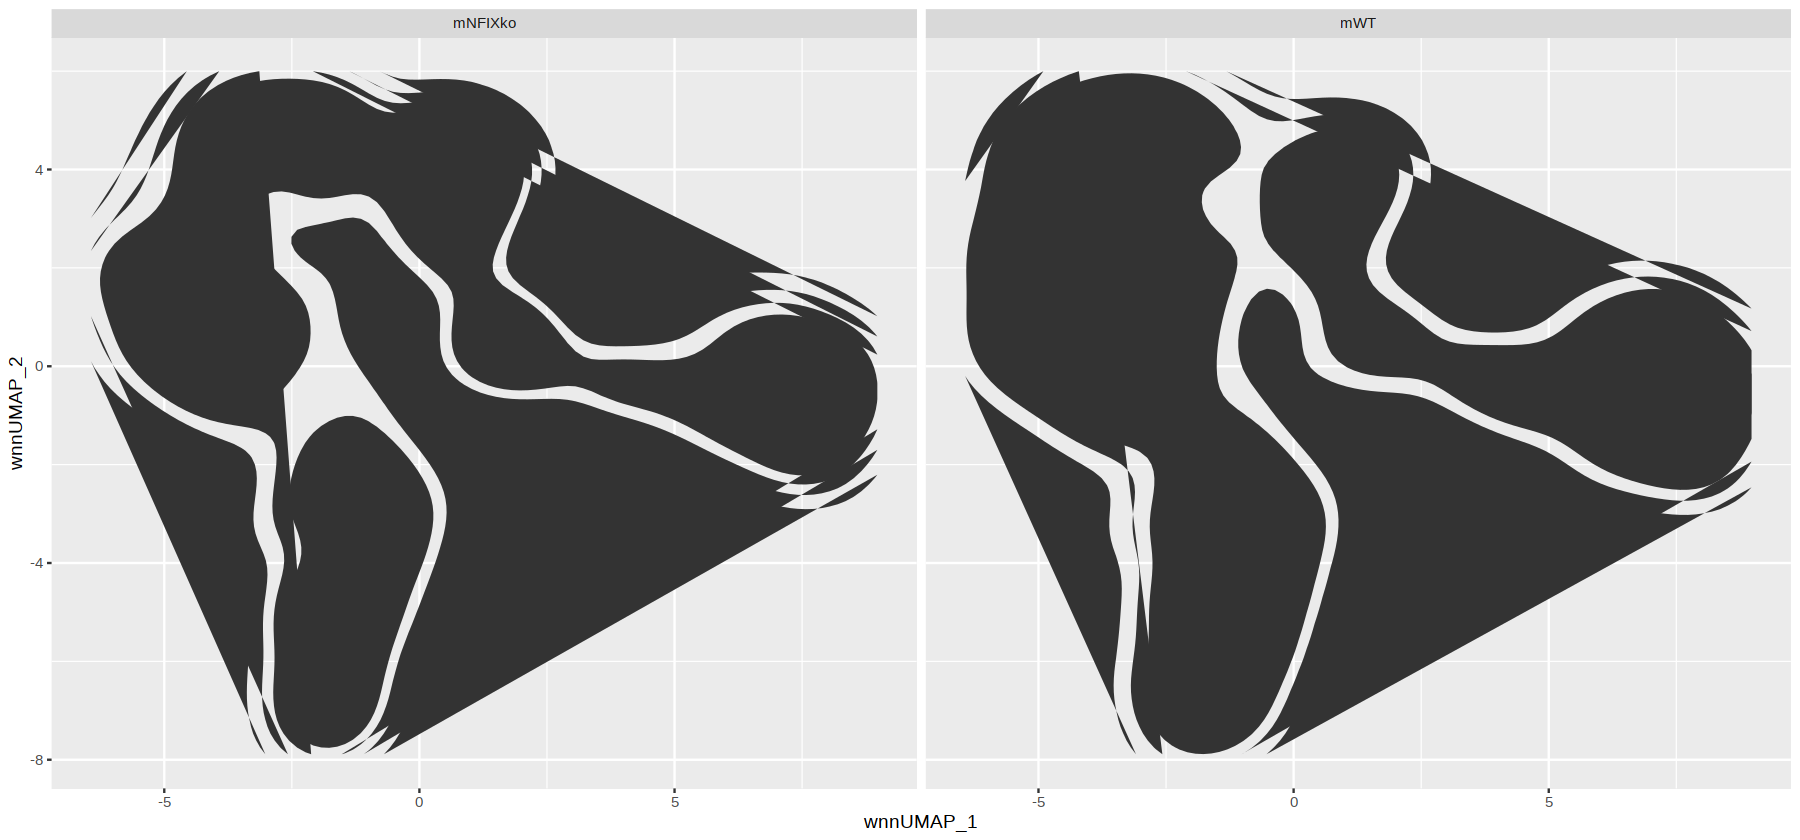

In [134]:
ggplot(cell_data, aes(wnnUMAP_1, wnnUMAP_2)) +
 stat_density_2d(geom = "polygon") +
facet_wrap(orig.ident~.) +
 scale_fill_viridis_c(option = "A")

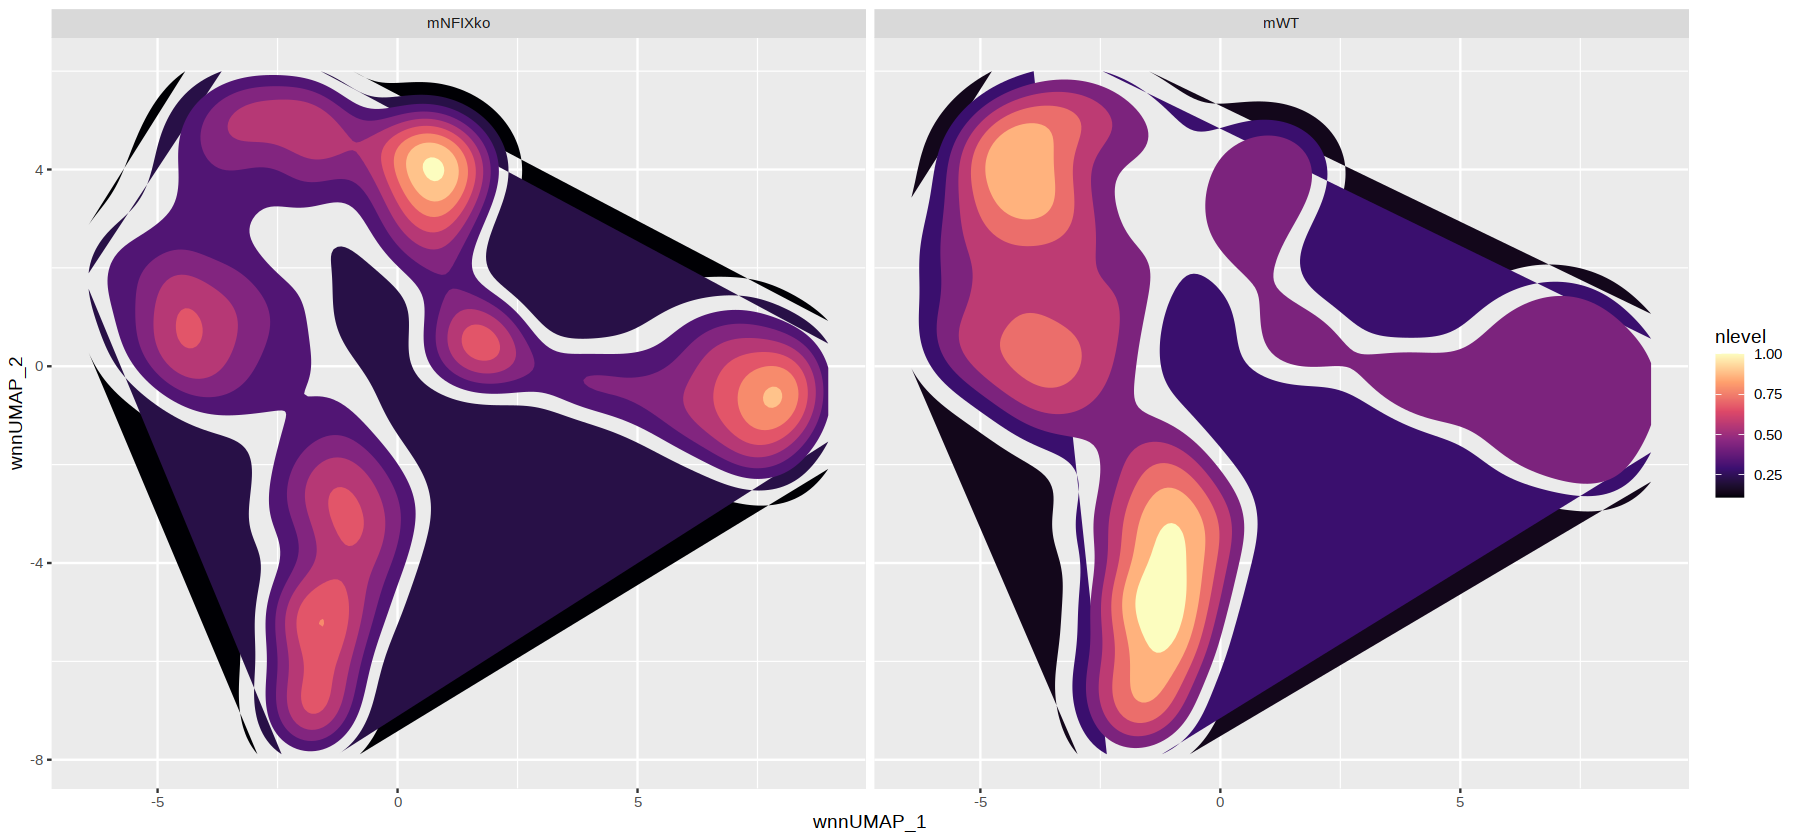

In [140]:
ggplot(cell_data, aes(wnnUMAP_1, wnnUMAP_2)) +
 stat_density_2d(aes(fill = stat(nlevel)), geom = "polygon", n = 200, bins = 10,contour = TRUE) +
facet_wrap(orig.ident~.) +
 scale_fill_viridis_c(option = "A")

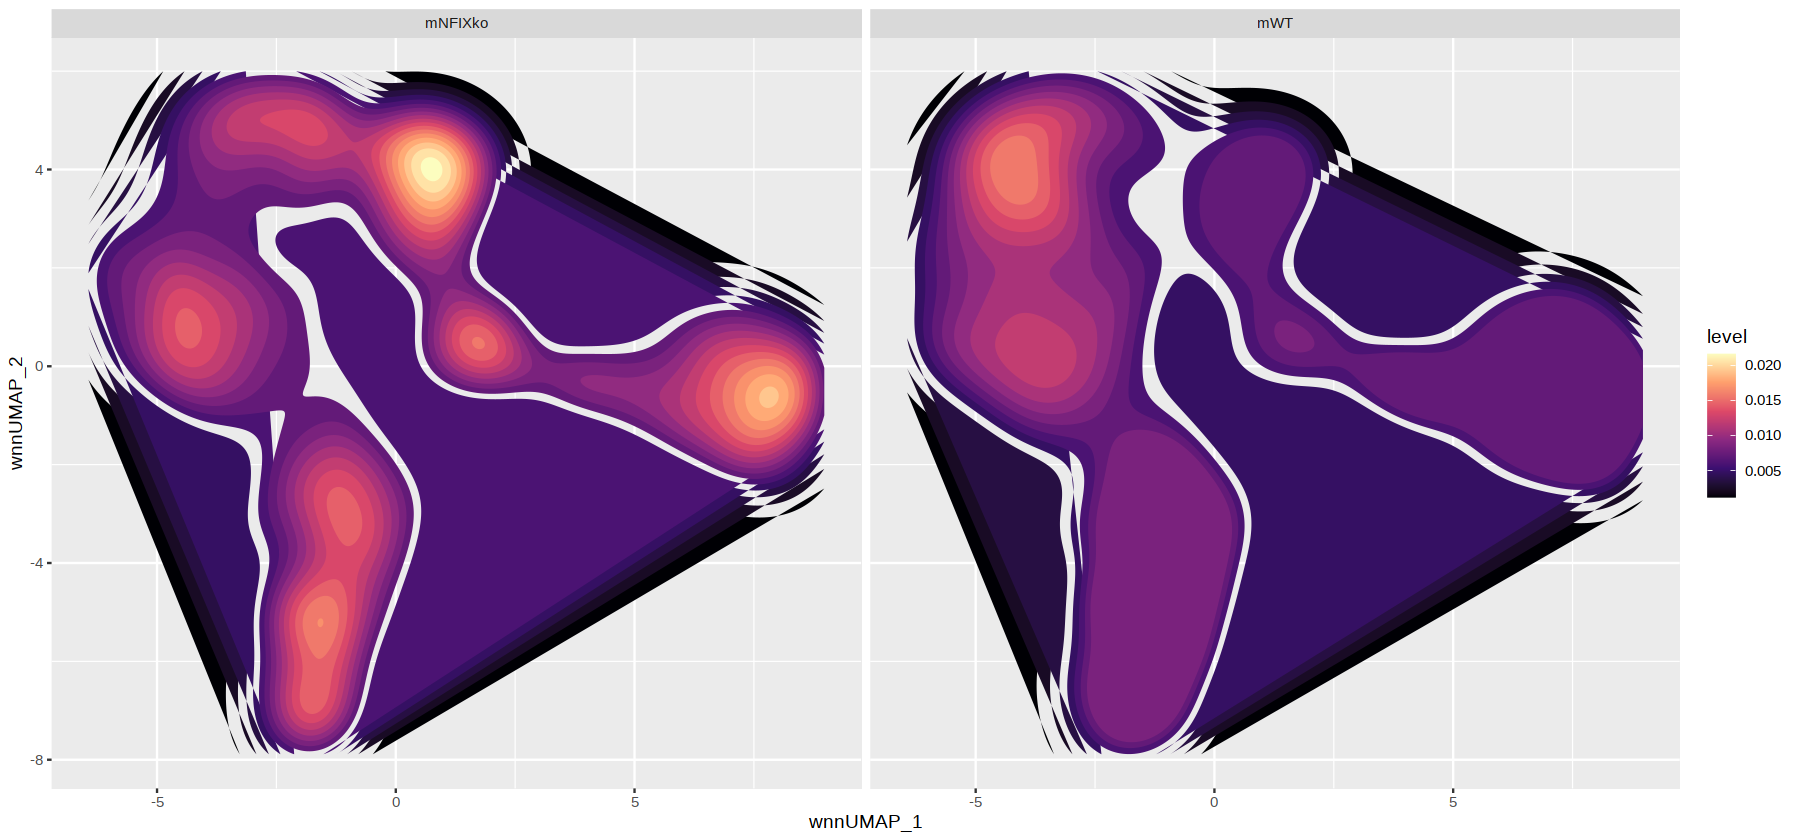

In [159]:
ggplot(cell_data, aes(wnnUMAP_1, wnnUMAP_2)) +
 stat_density_2d(aes(fill = stat(level)), geom = "polygon", n = 2000, bins = 20) +
facet_wrap(orig.ident~.) +
 scale_fill_viridis_c(option = "A")

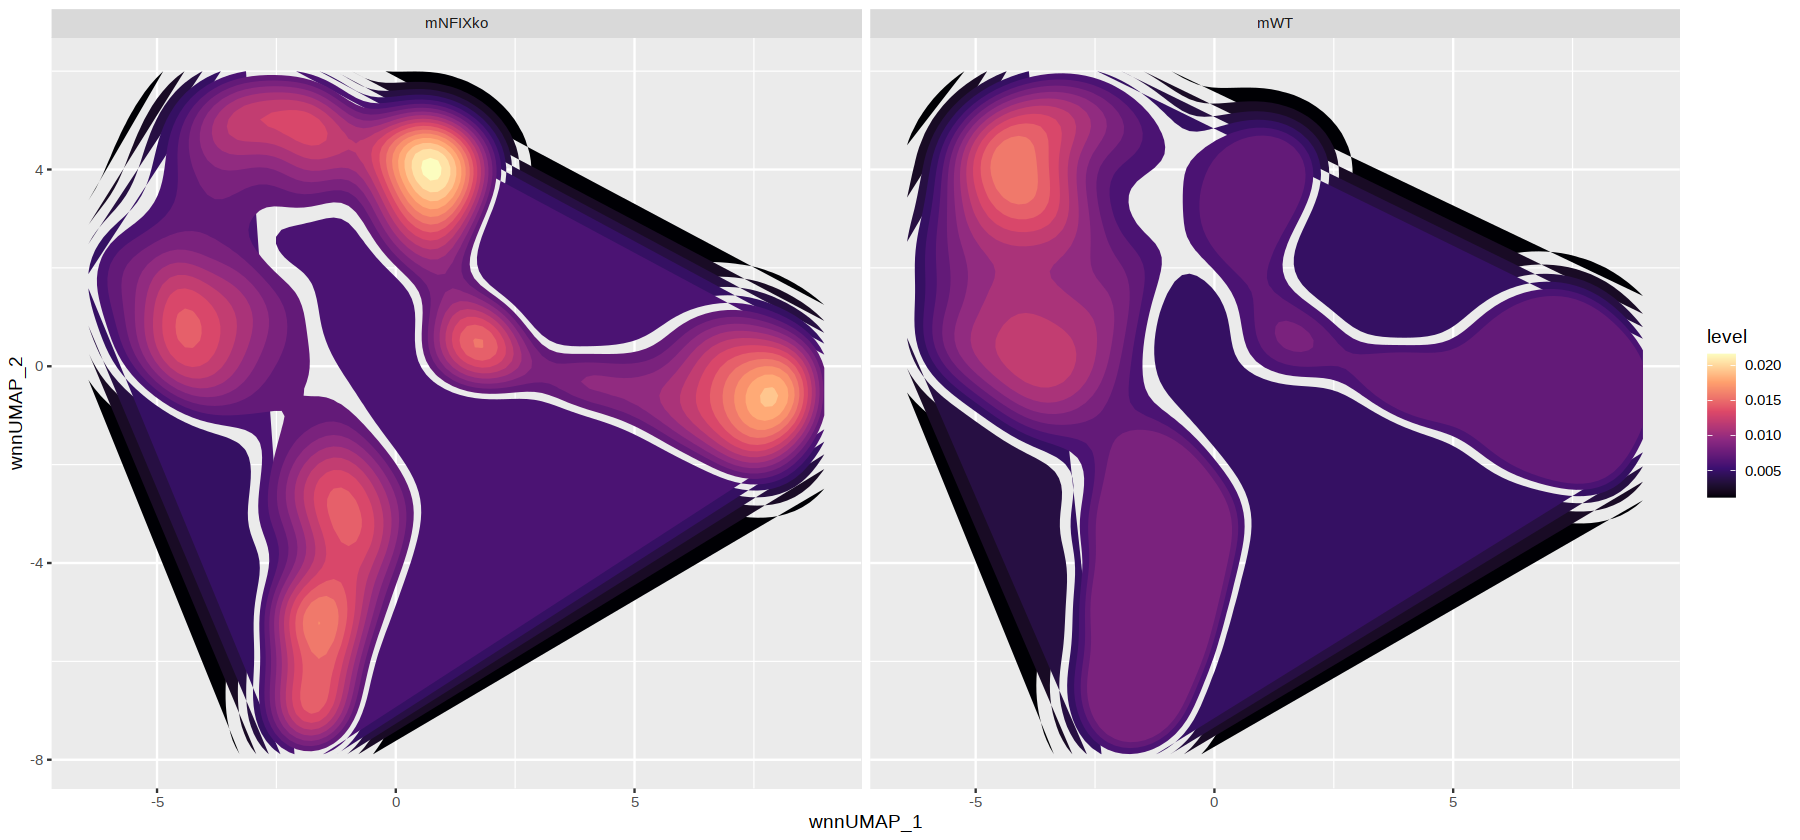

In [151]:
ggplot(cell_data, aes(wnnUMAP_1, wnnUMAP_2)) +
 stat_density_2d(aes(fill = stat(level)), geom = "polygon", n = 100, bins = 20,contour = TRUE,binwidth=10) +
facet_wrap(orig.ident~.) +
 scale_fill_viridis_c(option = "A")

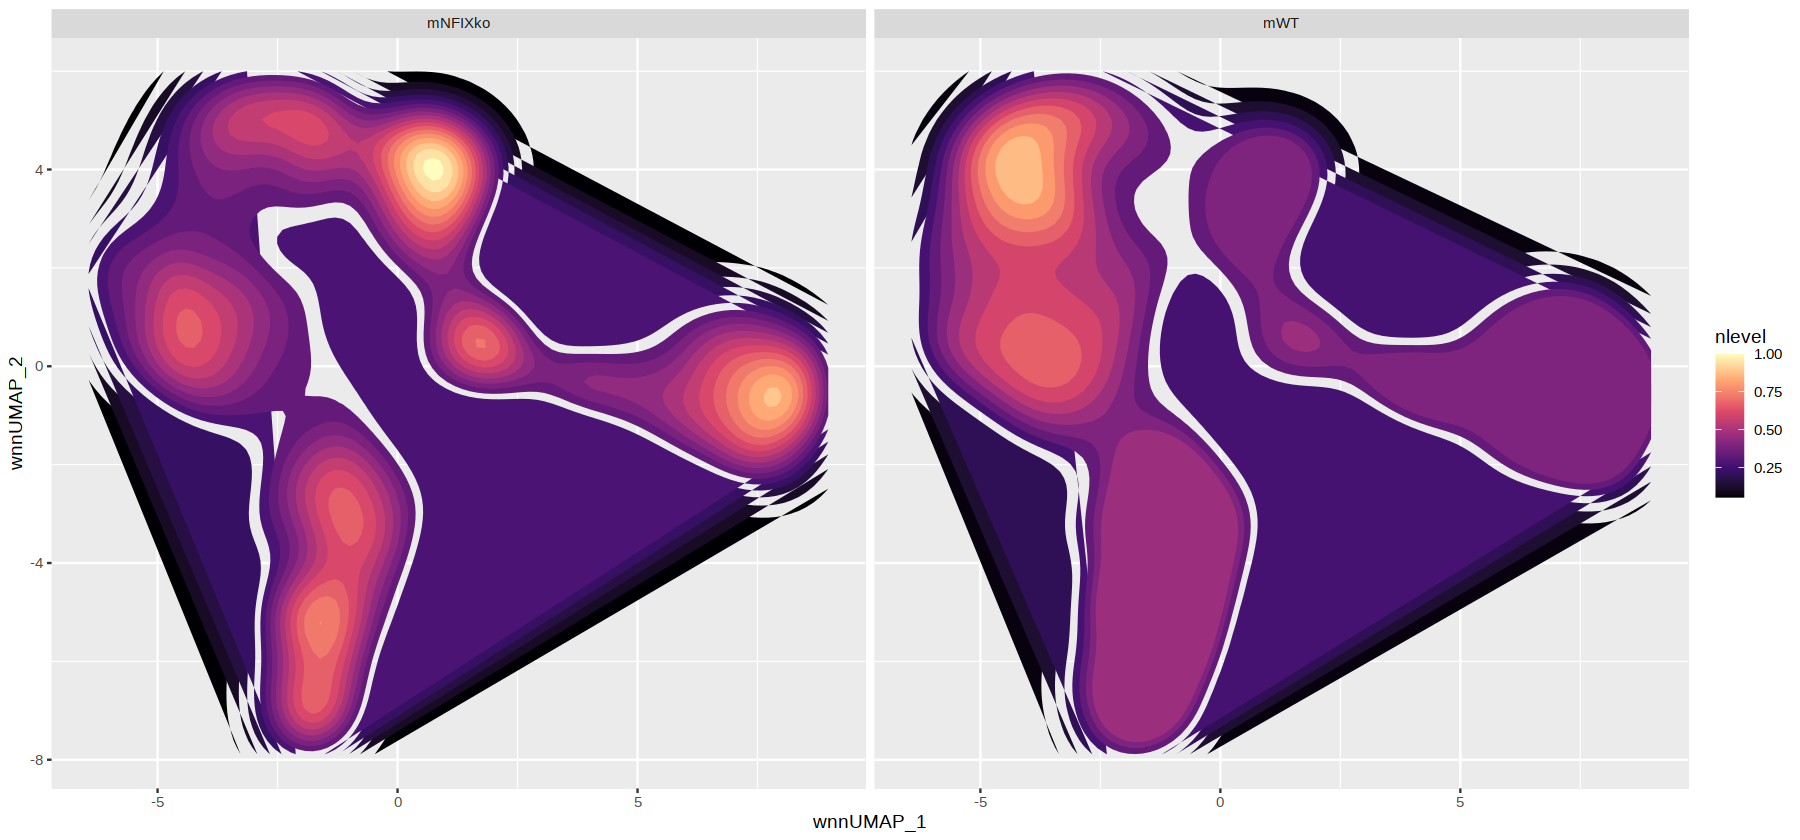

In [149]:
ggplot(cell_data, aes(wnnUMAP_1, wnnUMAP_2)) +
 stat_density_2d(aes(fill = stat(nlevel)), geom = "polygon", n = 100, bins = 20,contour = TRUE) +
facet_wrap(orig.ident~.) +
 scale_fill_viridis_c(option = "A")

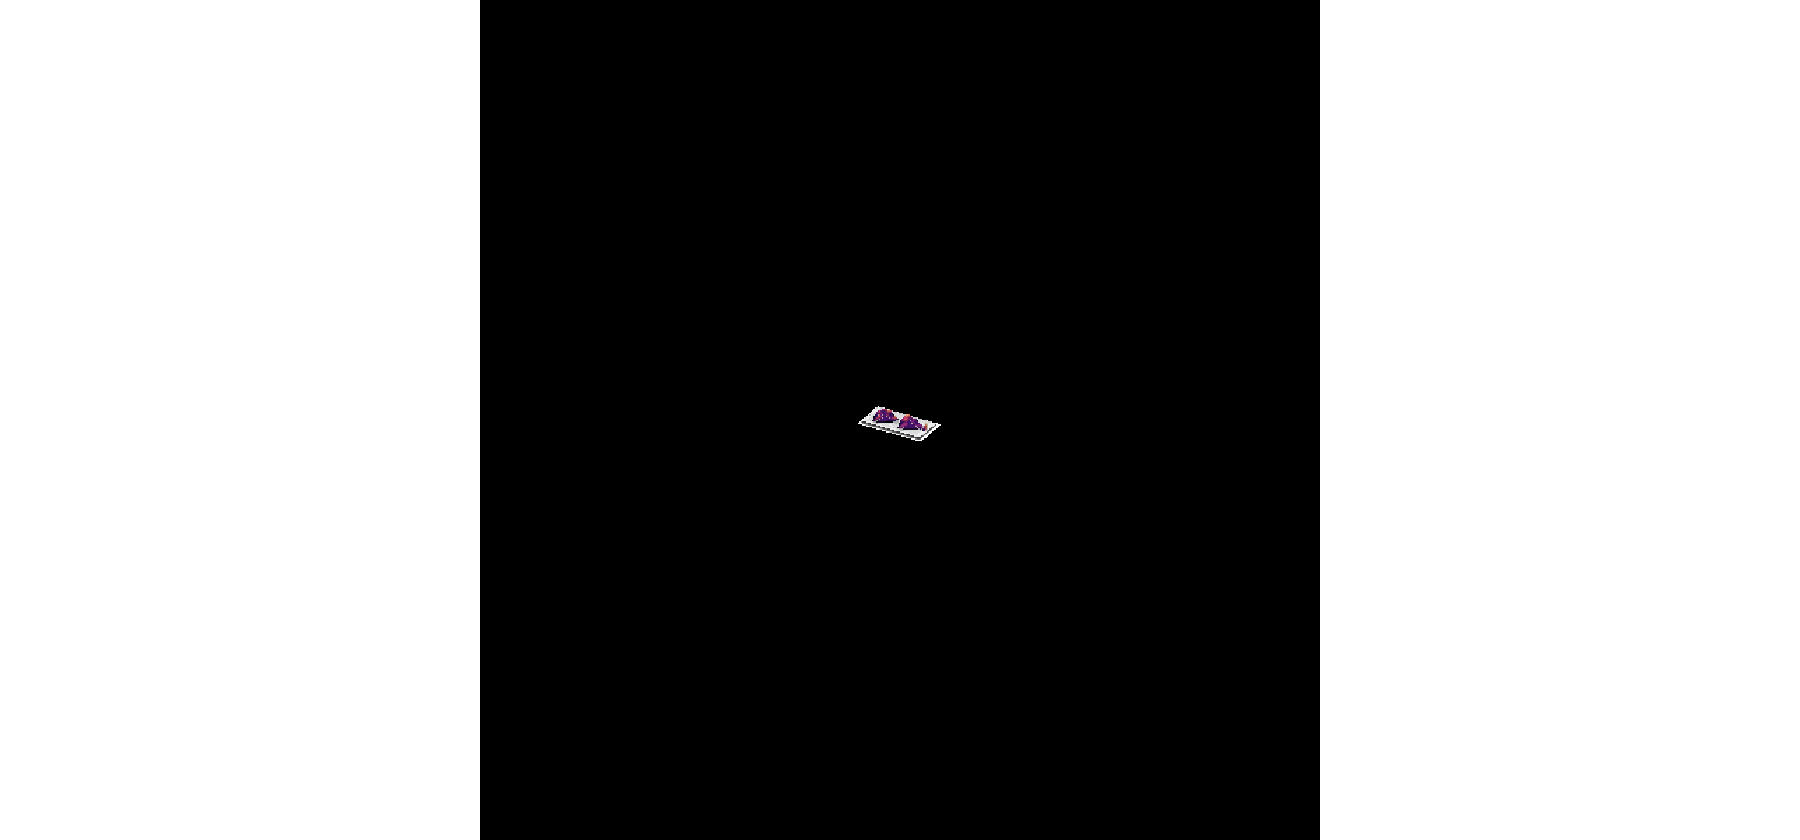

In [167]:
options(repr.plot.width = 15, repr.plot.height = 7)

ggdiamonds=ggplot(cell_data, aes(wnnUMAP_1, wnnUMAP_2)) +
 stat_density_2d(aes(fill = stat(nlevel)), geom = "polygon", n = 100, bins = 20) +
facet_wrap(orig.ident~.) +
 scale_fill_viridis_c(option = "A")
plot_gg(ggdiamonds,multicore = TRUE,width=10,height=5,scale=250,
       zoom = 10, phi = 30,theta=30)
render_snapshot(clear = TRUE)

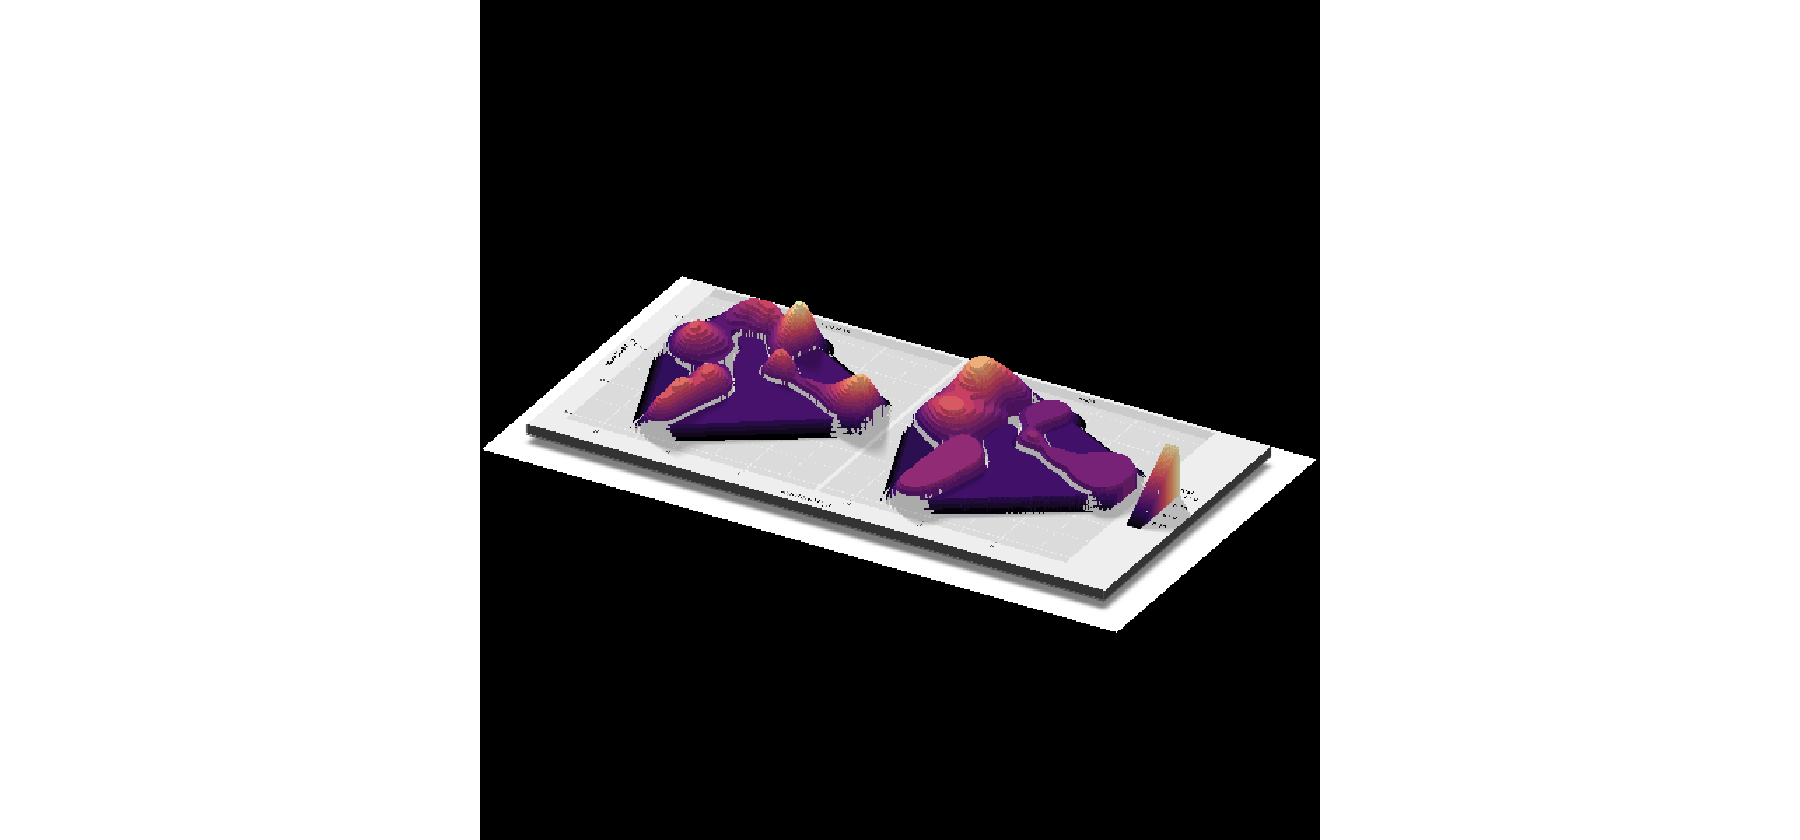

In [168]:
options(repr.plot.width = 15, repr.plot.height = 7)

ggdiamonds=ggplot(cell_data, aes(wnnUMAP_1, wnnUMAP_2)) +
 stat_density_2d(aes(fill = stat(nlevel)), geom = "polygon", n = 100, bins = 20) +
facet_wrap(orig.ident~.) +
 scale_fill_viridis_c(option = "A")
plot_gg(ggdiamonds,multicore = TRUE,width=10,height=5,scale=250,
       zoom = 1, phi = 30,theta=30)
render_snapshot(clear = TRUE)

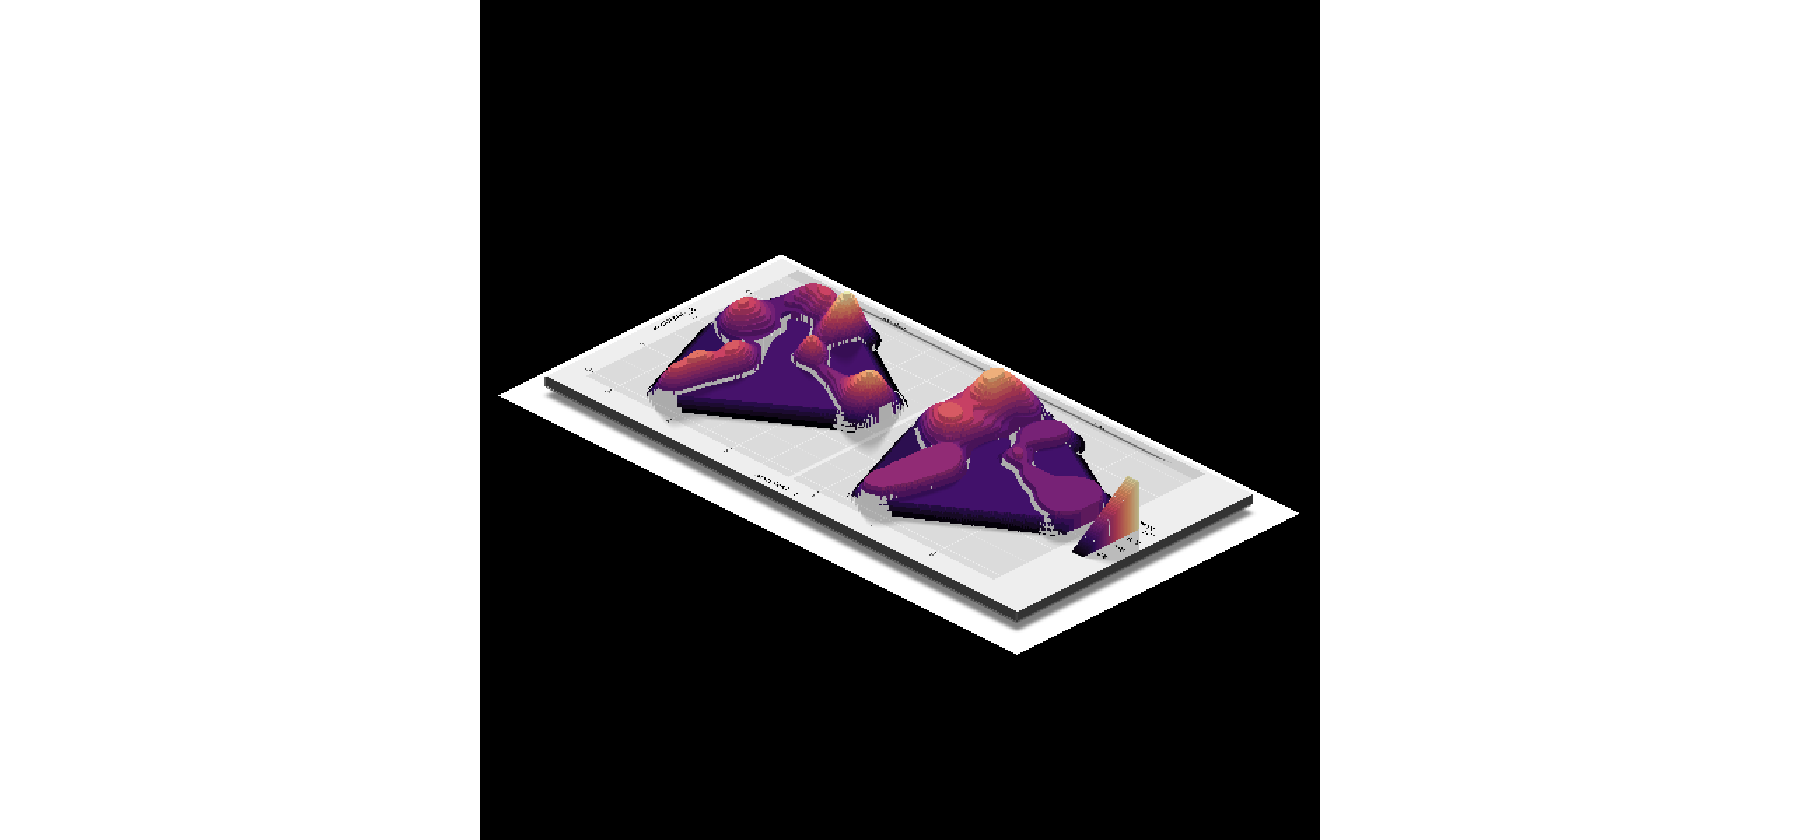

In [169]:
options(repr.plot.width = 15, repr.plot.height = 7)

ggdiamonds=ggplot(cell_data, aes(wnnUMAP_1, wnnUMAP_2)) +
 stat_density_2d(aes(fill = stat(nlevel)), geom = "polygon", n = 100, bins = 20) +
facet_wrap(orig.ident~.) +
 scale_fill_viridis_c(option = "A")
plot_gg(ggdiamonds,multicore = TRUE,width=10,height=5,scale=250,
       zoom = 1, phi = 30)
render_snapshot(clear = TRUE)

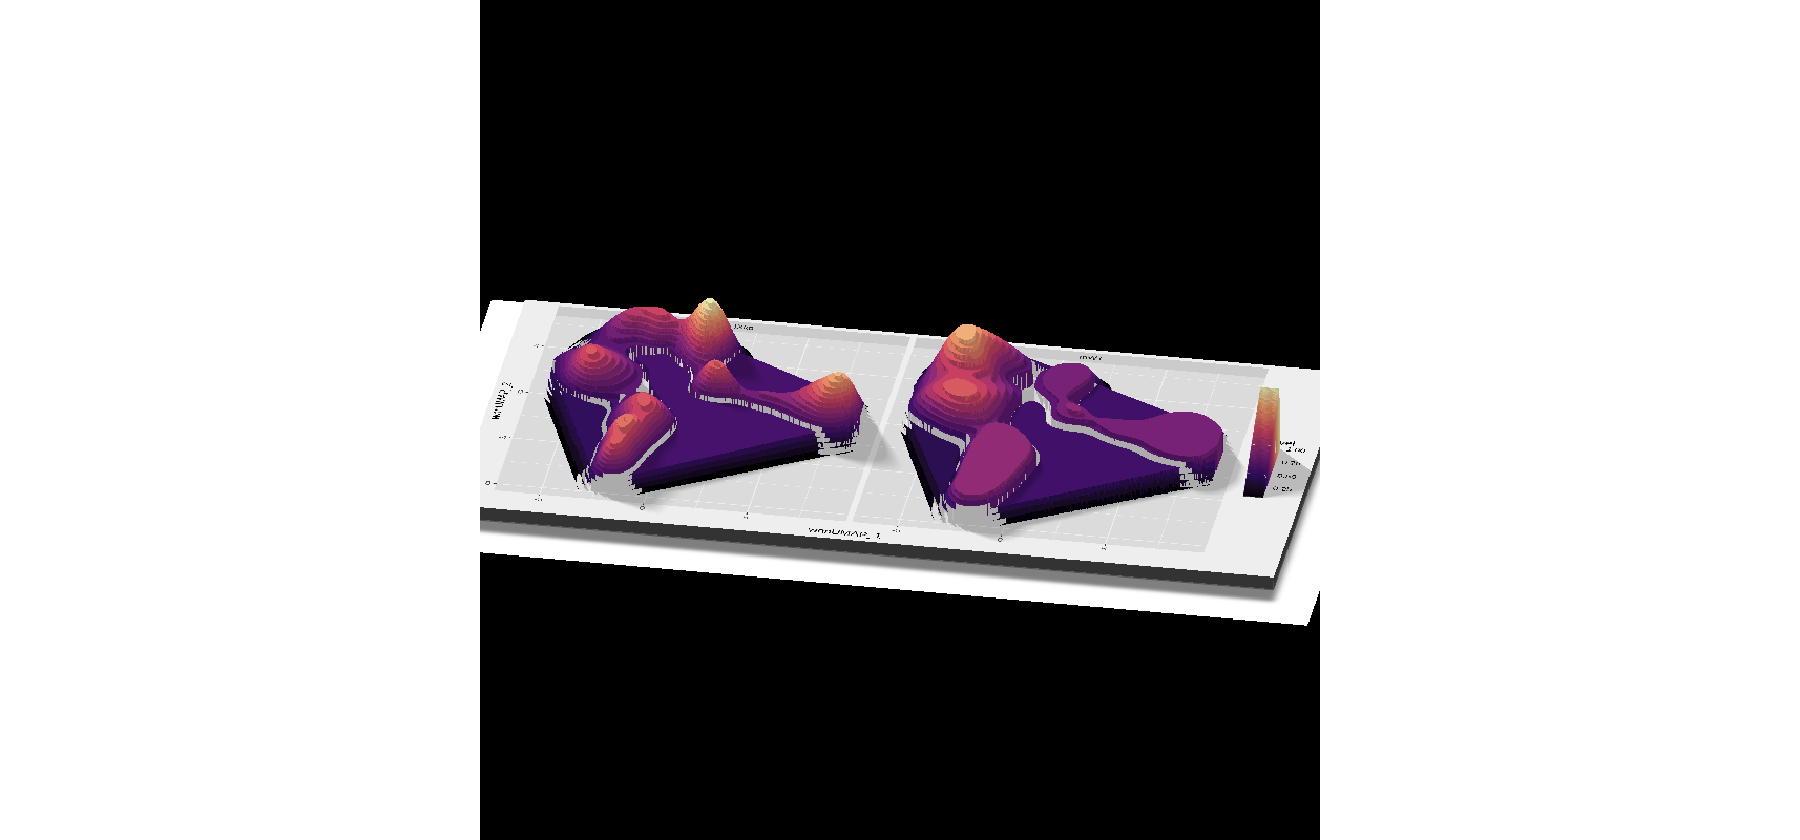

In [170]:
options(repr.plot.width = 15, repr.plot.height = 7)

ggdiamonds=ggplot(cell_data, aes(wnnUMAP_1, wnnUMAP_2)) +
 stat_density_2d(aes(fill = stat(nlevel)), geom = "polygon", n = 100, bins = 20) +
facet_wrap(orig.ident~.) +
 scale_fill_viridis_c(option = "A")
plot_gg(ggdiamonds,multicore = TRUE,width=10,height=5,scale=250,windowsize = c(800, 800),
       zoom = 0.8, phi = 30,theta = 10)
render_snapshot(clear = TRUE)

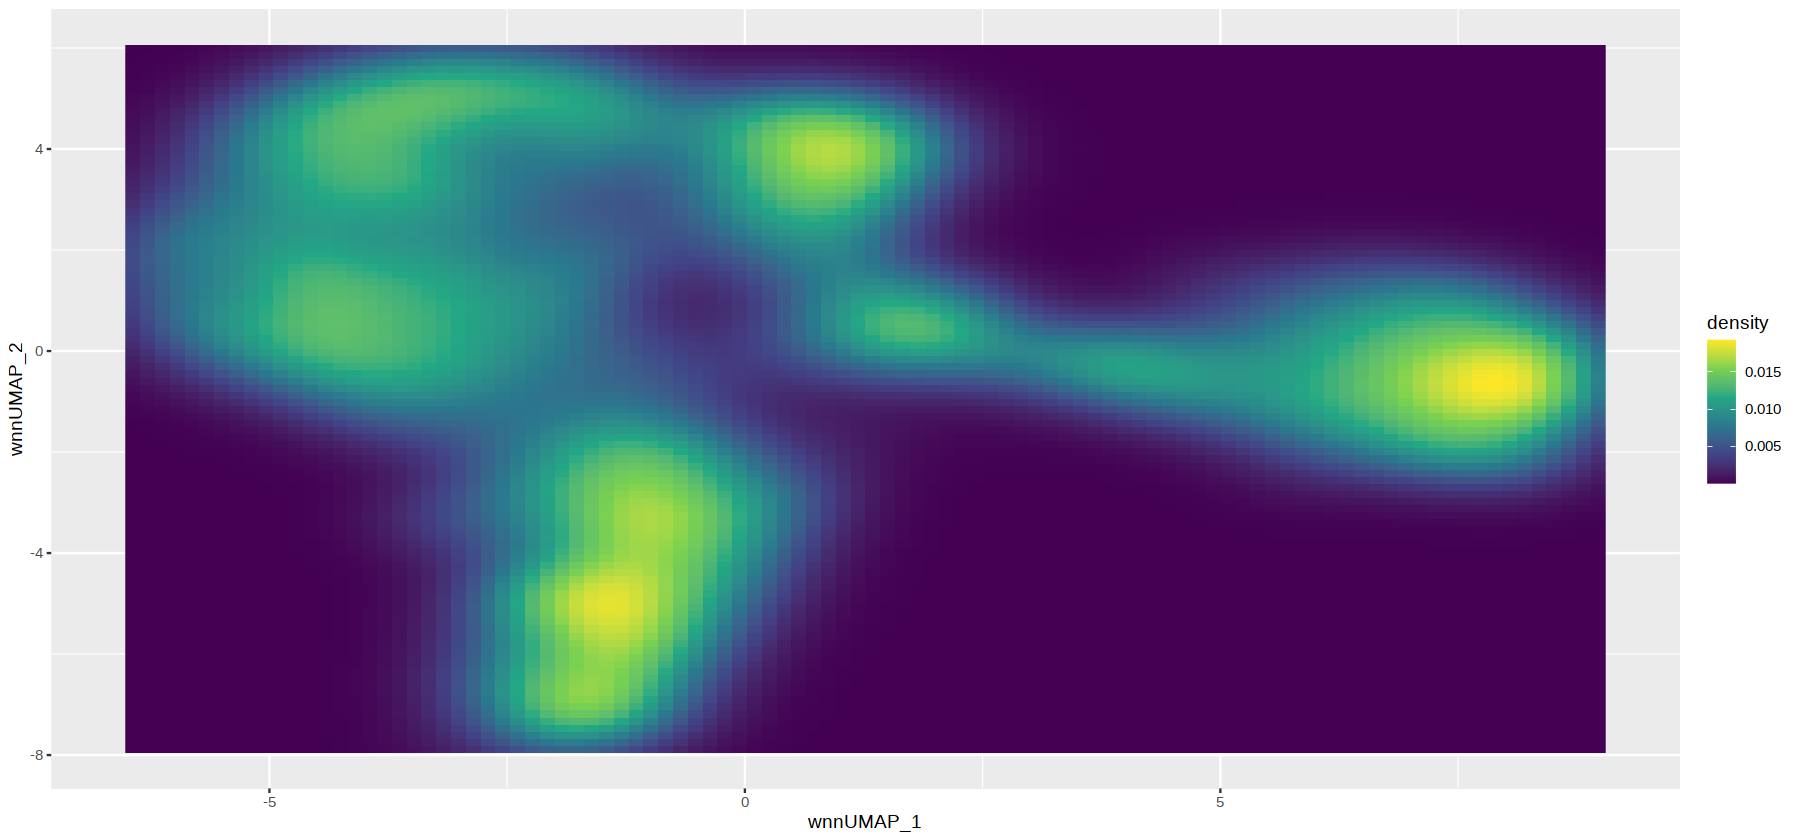

In [188]:
ggplot(cell_data, aes(wnnUMAP_1, wnnUMAP_2)) +
stat_density_2d(
  geom = "raster",
  aes(fill = after_stat(density)),
  contour = FALSE
) + scale_fill_viridis_c()

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'ndensity' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste

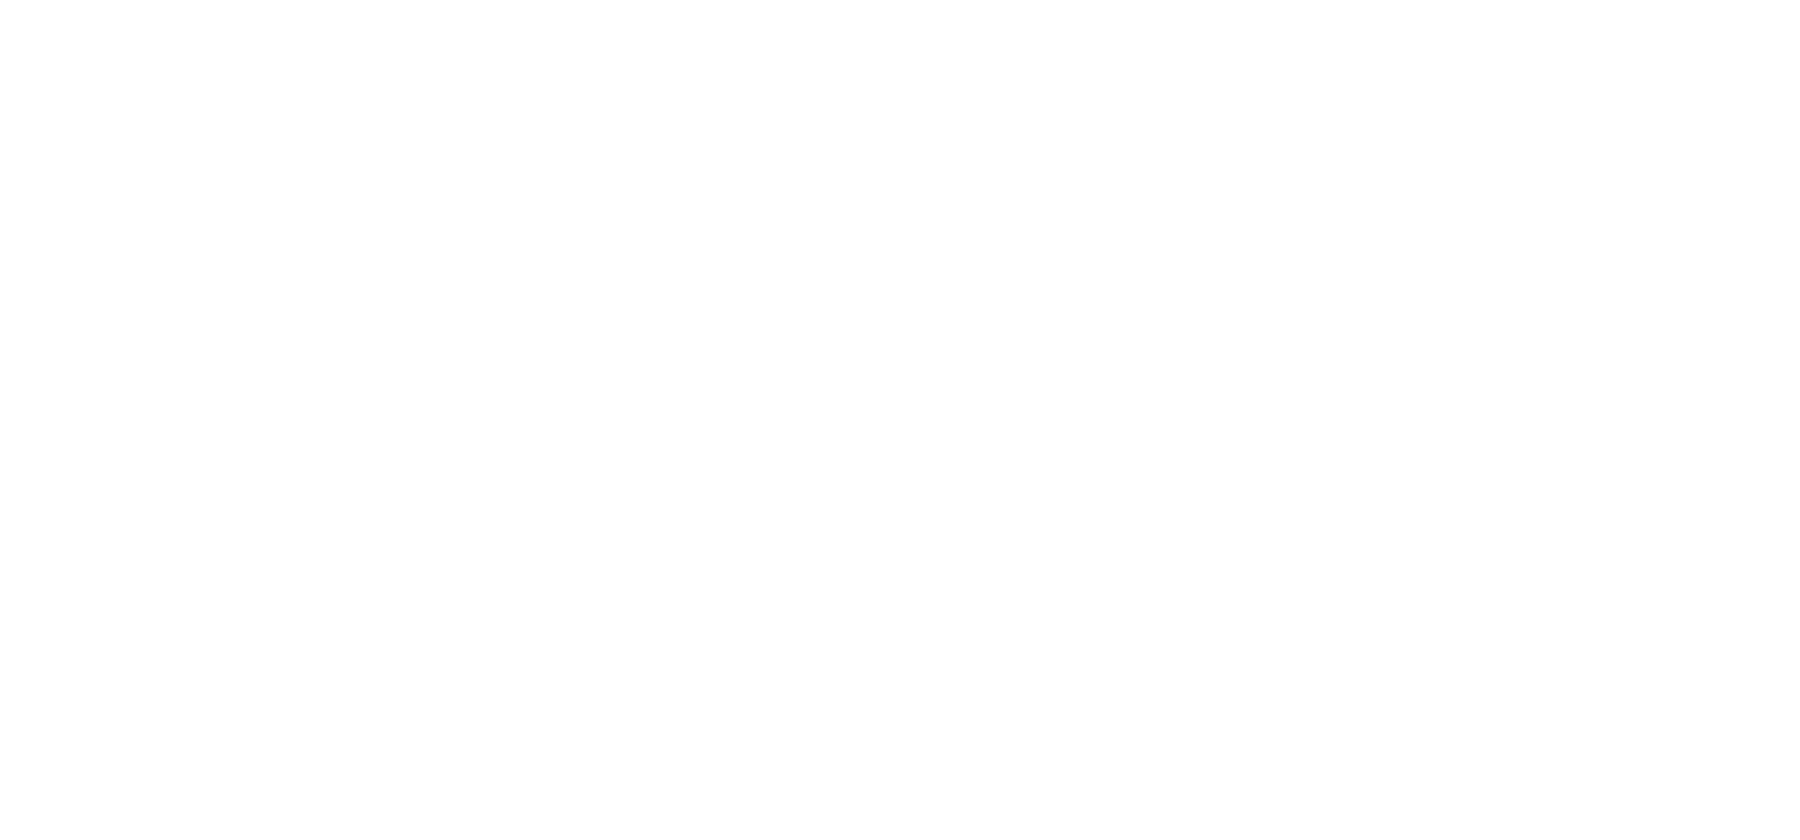

In [183]:
ggplot(cell_data, aes(wnnUMAP_1, wnnUMAP_2)) +
 stat_density_2d(geom = "raster",aes(fill = stat(ndensity)))

Warning message:
“Raster pixels are placed at uneven horizontal intervals and will be shifted. Consider using geom_tile() instead.”
Warning message:
“Raster pixels are placed at uneven vertical intervals and will be shifted. Consider using geom_tile() instead.”
ERROR while rich displaying an object: Error: vector memory exhausted (limit reached?)

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mim

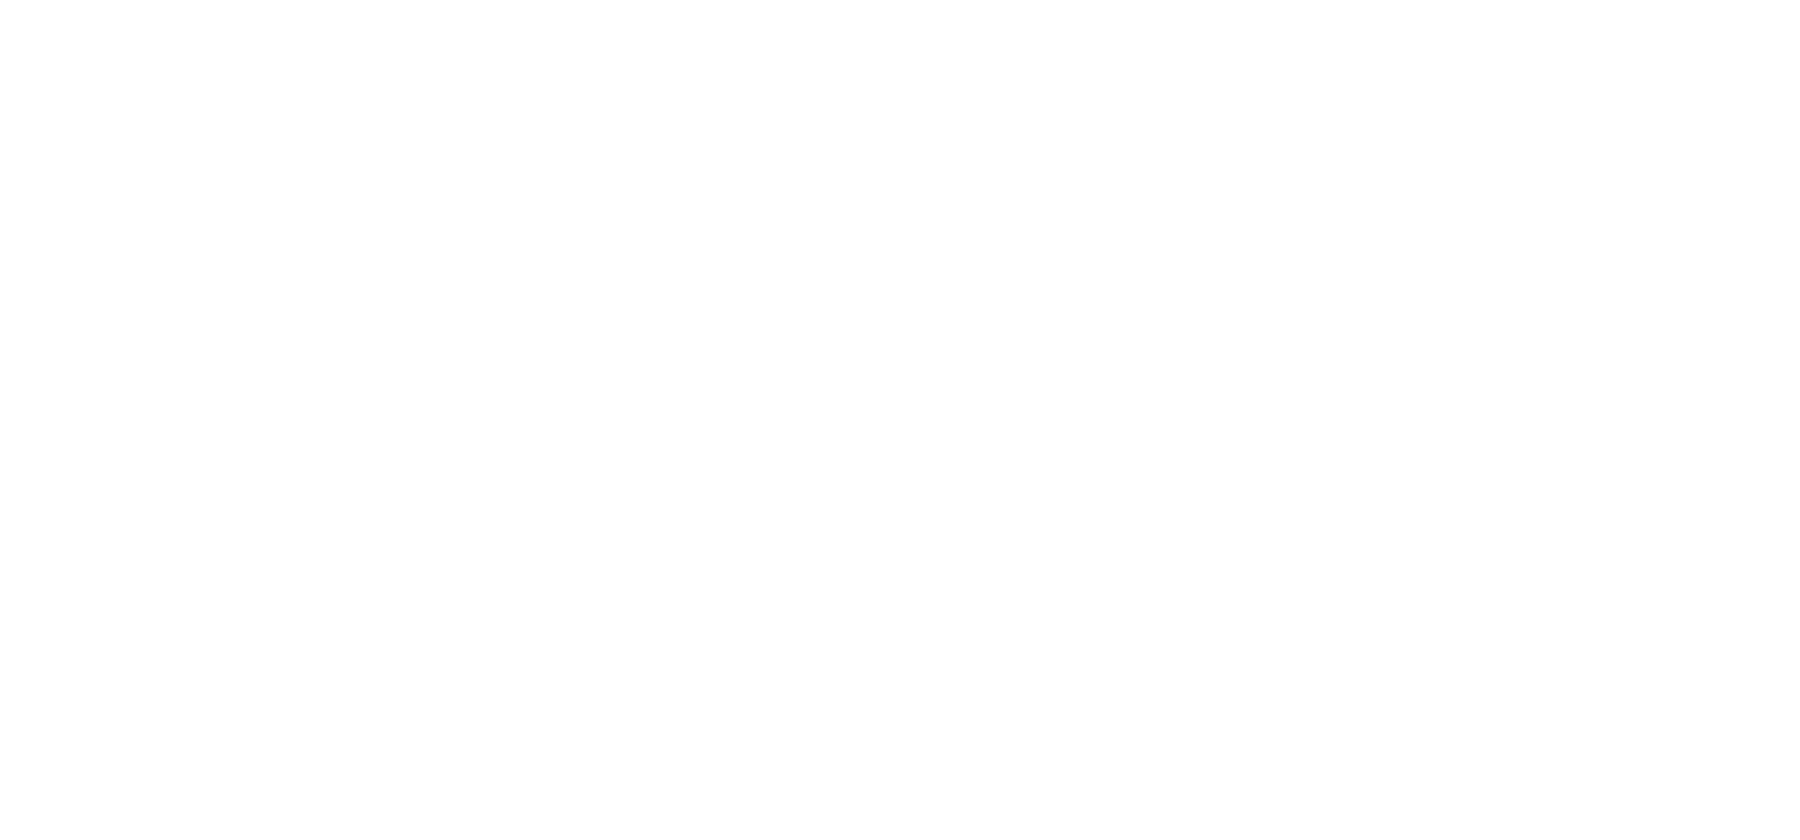

In [195]:
ggplot(cell_data, aes(wnnUMAP_1, wnnUMAP_2)) +
stat_density_2d(
  geom = "raster",
  aes(fill = stat(nlevel)),
  contour = T
) + scale_fill_viridis_c()+facet_wrap(orig.ident~.)

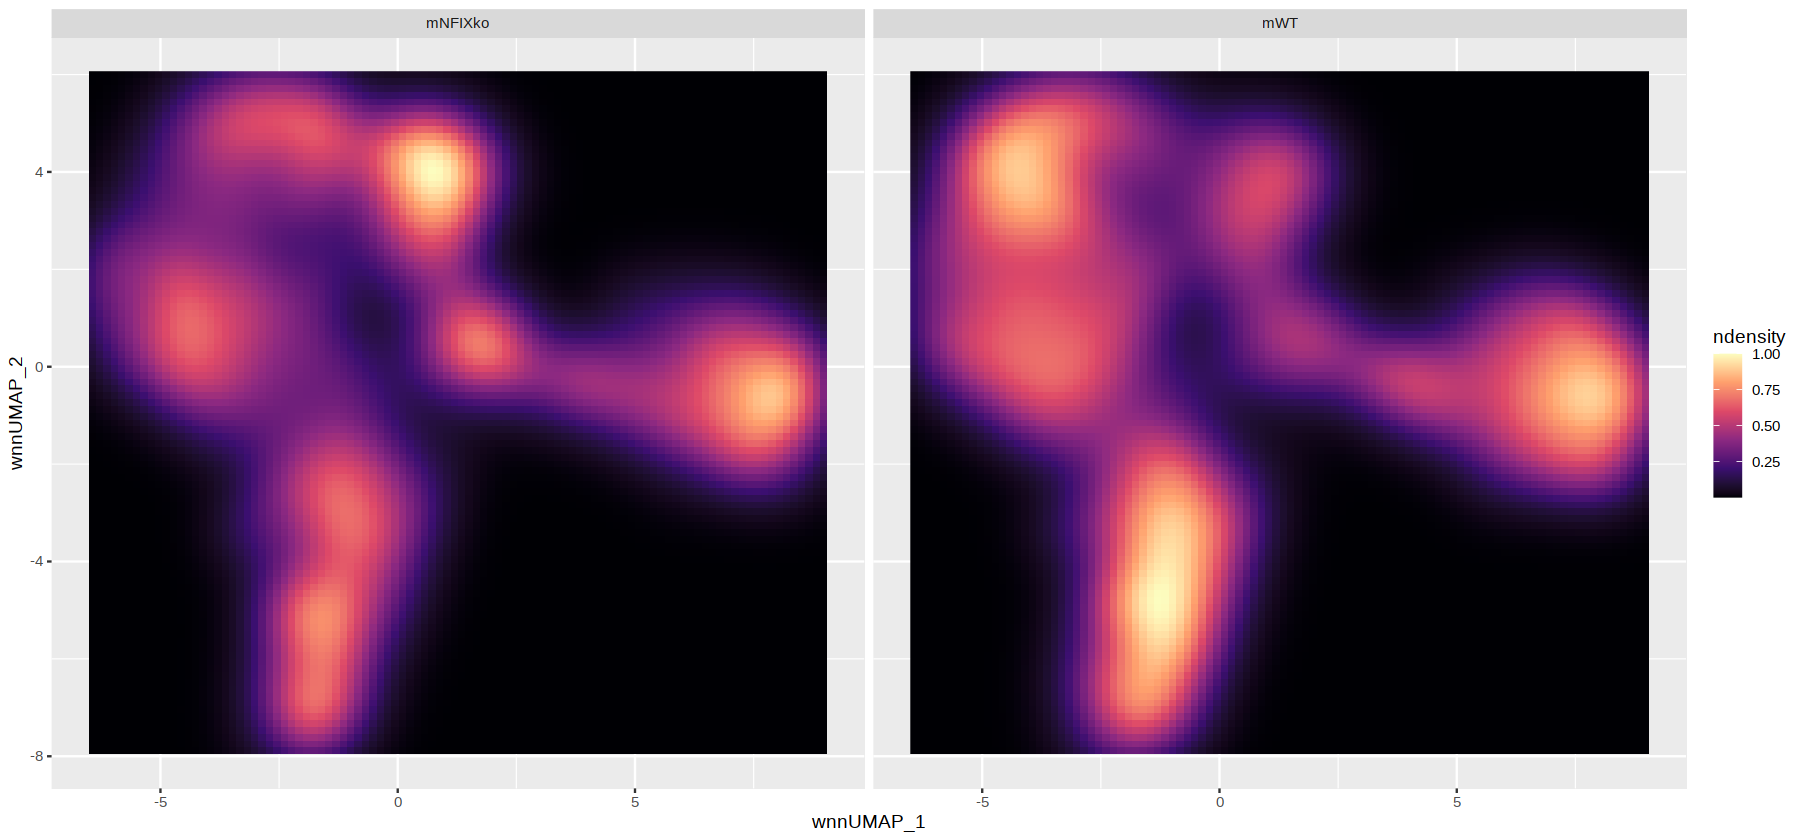

In [221]:
ggplot(cell_data, aes(wnnUMAP_1, wnnUMAP_2)) +
stat_density_2d(
  geom = "raster",
  aes(fill = after_stat(ndensity)),
  contour = F,
    n=100
) + scale_fill_viridis_c(option = "A")+facet_wrap(orig.ident~.)

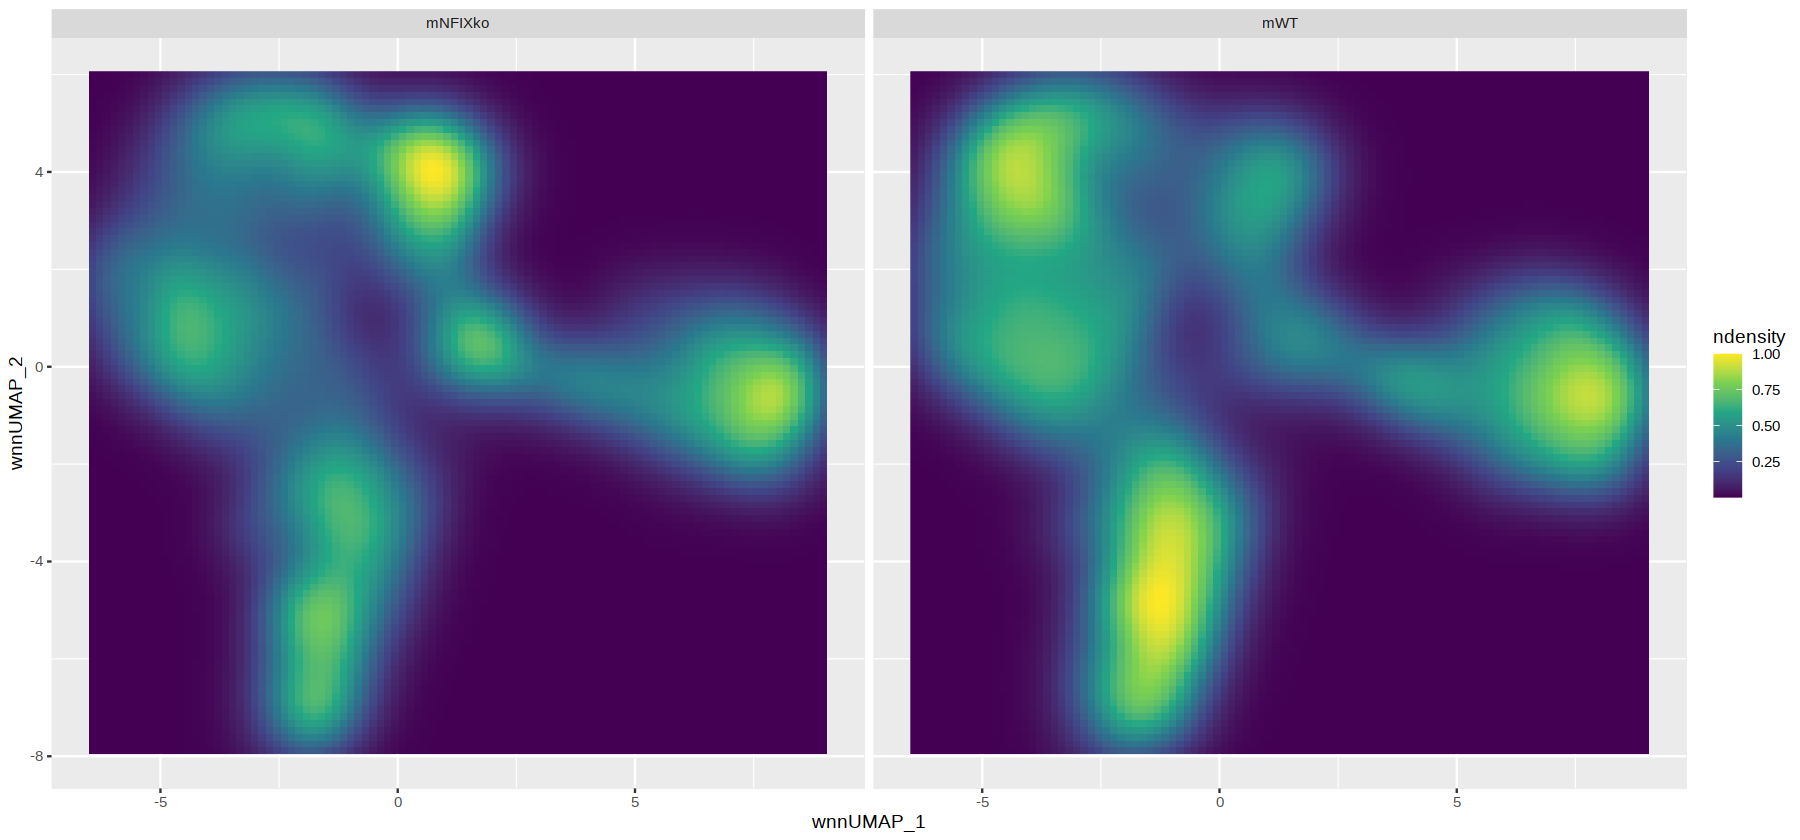

In [198]:
ggplot(cell_data, aes(wnnUMAP_1, wnnUMAP_2)) +
stat_density_2d(
  geom = "raster",
  aes(fill = after_stat(ndensity)),
  contour = F,
    n=100,
    bins=10
) + scale_fill_viridis_c()+facet_wrap(orig.ident~.)

In [472]:
cell_data$orig.ident <- factor(x = cell_data$orig.ident, levels = c("mWT", "mNFIXko"))


In [473]:
options(repr.plot.width = 15, repr.plot.height = 7)

ggdiamonds=ggplot(cell_data, aes(wnnUMAP_1, wnnUMAP_2)) +
stat_density_2d(
  geom = "raster",
  aes(fill = after_stat(ndensity)),
  contour = F,
    n=100
) + scale_fill_viridis_c(option = "A")+facet_wrap(orig.ident~.)

plot_gg(ggdiamonds,multicore = TRUE,width=10,height=5,scale=500,windowsize = c(1200, 1200),
       zoom = 0.9, phi = 45,theta = 10)
render_snapshot("3D_density_view.png",clear = TRUE,width=6000,height=4800,software_render = TRUE)

TinyObjReader: Vertex texcoord indices out of bounds (line 3801762.)



In [475]:
plot_gg(ggdiamonds,multicore = TRUE,width=10,height=5,scale=500,windowsize = c(1200, 1200),
       zoom = 0.9, phi = 45,theta = 20)
render_snapshot("3D_density_view.png",clear = TRUE,width=4000,height=3000,software_render = TRUE)

In [229]:
plot_gg(ggdiamonds,multicore = TRUE,width=10,height=5,scale=500,windowsize = c(1200, 1200),
       zoom = 0.9, phi = 45,theta = 20)
render_snapshot("FILENAME.pdf",clear = TRUE,width=1200,height=800,software_render = TRUE)

In [474]:
plot_gg(ggdiamonds,multicore = TRUE,width=10,height=5,scale=500,windowsize = c(1200, 1200),
       zoom = 0.9, phi = 45,theta = 20)
render_snapshot("FILENAME",clear = TRUE,width=3000,height=2000,software_render = TRUE)

In [337]:
plot_gg(ggdiamonds,multicore = TRUE,width=10,height=5,scale=500,windowsize = c(1200, 1200),
       zoom = 0.9, phi = 45,theta = 20)
render_depth( clear = TRUE,filename="example.png")


Focus distance: 3822.28



ERROR: Error in if (nrow(depthmap) < 1) {: argument is of length zero


In [225]:
?render_snapshot

render_snapshot           package:rayshader            R Documentation

_R_e_n_d_e_r _S_n_a_p_s_h_o_t _o_f _3_D _V_i_s_u_a_l_i_z_a_t_i_o_n

_D_e_s_c_r_i_p_t_i_o_n:

     Either captures the current rgl view and displays, or saves the
     current view to disk.

_U_s_a_g_e:

     render_snapshot(
       filename,
       clear = FALSE,
       title_text = NULL,
       title_offset = c(20, 20),
       title_color = "black",
       title_size = 30,
       title_font = "sans",
       title_bar_color = NULL,
       title_bar_alpha = 0.5,
       title_position = "northwest",
       image_overlay = NULL,
       vignette = FALSE,
       instant_capture = interactive(),
       bring_to_front = FALSE,
       keep_user_par = FALSE,
       webshot = FALSE,
       width = NULL,
       height = NULL,
       software_render = FALSE,
       camera_location = NULL,
       camera_lookat = c(0, 0, 0),
       background = NULL,
       text_angle = NULL,
       text_size = 10,
       text_offset = c(0, 0, 0),
       point_radius = 2,
       line_offset = 1e-07,
       cache_filename = NULL,
       print_scene_info = FALSE,
       ...
     )
     
_A_r_g_u_m_e_n_t_s:

filename: Filename of snapshot. If missing, will display to current
          device.

   clear: Default `FALSE`. If `TRUE`, the current `rgl` device will be
          cleared.

title_text: Default `NULL`. Text. Adds a title to the image, using
          magick::image_annotate.

title_offset: Default `c(20,20)`. Distance from the top-left (default,
          `gravity` direction in image_annotate) corner to offset the
          title.

title_color: Default `black`. Font color.

title_size: Default `30`. Font size in pixels.

title_font: Default `sans`. String with font family such as "sans",
          "mono", "serif", "Times", "Helvetica", "Trebuchet",
          "Georgia", "Palatino" or "Comic Sans".

title_bar_color: Default `NULL`. If a color, this will create a colored
          bar under the title.

title_bar_alpha: Default `0.5`. Transparency of the title bar.

title_position: Default `northwest`. Position of the title.

image_overlay: Default `NULL`. Either a string indicating the location
          of a png image to overlay over the image (transparency
          included), or a 4-layer RGBA array. This image will be
          resized to the dimension of the image if it does not match
          exactly.

vignette: Default `FALSE`. If `TRUE` or numeric, a camera vignetting
          effect will be added to the image. `1` is the darkest
          vignetting, while `0` is no vignetting. If vignette is a
          length-2 vector, the second entry will control the blurriness
          of the vignette effect.

instant_capture: Default `TRUE` if interactive, `FALSE` otherwise. If
          `FALSE`, a slight delay is added before taking the snapshot.
          This can help stop prevent rendering issues when running
          scripts.

bring_to_front: Default `FALSE`. Whether to bring the window to the
          front when taking the snapshot.

keep_user_par: Default `TRUE`. Whether to keep the user's `par()`
          settings. Set to `FALSE` if you want to set up a multi-pane
          plot (e.g. set `par(mfrow)`).

 webshot: Default `FALSE`. Set to `TRUE` to have rgl use the `webshot2`
          package to take images, which can be used when `rgl.useNULL =
          TRUE`.

   width: Default `NULL`. Optional argument to pass to
          `rgl::snapshot3d()` to specify the width when
          `software_render = TRUE`..

  height: Default `NULL`. Optional argument to pass to
          `rgl::snapshot3d()` to specify the height when
          `software_render = TRUE`.

software_render: Default `FALSE`. If `TRUE`, rayshader will use the
          rayvertex package to render the snapshot, which is not
          constrained by the screen size or requires OpenGL.  Consider
          settings a `cache_filename` so a new OBJ file doesn't 

In [228]:
?render_highquality

render_highquality          package:rayshader          R Documentation

_R_e_n_d_e_r _H_i_g_h _Q_u_a_l_i_t_y

_D_e_s_c_r_i_p_t_i_o_n:

     Renders a raytraced version of the displayed rgl scene, using the
     `rayrender` package.  User can specify the light direction,
     intensity, and color, as well as specify the material of the
     ground and add additional scene elements.

_U_s_a_g_e:

     render_highquality(
       filename = NULL,
       light = TRUE,
       lightdirection = 315,
       lightaltitude = 45,
       lightsize = NULL,
       lightintensity = 500,
       lightcolor = "white",
       obj_material = rayrender::diffuse(),
       cache_filename = NULL,
       width = NULL,
       height = NULL,
       text_angle = NULL,
       text_size = 6,
       text_offset = c(0, 0, 0),
       line_radius = 0.5,
       point_radius = 0.5,
       smooth_line = FALSE,
       scale_text_angle = NULL,
       scale_text_size = 6,
       scale_text_offset = c(0, 0, 0),
       title_text = NULL,
       title_offset = c(20, 20),
       title_color = "black",
       title_size = 30,
       title_font = "sans",
       title_bar_color = NULL,
       title_bar_alpha = 0.5,
       ground_material = rayrender::diffuse(),
       ground_size = 1e+05,
       scene_elements = NULL,
       camera_location = NULL,
       camera_lookat = NULL,
       camera_interpolate = 1,
       clear = FALSE,
       print_scene_info = FALSE,
       clamp_value = 10,
       ...
     )
     
_A_r_g_u_m_e_n_t_s:

filename: Filename of saved image. If missing, will display to current
          device.

   light: Default `TRUE`. Whether there should be a light in the scene.
          If not, the scene will be lit with a bluish sky.

lightdirection: Default `315`. Position of the light angle around the
          scene.  If this is a vector longer than one, multiple lights
          will be generated (using values from `lightaltitude`,
          `lightintensity`, and `lightcolor`)

lightaltitude: Default `45`. Angle above the horizon that the light is
          located.  If this is a vector longer than one, multiple
          lights will be generated (using values from `lightdirection`,
          `lightintensity`, and `lightcolor`)

lightsize: Default `NULL`. Radius of the light(s). Automatically
          chosen, but can be set here by the user.

lightintensity: Default `500`. Intensity of the light.

lightcolor: Default `white`. The color of the light.

obj_material: Default `rayrender::diffuse()`. The material properties
          of the object file.

cache_filename: Name of temporary filename to store OBJ file, if the
          user does not want to rewrite the file each time.

   width: Defaults to the width of the rgl window. Width of the
          rendering.

  height: Defaults to the height of the rgl window. Height of the
          rendering.

text_angle: Default `NULL`, which forces the text always to face the
          camera. If a single angle (degrees), will specify the
          absolute angle all the labels are facing. If three angles,
          this will specify all three orientations (relative to the
          x,y, and z axes) of the text labels.

text_size: Default `6`. Height of the text.

text_offset: Default `c(0,0,0)`. Offset to be applied to all text
          labels.

line_radius: Default `0.5`. Radius of line/path segments.

point_radius: Default `0.5`. Radius of 3D points (rendered with
          `render_points()`.

smooth_line: Default `FALSE`. If `TRUE`, the line will be rendered with
          a continuous smooth line, rather than straight segments.

scale_text_angle: Default `NULL`. Same as `text_angle`, but for the
          scale bar.

scale_text_size: Default `6`. Height of the scale bar text.

scale_text_offset: Default `c(0,0,0)`. Offset to be applied to all
          scale bar text labels.

title_text: Default `NULL`. Text. Adds a title to the image, using
          magick::image_anno

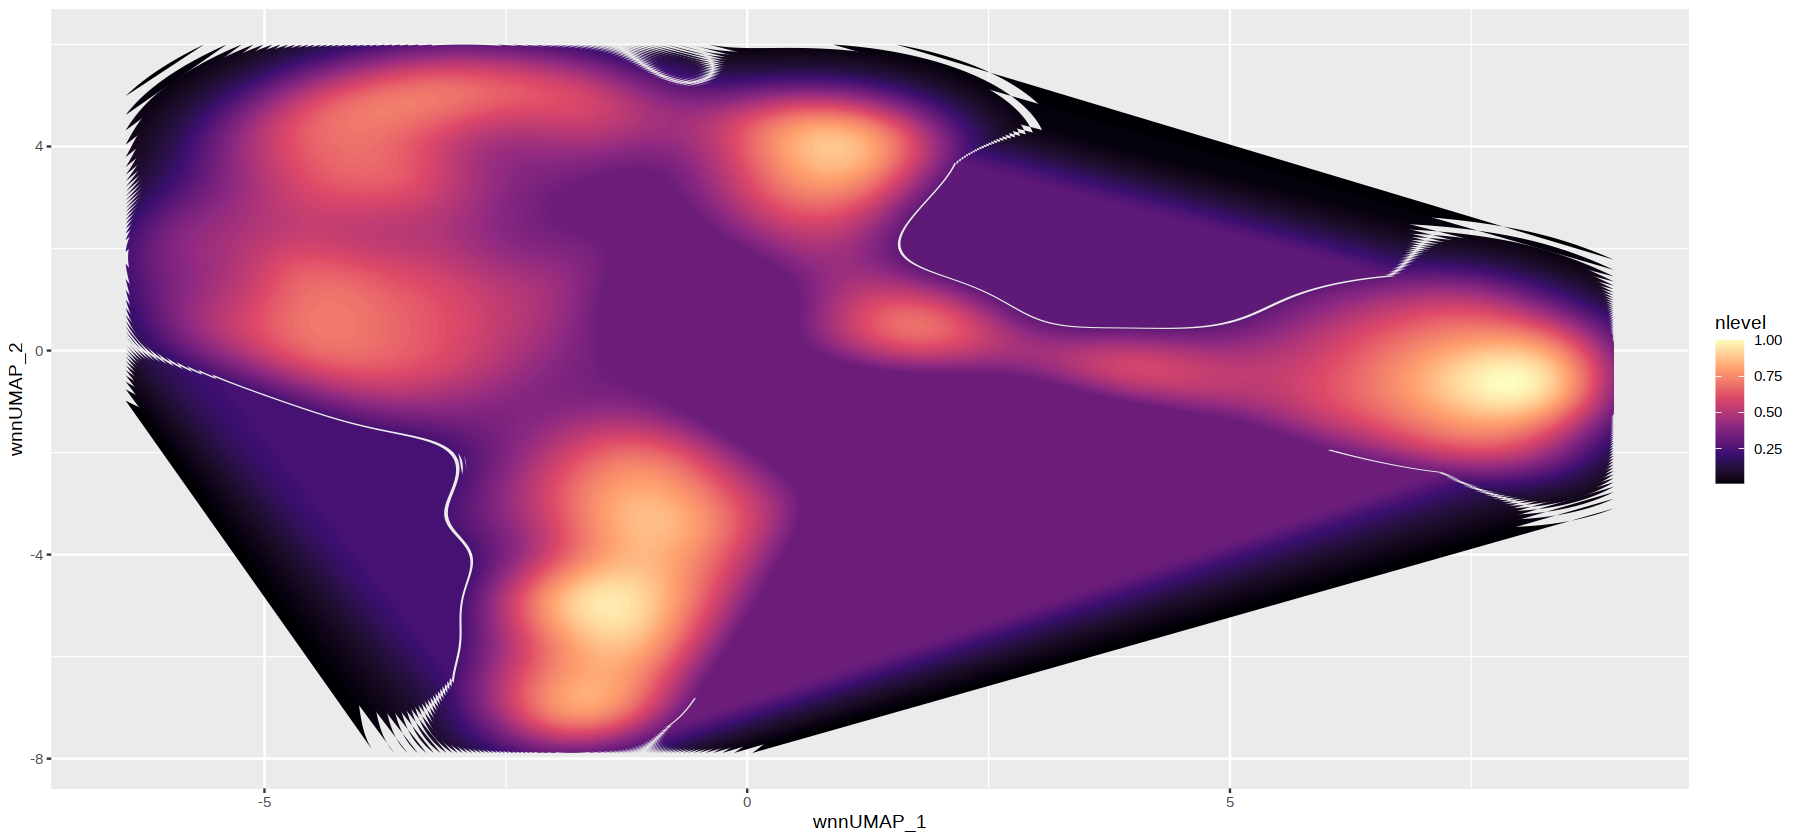

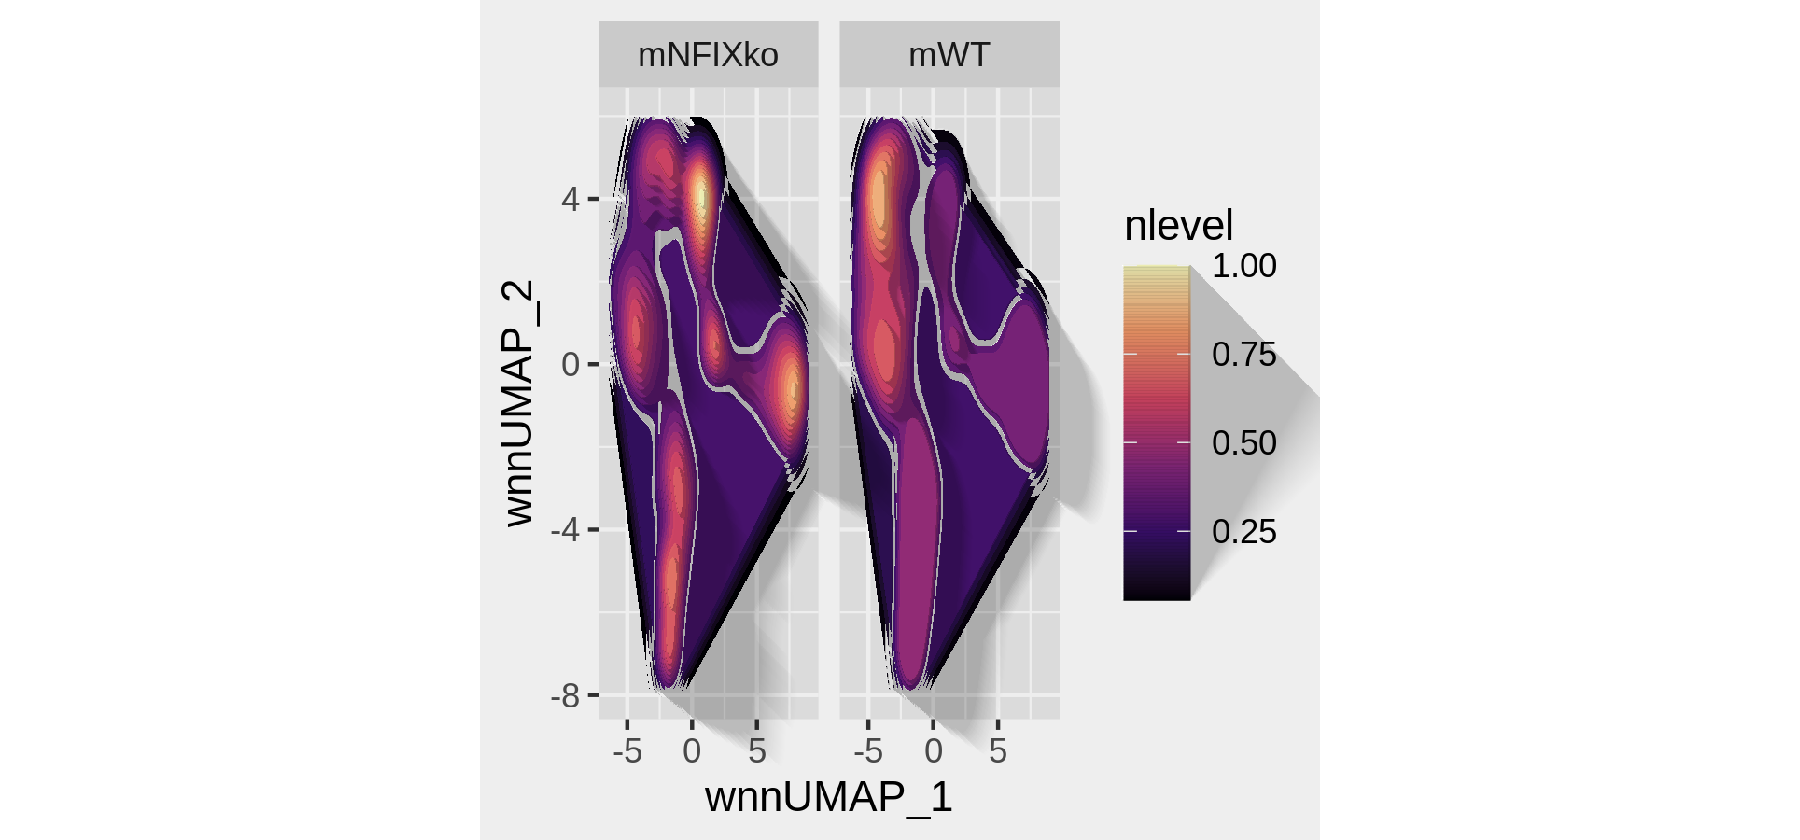

In [171]:
ggplot(cell_data, aes(wnnUMAP_1, wnnUMAP_2)) +
 stat_density_2d(aes(fill = stat(nlevel)), geom = "polygon", n = 500, bins = 100,contour = TRUE) +
 scale_fill_viridis_c(option = "A")
plot_gg(ggdiamonds,multicore = TRUE,preview = TRUE)
# plot_gg(ggdiamonds,multicore = TRUE,width=5,height=5,scale=250,windowsize=c(1400,866),
#        zoom = 0.55, phi = 30,preview = TRUE)

TinyObjReader: Vertex texcoord indices out of bounds (line 6654526.)



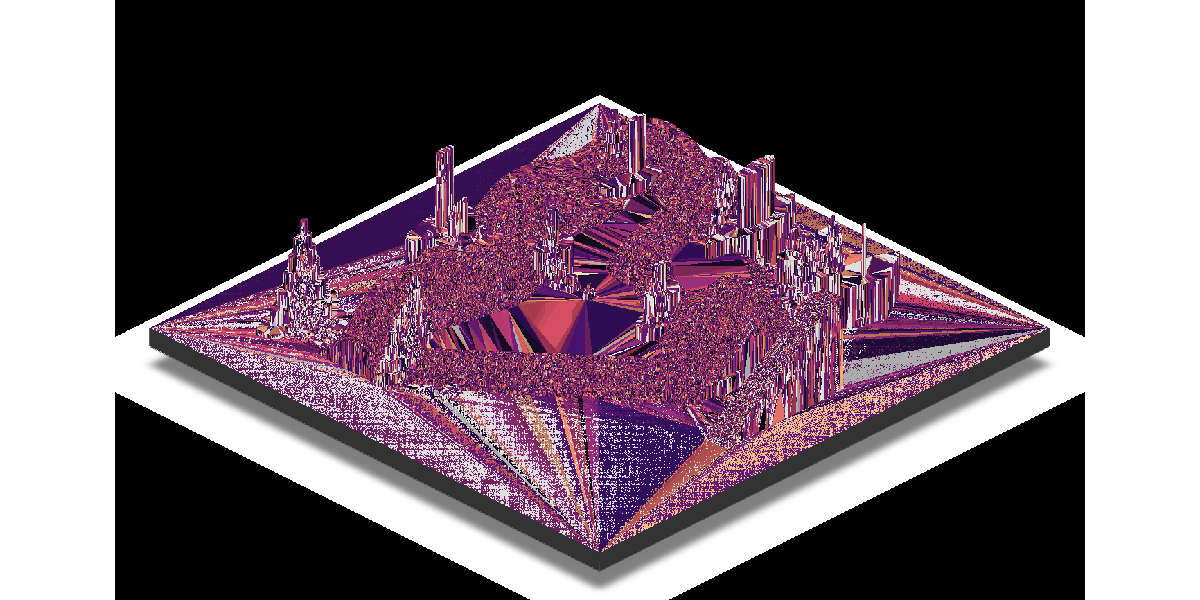

In [87]:
ggdiamonds = ggplot(cell_data, aes(wnnUMAP_1, wnnUMAP_2)) +
 stat_density_2d(aes(fill = stat(nlevel)), geom = "polygon", n = 200, bins = 50,contour = TRUE) +
 scale_fill_viridis_c(option = "A")
plot_gg(ggdiamonds,multicore = TRUE,width=5,height=5,scale=250,windowsize=c(1400,866),
       zoom = 0.55, phi = 30,preview = TRUE)
render_snapshot()

In [88]:
options("cores"=8)


TinyObjReader: Vertex texcoord indices out of bounds (line 6654526.)



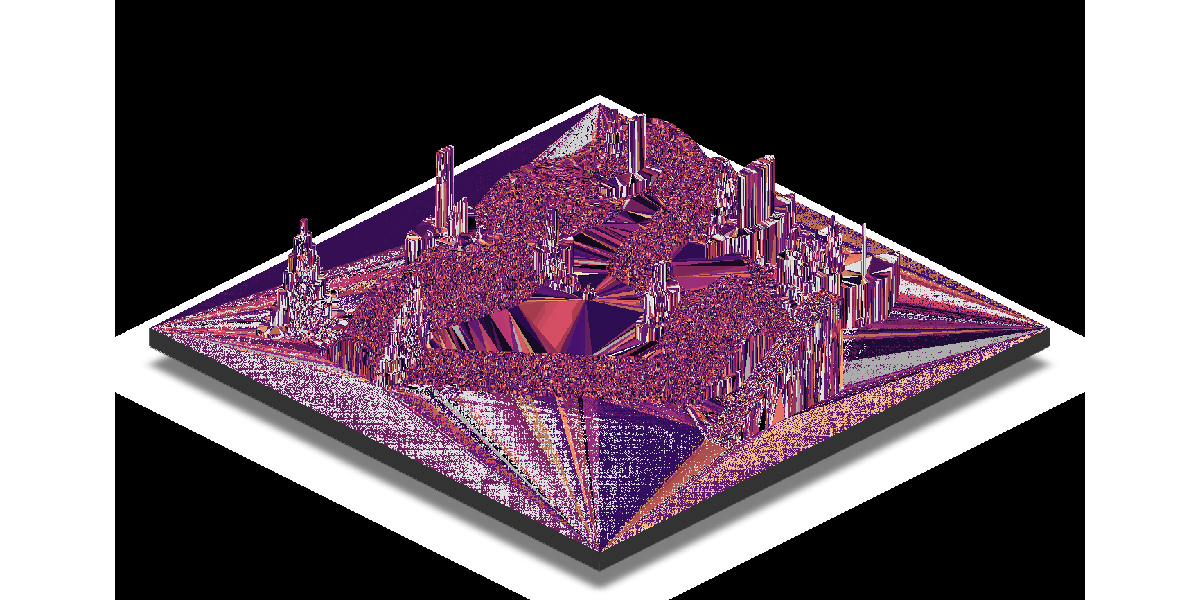

In [89]:
render_snapshot(clear=T)

pairwise ks test

# 2d density

In [469]:
merged_obj$orig.ident <- factor(x = merged_obj$orig.ident, levels = c("mWT", "mNFIXko"))


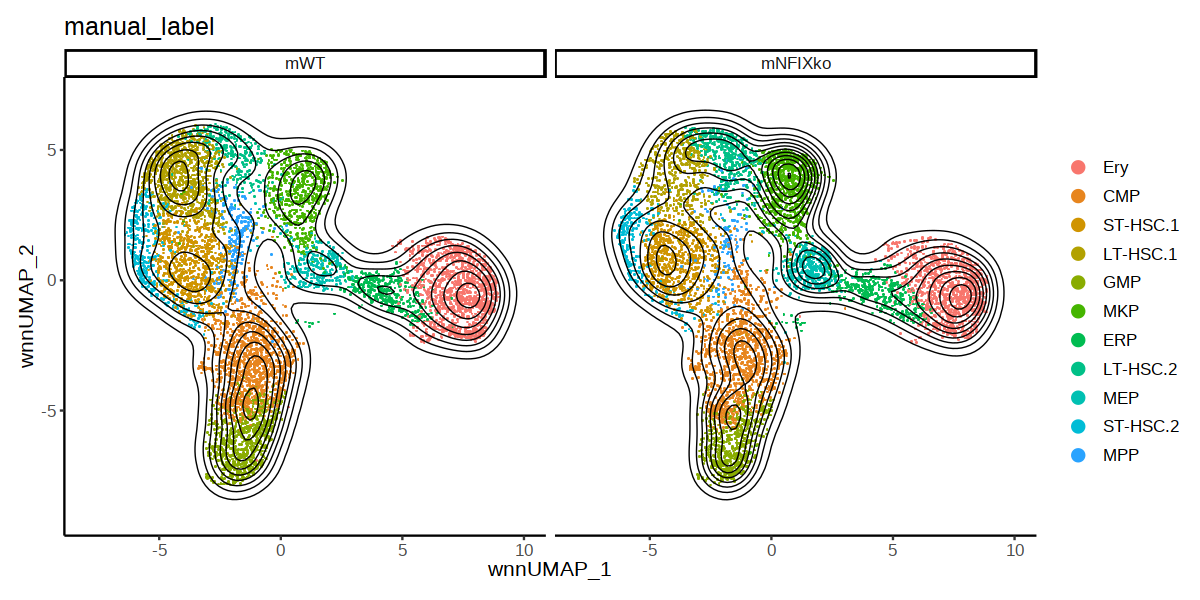

In [470]:
cluster_colors=c('Ery'='#F8766D','CMP'='#E7851E','ST-HSC.1'='#D09400',
                 'LT-HSC.1'='#B2A100','GMP'='#89AC00','MKP'='#45B500',
                 'ERP'='#00BC51','LT-HSC.2'='#00C087','MEP'='#00C0B2','ST-HSC.2'='#00BCD6','MPP'='#29A3FF','CMP'='#9C8DFF')
# DimPlot(tmp,reduction="wnn.umap",group.by="manual_label",label=T,pt.size=1,label.size = 6,
#        cols =cluster_colors,label.box=T,repel=F)
# ggsave("NFIX.scRNA.labels.umap.pdf",heigh=8,width=8)
options(repr.plot.width = 10, repr.plot.height = 5)

DimPlot(merged_obj,split.by="orig.ident",reduction="wnn.umap",group.by="manual_label",cols =cluster_colors,raster =T)+
NoLegend()+
geom_density_2d(aes(x=wnnUMAP_1, y=wnnUMAP_2),color="black",size=0.3)+theme_classic()+
theme(text = element_text(size=12)) +
xlim(-8,10) +
ylim(-9,7) 
ggsave("NFIX.countourPlot.umap.pdf",heigh=4,width=7)

In [265]:
options(repr.plot.width = 10, repr.plot.height = 5)

DimPlot(merged_obj,split.by="orig.ident",reduction="wnn.umap",group.by="manual_label")+
NoLegend()+
stat_density_2d(aes(x=wnnUMAP_1, y=wnnUMAP_2,fill = after_stat(level)),geom = "geom_contour",show.legend =T)+theme_classic()
theme(text = element_text(size=20)) 


ERROR: Error: Can't find `geom` called 'geom_contour'


# pairwise kde comparison to get p-value

In [270]:
library(MASS)
x1 <- crabs[crabs$sp=="B", 4]
x2 <- crabs[crabs$sp=="O", 4]

In [272]:
library(ks)

In [293]:
kde.test(x1=cell_data[,c("wnnUMAP_1","wnnUMAP_2")],x2=cell_data[,c("wnnUMAP_1","wnnUMAP_2")])

$Tstat
[1] 0

$zstat
[1] -6.745703

$pvalue
[1] 1

$mean
[1] 0.0003772136

$var
[1] 3.126945e-09

$var.fhat1
[1] 7.269625e-06

$var.fhat2
[1] 7.269625e-06

$n1
[1] 13949

$n2
[1] 13949

$H1
             [,1]         [,2]
[1,]  0.052198981 -0.001825503
[2,] -0.001825503  0.070173429

$H2
             [,1]         [,2]
[1,]  0.052198981 -0.001825503
[2,] -0.001825503  0.070173429

$psi1
[1] 0.01278126

$psi12
[1] 0.01278126

$psi21
[1] 0.01278126

$psi2
[1] 0.01278126

In [360]:
for (c in levels(cell_data$manual_label)){
    tmp = subset(cell_data,manual_label==c)
    wt = subset(tmp,orig.ident=="mWT")
    ko = subset(tmp,orig.ident=="mNFIXko")
    # print (dim(tmp))
    p=kde.test(x1=wt[,c("wnnUMAP_1","wnnUMAP_2")],x2=ko[,c("wnnUMAP_1","wnnUMAP_2")],binned=F)$pvalue
    print (paste(c,p))
}

[1] "Ery 0.00337921368157135"
[1] "CMP 0.00263915380479463"
[1] "ST-HSC.1 0.0185876352806462"
[1] "LT-HSC.1 3.8232459957821e-05"
[1] "GMP 0.000140190283992703"
[1] "MKP 0.00344698658495379"
[1] "ERP 0.291980908424603"
[1] "LT-HSC.2 0.249267055026718"
[1] "MEP 0.0922496318410031"
[1] "ST-HSC.2 0.297577188118905"
[1] "MPP 0.384919010741306"


In [359]:
for (c in levels(cell_data$manual_label)){
    tmp = subset(cell_data,manual_label==c)
    wt = subset(tmp,orig.ident=="mWT")
    ko = subset(tmp,orig.ident=="mNFIXko")
    # print (dim(tmp))
    p=kde.test(x1=wt[,c("wnnUMAP_1","wnnUMAP_2")],x2=ko[,c("wnnUMAP_1","wnnUMAP_2")],binned=TRUE)$pvalue
    print (paste(c,p))
}

[1] "Ery 0.00337921368157135"
[1] "CMP 0.00263915380479463"
[1] "ST-HSC.1 0.0185876352806462"
[1] "LT-HSC.1 3.8232459957821e-05"
[1] "GMP 0.000140190283992703"
[1] "MKP 0.00344698658495379"
[1] "ERP 0.291980908424603"
[1] "LT-HSC.2 0.249267055026718"
[1] "MEP 0.0922496318410031"
[1] "ST-HSC.2 0.297577188118905"
[1] "MPP 0.384919010741306"


In [485]:
for (c in levels(cell_data$manual_label)){
    tmp = subset(cell_data,manual_label==c)
    wt = subset(tmp,orig.ident=="mWT")
    ko = subset(tmp,orig.ident=="mNFIXko")
    # print (dim(tmp))
    wt = wt[,c("wnnUMAP_1","wnnUMAP_2")]
    ko = ko[,c("wnnUMAP_1","wnnUMAP_2")]
    wt = wt[sample(nrow(wt), 500,replace=T), ]
    ko = ko[sample(nrow(ko), 500,replace=T), ]
    p=kde.test(x1=wt,x2=ko,binned=TRUE)$pvalue
    print (paste(c,p))
}

[1] "Ery 0.0479685246921182"
[1] "CMP 0.0027168043794854"
[1] "ST-HSC.1 0.00316520468235515"
[1] "LT-HSC.1 4.33337015270929e-07"
[1] "GMP 0.000316706418820423"
[1] "MKP 0.00250212083523904"
[1] "ERP 0.00394344271403713"
[1] "LT-HSC.2 0.00616956039185512"
[1] "MEP 3.41994184893825e-45"
[1] "ST-HSC.2 0.00847152289274977"
[1] "MPP 3.54285073989047e-05"


In [524]:
myList = list()
flush.console() 
for (c in levels(cell_data$manual_label)){
    # c="GMP"
    print (c)
    
    flush.console() 
    myList[[c]] = c()
    tmp = subset(cell_data,manual_label==c)
    wt = subset(tmp,orig.ident=="mWT")
    ko = subset(tmp,orig.ident=="mNFIXko")
    # print (dim(tmp))
    wt = wt[,c("wnnUMAP_1","wnnUMAP_2")]
    ko = ko[,c("wnnUMAP_1","wnnUMAP_2")]
    
    for (i in 1:1000){

    wt1 = wt[sample(nrow(wt), 500,replace=T), ]
    ko1 = ko[sample(nrow(ko), 500,replace=T), ]
    p=kde.test(x1=wt1,x2=ko1,binned=TRUE)$pvalue
    # print (paste(c,p))
    myList[[c]] = c(myList[[c]],p)    
}
}

[1] "Ery"
[1] "CMP"
[1] "ST-HSC.1"
[1] "LT-HSC.1"
[1] "GMP"
[1] "MKP"
[1] "ERP"
[1] "LT-HSC.2"
[1] "MEP"
[1] "ST-HSC.2"
[1] "MPP"


In [525]:
mean(myList[['Ery']])

[1] 0.02898592

In [517]:
length(myList[['MPP']])

[1] 100

In [526]:
a=data.frame(Reduce(rbind, myList),rownames=names(myList))


In [527]:
head(a)

X1           X2           X3           X4           X5          
init 2.997641e-03 4.815123e-02 5.954190e-02 1.979585e-01 2.133315e-02
X    3.032694e-04 7.949079e-07 7.826860e-03 8.277593e-03 1.091085e-26
X.1  5.427592e-02 7.447222e-08 2.644224e-10 1.203475e-02 7.330532e-03
X.2  3.386180e-14 8.648522e-06 3.550353e-04 1.714401e-05 1.703909e-04
X.3  4.610165e-07 7.975287e-11 1.905067e-06 8.972561e-05 7.051366e-09
X.4  1.743231e-04 3.269775e-04 9.812871e-08 8.449326e-05 6.617747e-09
     X6           X7           X8           X9           X10          ⋯
init 6.930545e-03 2.411480e-03 0.0003277566 1.543086e-01 1.880072e-02 ⋯
X    8.143818e-07 2.330658e-02 0.0359176281 5.160359e-02 3.482701e-02 ⋯
X.1  1.755060e-02 1.108825e-01 0.0072463315 6.407039e-05 2.311221e-04 ⋯
X.2  2.736784e-04 1.075346e-07 0.0001079199 4.184413e-04 8.635335e-05 ⋯
X.3  3.044561e-08 3.437841e-05 0.0036051140 6.879066e-08 8.548717e-15 ⋯
X.4  1.127845e-02 1.167866e-06 0.0011448421 3.247490e-02 7.053601e-05 ⋯
     X992         X993         X994         X995         X996        
init 1.403372e-01 3.222697e-02 3.141199e-02 1.978928e-02 3.015138e-03
X    7.252420e-02 2.556211e-02 4.850492e-02 6.265707e-02 1.706150e-04
X.1  7.631498e-04 1.001113e-06 2.316488e-05 3.143395e-04 8.593462e-02
X.2  6.867840e-12 1.516390e-05 1.767883e-08 2.053055e-06 4.472688e-05
X.3  1.352533e-05 2.512512e-11 1.956394e-06 1.562557e-18 2.353673e-14
X.4  2.141937e-05 3.010411e-06 1.795976e-03 1.344324e-03 1.850270e-03
     X997         X998         X999         X1000        rownames
init 6.921261e-02 8.102829e-03 5.714029e-03 9.757648e-03 Ery     
X    8.905561e-03 1.650837e-02 7.085821e-09 1.510434e-02 CMP     
X.1  6.924075e-03 2.749701e-03 2.417138e-04 2.485428e-02 ST-HSC.1
X.2  4.812049e-10 3.831539e-03 4.626965e-06 7.821654e-11 LT-HSC.1
X.3  5.601829e-04 4.662937e-15 4.440892e-16 9.517104e-06 GMP     
X.4  1.588797e-06 2.553977e-06 1.538714e-04 1.154448e-03 MKP

In [528]:
write.table(a,"random_sampling_1000.csv",sep=",")

[1] "Ery"      "CMP"      "ST-HSC.1" "LT-HSC.1" "GMP"      "MKP"     
 [7] "ERP"      "LT-HSC.2" "MEP"      "ST-HSC.2" "MPP"

In [499]:
 library (plyr)
ldply (myList, data.frame)

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize




.id      X..i..      
1  Ery      9.755379e-02
2  Ery      7.666546e-08
3  CMP      2.887439e-02
4  CMP      4.069162e-98
5  ST-HSC.1 8.497018e-04
6  ST-HSC.1 4.540605e-05
7  LT-HSC.1 6.597556e-05
8  LT-HSC.1 5.390321e-05
9  GMP      4.151917e-06
10 GMP      2.531438e-09
11 MKP      2.063510e-05
12 MKP      4.610974e-05
13 ERP      2.717173e-02
14 ERP      2.849257e-05
15 LT-HSC.2 1.194892e-04
16 LT-HSC.2 3.950352e-04
17 MEP      1.122180e-17
18 MEP      3.566091e-09
19 ST-HSC.2 1.876323e-03
20 ST-HSC.2 2.082474e-02
21 MPP      4.109961e-03
22 MPP      4.721704e-04

In [489]:
1:1000

[1]    1    2    3    4    5    6    7    8    9   10   11   12   13   14
  [15]   15   16   17   18   19   20   21   22   23   24   25   26   27   28
  [29]   29   30   31   32   33   34   35   36   37   38   39   40   41   42
  [43]   43   44   45   46   47   48   49   50   51   52   53   54   55   56
  [57]   57   58   59   60   61   62   63   64   65   66   67   68   69   70
  [71]   71   72   73   74   75   76   77   78   79   80   81   82   83   84
  [85]   85   86   87   88   89   90   91   92   93   94   95   96   97   98
  [99]   99  100  101  102  103  104  105  106  107  108  109  110  111  112
 [113]  113  114  115  116  117  118  119  120  121  122  123  124  125  126
 [127]  127  128  129  130  131  132  133  134  135  136  137  138  139  140
 [141]  141  142  143  144  145  146  147  148  149  150  151  152  153  154
 [155]  155  156  157  158  159  160  161  162  163  164  165  166  167  168
 [169]  169  170  171  172  173  174  175  176  177  178  179  180  181  182
 [183]  183  184  185  186  187  188  189  190  191  192  193  194  195  196
 [197]  197  198  199  200  201  202  203  204  205  206  207  208  209  210
 [211]  211  212  213  214  215  216  217  218  219  220  221  222  223  224
 [225]  225  226  227  228  229  230  231  232  233  234  235  236  237  238
 [239]  239  240  241  242  243  244  245  246  247  248  249  250  251  252
 [253]  253  254  255  256  257  258  259  260  261  262  263  264  265  266
 [267]  267  268  269  270  271  272  273  274  275  276  277  278  279  280
 [281]  281  282  283  284  285  286  287  288  289  290  291  292  293  294
 [295]  295  296  297  298  299  300  301  302  303  304  305  306  307  308
 [309]  309  310  311  312  313  314  315  316  317  318  319  320  321  322
 [323]  323  324  325  326  327  328  329  330  331  332  333  334  335  336
 [337]  337  338  339  340  341  342  343  344  345  346  347  348  349  350
 [351]  351  352  353  354  355  356  357  358  359  360  361  362  363  364
 [365]  365  366  367  368  369  370  371  372  373  374  375  376  377  378
 [379]  379  380  381  382  383  384  385  386  387  388  389  390  391  392
 [393]  393  394  395  396  397  398  399  400  401  402  403  404  405  406
 [407]  407  408  409  410  411  412  413  414  415  416  417  418  419  420
 [421]  421  422  423  424  425  426  427  428  429  430  431  432  433  434
 [435]  435  436  437  438  439  440  441  442  443  444  445  446  447  448
 [449]  449  450  451  452  453  454  455  456  457  458  459  460  461  462
 [463]  463  464  465  466  467  468  469  470  471  472  473  474  475  476
 [477]  477  478  479  480  481  482  483  484  485  486  487  488  489  490
 [491]  491  492  493  494  495  496  497  498  499  500  501  502  503  504
 [505]  505  506  507  508  509  510  511  512  513  514  515  516  517  518
 [519]  519  520  521  522  523  524  525  526  527  528  529  530  531  532
 [533]  533  534  535  536  537  538  539  540  541  542  543  544  545  546
 [547]  547  548  549  550  551  552  553  554  555  556  557  558  559  560
 [561]  561  562  563  564  565  566  567  568  569  570  571  572  573  574
 [575]  575  576  577  578  579  580  581  582  583  584  585  586  587  588
 [589]  589  590  591  592  593  594  595  596  597  598  599  600  601  602
 [603]  603  604  605  606  607  608  609  610  611  612  613  614  615  616
 [617]  617  618  619  620  621  622  623  624  625  626  627  628  629  630
 [631]  631  632  633  634  635  636  637  638  639  640  641  642  643  644
 [645]  645  646  647  648  649  650  651  652  653  654  655  656  657  658
 [659]  659  660  661  662  663  664  665  666  667  668  669  670  671  672
 [673]  673  674  675  676  677  678  679  680  681  682  683  684  685  686
 [687]  687  688  689  690  691  692  693  694  695  696  697  698  699  700
 [701]  701  702  703  704  705  706  707  708  709  710  711  712  713  714
 [715]  715  716  717  718  719  720  721  722  723  724  725  726  727  728

wnnUMAP_1  wnnUMAP_2  
mWT_CAGAGCCCAAGGCAAC-1   -2.5701124  3.49043815
mWT_GATCCCTCATGTTACG-1   -1.8685624  1.78008024
mWT_TTTGGAGAGAATCCCT-1   -1.9130005  3.53823058
mWT_GCGTTTCGTTATAGCC-1   -1.4902093  1.93724744
mWT_GGACGTCGTAGTGGCA-1   -1.6924240  1.68446354
mWT_CAATGACTCTTGAACG-1   -2.8132433  2.59969036
mWT_GGGTTTAAGTGATAGT-1   -1.7095052  2.36535661
mWT_GTTCTATTCCGGTTCT-1   -3.1662049  3.60549085
mWT_GTTCGCTAGTAATACG-1   -1.8553118  2.04416482
mWT_GTGTTCCCAAGACTGG-1   -1.9023064 -0.06490781
mWT_AGCTCAACACTGAGTT-1   -1.8221440  1.40093629
mWT_ACCAACATCGAACTCA-1   -1.9069210  1.11249332
mWT_TGACTCCGTATTCTCT-1   -2.0318782 -0.10360605
mWT_TGAGGGATCGTCCTCA-1   -1.4863997  1.88632075
mWT_TTCATTGCATTCGATG-1   -2.2613872  3.01901953
mWT_TATTGCTGTGTGGTCC-1   -2.1767760  3.74643795
mWT_TCGGGACTCGCAGTCG-1   -2.3680715  3.14113395
mWT_TCAGCCTCATAACAGA-1   -1.8504289  1.74541609
mWT_TCTGTCGCATCTATCT-1   -1.4903444  3.20481483
mWT_TCCTAATGTGTGTGTT-1   -0.9881681  2.17336933
mWT_GTGGTTAGTAACATAG-1   -1.9531314 -0.41799034
mWT_TTGGGATTCGCCGATG-1   -2.5165276  3.22388474
mWT_ATGGATCCAGGTATGG-1   -1.4569466  2.23879210
mWT_TCATTCAGTGACCGTC-1   -2.5309839  0.10871717
mWT_TGATCAGTCGAAGCCC-1   -2.3683090  2.41126315
mWT_GTCGAATTCCAGTACA-1   -2.3400048  1.24143795
mWT_AATTTCCTCTTTCCGG-1   -2.1533643  2.71514980
mWT_GAGCTGCTCGCTAATG-1   -2.3349922  0.36572160
mWT_AAAGTGACAGCATGCC-1   -1.8039780  0.50760923
mWT_GGTAACTGTCAATGGG-1   -2.4158421  0.26218967
⋮                        ⋮          ⋮          
mWT_CGTTGGGCAGCGGTCT-1.2 -1.4176567  2.0223233 
mWT_GTCGAATTCCAGTACA-1.2 -2.3400048  1.2414380 
mWT_GAATCACGTTTGCCGG-1.4 -1.9388762  0.1562132 
mWT_CAATCGAAGCTGAGTG-1.3 -0.7654639  2.4855670 
mWT_AGGACGAGTGTTGATC-1.6 -1.1050097  1.9467886 
mWT_TGAGGGATCGTCCTCA-1.3 -1.4863997  1.8863208 
mWT_TGTGTGAGTTAAACCC-1.3 -2.3147382  2.9123239 
mWT_GGAATCTGTGTTCGTA-1.2 -1.7752441  2.4046382 
mWT_TTTGATCTCATTACTC-1   -1.9757891  0.9052448 
mWT_AAACGCTAGCGCCCAT-1.2 -1.5895824  0.6209901 
mWT_CCACAAAAGCGTGTCC-1   -1.6591330  1.8382725 
mWT_ACCAACATCGAACTCA-1.2 -1.9069210  1.1124933 
mWT_ACGTTCCGTCCTCCAT-1.3  0.2618945  2.1088540 
mWT_GGCAGTCGTATCTCGA-1   -2.0362322  2.7947313 
mWT_GACTGATGTATCCTTT-1   -1.8438438  1.9059133 
mWT_AGACAAAGTGCATTAC-1.1 -1.1358128  1.7298499 
mWT_TTCAGGACAACCCTAA-1.2 -2.1215199 -0.3719490 
mWT_TCAGCCTTCACAAGGG-1.3 -2.0154362  2.4764616 
mWT_ACAAGCTTCGCACGAC-1.2 -1.9219175  1.4684724 
mWT_ATTCCATAGGTTCACT-1.2 -2.0688877  0.2412617 
mWT_CATTGAGCACTGTCGG-1   -1.2385703  1.8786443 
mWT_GGCAGTCGTATCTCGA-1.1 -2.0362322  2.7947313 
mWT_CACAGATAGCAATAAC-1.3 -1.2593044  2.2968244 
mWT_GACCCAGTCTGGTTGA-1.1 -0.7538886  1.8216446 
mWT_ACCAACATCGAACTCA-1.3 -1.9069210  1.1124933 
mWT_TCCTAATGTGTGTGTT-1.1 -0.9881681  2.1733693 
mWT_ATTCCCGGTGAGGAAA-1.1 -2.2478710  2.8970670 
mWT_AATAGAGGTTAAGAAC-1.2 -1.8399797  1.8875066 
mWT_GGCAGTCGTATCTCGA-1.2 -2.0362322  2.7947313 
mWT_ATTACTCCAGATTCGT-1.1 -1.6154319  1.6658954

In [480]:
wt[,c("wnnUMAP_1","wnnUMAP_2")]

wnnUMAP_1  wnnUMAP_2  
mWT_AAACCCAGTGAATTAG-1 -0.7447351 1.993400854
mWT_AAACGCTAGCGCCCAT-1 -1.5895824 0.620990140
mWT_AAAGGATAGCATTGAA-1 -1.7695753 1.585269970
mWT_AAAGTGACAACACAAA-1 -1.9539740 1.490679425
mWT_AAAGTGACAGCATGCC-1 -1.8039780 0.507609231
mWT_AAAGTGAGTAATACCC-1 -1.8529098 2.246664685
mWT_AACAACCGTAGATCCT-1 -1.7888667 1.848122758
mWT_AACACACCATACCAGT-1 -2.7253425 3.451720876
mWT_AACACACTCGCTAAAC-1 -1.5659476 0.922517223
mWT_AACGTCACAGCGACCT-1 -1.8524543 1.089892668
mWT_AACTTCTTCCTCGATC-1 -2.0048565 2.891173286
mWT_AAGCGTTGTGCGTTTA-1 -3.5554015 0.034133881
mWT_AATAGAGGTTAAGAAC-1 -1.8399797 1.887506646
mWT_AATCGTGAGGACAGTC-1 -1.6261298 1.489606661
mWT_AATGCCACACGCTGCA-1 -1.5559843 1.725581569
mWT_AATTTCCTCTTTCCGG-1 -2.1533643 2.715149802
mWT_ACAAAGATCGTCCATC-1 -1.9895250 0.882022661
mWT_ACAACCAAGGCGACAT-1 -3.6986198 2.899537725
mWT_ACAAGCTTCGCACGAC-1 -1.9219175 1.468472404
mWT_ACCAACATCGAACTCA-1 -1.9069210 1.112493319
mWT_ACCCTCAAGCGCTGAA-1 -1.7586363 1.974190754
mWT_ACCCTTGAGTTGCGAG-1 -1.8011523 1.043209833
mWT_ACGATCAGTCTAATCG-1 -2.8120839 0.009975752
mWT_ACGTTCCGTCCTCCAT-1  0.2618945 2.108853978
mWT_ACTACGATCCCGAGAC-1 -1.9780616 1.313496036
mWT_ACTTCGCTCAAACTGC-1 -2.5050699 3.117191238
mWT_AGACAAAGTGCATTAC-1 -1.1358128 1.729849858
mWT_AGAGCAGGTCATAGTC-1 -2.6685209 2.598937673
mWT_AGATGCTCAATACGCT-1 -1.0792641 1.499651236
mWT_AGCGTCGGTATGCGGA-1 -1.1524494 2.312161369
⋮                      ⋮          ⋮          
mWT_TGTGTGAGTTAAACCC-1 -2.3147382  2.91232387
mWT_TGTTCCGTCCCTCTCC-1 -2.0725985  1.40733497
mWT_TGTTTGTGTCATTCCC-1 -1.6575825  1.59375302
mWT_TGTTTGTTCATGGTAC-1 -2.0796638  1.09864370
mWT_TTACCGCGTAACACCT-1 -1.8667430  1.42931489
mWT_TTACGCCTCGTAGGGA-1 -2.1119208  1.49365525
mWT_TTACGTTAGGACTGGT-1 -2.3682969  2.60142080
mWT_TTCAGGACAACCCTAA-1 -2.1215199 -0.37194900
mWT_TTCAGGACAGGAACCA-1 -1.7687252  0.89009706
mWT_TTCATTGCATTCGATG-1 -2.2613872  3.01901953
mWT_TTCCTTCCACTACGGC-1 -1.7922339  0.85125629
mWT_TTCGATTCAAGGCCTC-1 -4.5400989  3.73126070
mWT_TTCGCTGGTGTCCGTG-1 -2.2572200 -1.21696480
mWT_TTCTAACGTATGTCCA-1 -2.3759738  2.02018730
mWT_TTCTGTAGTTTACGTG-1 -1.9638162  0.97450046
mWT_TTCTTCCCAGAGAAAG-1 -1.9167785 -0.06379529
mWT_TTGAGTGCATCATCTT-1 -1.1308141  2.11729018
mWT_TTGCCTGGTTGAAGTA-1 -1.8466255  0.32510014
mWT_TTGGGATTCCGGCAAC-1 -1.8918695  0.46386479
mWT_TTGGGATTCGCCGATG-1 -2.5165276  3.22388474
mWT_TTTACGTGTCACATTG-1 -2.0459364  1.97512214
mWT_TTTACTGTCGGTAGGA-1 -0.3467016  0.97260909
mWT_TTTATGCCACAAGCAG-1 -2.4439436  1.04380660
mWT_TTTCACACAGACACCC-1 -2.6237597  3.41438000
mWT_TTTCATGGTAGACAAT-1 -3.6628725  3.55817835
mWT_TTTCGATGTACGGGAT-1 -1.1784355  1.67799572
mWT_TTTGATCTCATTACTC-1 -1.9757891  0.90524481
mWT_TTTGGAGAGAATCCCT-1 -1.9130005  3.53823058
mWT_TTTGGAGGTGGCGTAA-1 -1.4226728  3.13889853
mWT_TTTGGTTTCGTCGCTT-1 -2.1143722  2.55220167

In [479]:
?sample

sample                package:timeDate                 R Documentation

_R_e_s_a_m_p_l_i_n_g '_t_i_m_e_D_a_t_e' _O_b_j_e_c_t_s

_D_e_s_c_r_i_p_t_i_o_n:

     Resamples a 'timeDate' object.

_V_a_l_u_e:

     returns an object of class ‘"timeDate"’.

_E_x_a_m_p_l_e_s:

     ## c -
        # Create Character Vectors:
        dts = c("1989-09-28", "2001-01-15", "2004-08-30", "1990-02-09")
        dts
        tms = c(  "23:12:55",   "10:34:02",   "08:30:00",   "11:18:23")
        tms
        
     ## "+/-" - 
        # Add One Day to a Given timeDate Object:
        GMT = timeDate(dts, zone = "GMT", FinCenter = "GMT")
        GMT
        ZUR = timeDate(dts, zone = "GMT", FinCenter = "Europe/Zurich")
        ZUR
        
     ## c - 
        # Concatenate and Replicate timeDate Objects:
        c(GMT[1:2], ZUR[1:2])
        c(ZUR[1:2], GMT[1:2])
        
     ## rep - 
        rep(ZUR[2], times = 3)
        rep(ZUR[2:3], times = 2)

In [302]:
a=kde.local.test(x1=tmp[,c("wnnUMAP_1","wnnUMAP_2")],x2=tmp[,c("wnnUMAP_1","wnnUMAP_2")])

In [305]:
kde.test(x1=wt[,c("wnnUMAP_1","wnnUMAP_2")],x2=ko[,c("wnnUMAP_1","wnnUMAP_2")])

$Tstat
[1] 0

$zstat
[1] -0.9765726

$pvalue
[1] 0.8356096

$mean
[1] 0.0190236

$var
[1] 0.0003794692

$var.fhat1
[1] 0.0239698

$var.fhat2
[1] 0.0239698

$n1
[1] 379

$n2
[1] 379

$H1
           [,1]       [,2]
[1,] 0.02003590 0.01445804
[2,] 0.01445804 0.10771388

$H2
           [,1]       [,2]
[1,] 0.02003590 0.01445804
[2,] 0.01445804 0.10771388

$psi1
[1] 0.1565804

$psi12
[1] 0.1565804

$psi21
[1] 0.1565804

$psi2
[1] 0.1565804

In [310]:
ko = subset(tmp,orig.ident=="mNFIXko")

In [311]:
ko

orig.ident nCount_RNA nFeature_RNA nCount_ADT
mNFIXko_AACAACCAGTGCACAG-1 mNFIXko    12768      3941         184       
mNFIXko_AACACACGTGACAGCA-1 mNFIXko    14991      4199          81       
mNFIXko_AACTTCTCAACAAGAT-1 mNFIXko    12672      3804         103       
mNFIXko_AAGACAAAGCTAGCCC-1 mNFIXko    11907      3905         168       
mNFIXko_AAGACTCAGTCATCGT-1 mNFIXko     9829      3130         153       
mNFIXko_AAGGAATGTTCTCTAT-1 mNFIXko    11021      3552         113       
mNFIXko_AATGAAGAGTTTGGCT-1 mNFIXko    13093      4146         142       
mNFIXko_ACATTTCCAGCATTGT-1 mNFIXko     9388      3161         189       
mNFIXko_ACCCAAAGTAGCTGAG-1 mNFIXko    10968      3579         170       
mNFIXko_ACGTCCTGTCTCTCTG-1 mNFIXko    12457      3939         436       
mNFIXko_ACTTCGCCAGGCTTGC-1 mNFIXko    11134      3705         300       
mNFIXko_AGACACTAGTGTTGTC-1 mNFIXko    12601      3893         244       
mNFIXko_AGACCCGCACCTATCC-1 mNFIXko    18616      4850         128       
mNFIXko_AGAGCCCAGCAATTCC-1 mNFIXko    10065      3550         156       
mNFIXko_AGATGAAAGTCCCTAA-1 mNFIXko    16517      4432         121       
mNFIXko_AGCGCCACAGCGATTT-1 mNFIXko    13414      3936         131       
mNFIXko_AGCGCTGCAGTGCGCT-1 mNFIXko    17290      4475          85       
mNFIXko_AGTACCACAATCTAGC-1 mNFIXko    13296      3753         112       
mNFIXko_AGTAGTCCATTCAGCA-1 mNFIXko     9894      3441         171       
mNFIXko_AGTAGTCTCCCTCTCC-1 mNFIXko    14248      4317         203       
mNFIXko_AGTCACAGTCGTACTA-1 mNFIXko    13347      3919          93       
mNFIXko_ATATCCTGTCCTGTCT-1 mNFIXko    10082      3491         173       
mNFIXko_ATCACAGAGGTCCTGC-1 mNFIXko    11420      3550          78       
mNFIXko_ATCCACCGTCCAAGAG-1 mNFIXko    12588      3774          77       
mNFIXko_ATTCATCTCTGTCAGA-1 mNFIXko    16908      4631         141       
mNFIXko_ATTGTTCAGGGATCAC-1 mNFIXko    10093      3528         207       
mNFIXko_CAAGACTGTATCGCGC-1 mNFIXko    13141      4036         205       
mNFIXko_CAAGCTACACGCTTAA-1 mNFIXko    14630      4181         223       
mNFIXko_CAAGCTAGTTGTGCCG-1 mNFIXko    10459      3479         129       
mNFIXko_CAATTTCGTCAAAGTA-1 mNFIXko    11732      3568         129       
⋮                          ⋮          ⋮          ⋮            ⋮         
mNFIXko_TCGGATATCTCGAGTA-1 mNFIXko    10916      3576         170       
mNFIXko_TCTAACTAGCTGCGAA-1 mNFIXko     8643      2917         147       
mNFIXko_TCTCAGCGTGGGTATG-1 mNFIXko    11477      3544          91       
mNFIXko_TCTCCGAAGCTGAGTG-1 mNFIXko    11278      3213         109       
mNFIXko_TCTGCCAAGGCCCAAA-1 mNFIXko    11212      3765         441       
mNFIXko_TCTGCCACATAGTCGT-1 mNFIXko     9619      3312         287       
mNFIXko_TCTGGCTAGCGGGTAT-1 mNFIXko    18538      4929         362       
mNFIXko_TCTTAGTGTACGCGTC-1 mNFIXko     9326      3085          97       
mNFIXko_TCTTAGTTCTCTATGT-1 mNFIXko     6500      2638          90       
mNFIXko_TCTTTGAAGCATGATA-1 mNFIXko     9316      3187         119       
mNFIXko_TGACTCCCATGAATAG-1 mNFIXko     8653      3324         353       
mNFIXko_TGAGCATGTCGTCGGT-1 mNFIXko    12634      3729          80       
mNFIXko_TGAGGGAAGGAAGAAC-1 mNFIXko    12852      3585          75       
mNFIXko_TGCGATATCGTGGACC-1 mNFIXko    11710      3746         117       
mNFIXko_TGCGGCATCTCAGTCC-1 mNFIXko    13263      3932         132       
mNFIXko_TGCGGGTGTACAGGTG-1 mNFIXko    10156      3210          47       
mNFIXko_TGGAACTCAACCAACT-1 mNFIXko    16165      4134         206       
mNFIXko_TGGATGTGTGGTTTGT-1 mNFIXko    13918      4010         199       
mNFIXko_TGGTAGTAGATACAGT-1 mNFIXko    11043      3489         213       
mNFIXko_TGTGCGGCATCCGAGC-1 mNFIXko    11157      3367          98       
mNFIXko_TGTTACTTCCCGAAAT-1 mNFIXko    10346      3376         248       
mNFIXko_TGTTCTAGTTATCTGG-1 mNFIXko     9068      3035         160       
mNFIXko_TGTTGGATCCGCATAA-1 mNFIXko    11407      3682         137       
mNFIXko_TTCC

In [280]:
p <- 100  ## we want p-dimensional multivariate normal
set.seed(0); Y <- matrix(runif(p * p), p, p)  ## this random matrix has full rank

In [284]:
x = kde2d(x=cell_data$wnnUMAP_1,y=cell_data$wnnUMAP_1)

In [292]:
cell_data[,c("wnnUMAP_1","wnnUMAP_2")]

wnnUMAP_1   wnnUMAP_2    
mWT_AAACCCAAGTGATCGG-1     -4.70575018  1.7845274632
mWT_AAACCCACAAACCATC-1     -3.99697728  3.5022455876
mWT_AAACCCACACTGTCCT-1      7.58571463 -0.5133145030
mWT_AAACCCACAGCCATTA-1     -4.92410631 -0.0769834990
mWT_AAACCCAGTACCTAAC-1      0.40480076  2.4942974274
mWT_AAACCCAGTCCTCCTA-1      4.13306122 -0.4263477201
mWT_AAACCCAGTGAATTAG-1     -0.74473510  1.9934008544
mWT_AAACCCAGTTCTCTCG-1      7.43544035 -0.0286890405
mWT_AAACCCATCAAATGAG-1      7.41347008  1.0870458310
mWT_AAACCCATCTGTCCCA-1     -2.94571872 -0.0560740257
mWT_AAACGAAAGATTTGCC-1      0.11336439 -2.2058032329
mWT_AAACGAAAGCCTCGTG-1      8.24842291  0.0003405854
mWT_AAACGAAAGGAACGTC-1     -1.50753171 -3.4782670314
mWT_AAACGAACAACCAGAG-1      7.79443960 -0.6599643404
mWT_AAACGAACAAGCAGGT-1     -1.76596601 -1.1523688610
mWT_AAACGAACACATCATG-1      8.47455244 -1.5584758098
mWT_AAACGAATCCGTAATG-1      6.26936512 -1.4390340621
mWT_AAACGAATCCTTCAGC-1      8.27838926 -0.8325984652
mWT_AAACGAATCGAAGGAC-1     -4.96225948  0.7293114488
mWT_AAACGAATCGGCTTCT-1     -5.91618986  0.8474904721
mWT_AAACGAATCGTAGCTA-1     -1.53894908 -4.3079193408
mWT_AAACGAATCTTGGCTC-1     -1.04788179 -2.6743071849
mWT_AAACGAATCTTGGTGA-1      6.54782181  0.3987307076
mWT_AAACGCTAGCGCCCAT-1     -1.58958240  0.6209901397
mWT_AAACGCTAGCTGACAG-1      1.94929724  4.0723044102
mWT_AAACGCTAGTGCGACA-1      1.19560997  4.2071153348
mWT_AAACGCTCAAGTGACG-1     -4.63460655  1.5015970891
mWT_AAACGCTCATACAGGG-1     -2.05987556 -5.8008049304
mWT_AAACGCTGTCTTGCGG-1      7.08254795 -1.6480073507
mWT_AAACGCTGTGTCATCA-1     -0.09114824 -4.6269276912
⋮                          ⋮           ⋮            
mNFIXko_TTTGACTGTTCAGGTT-1 -0.9325470  -2.1032627   
mNFIXko_TTTGACTGTTTGAAAG-1 -2.0112595  -4.9585045   
mNFIXko_TTTGACTTCAAGCCGC-1 -1.8675490   5.1341259   
mNFIXko_TTTGACTTCACTTTGT-1 -2.3832122   5.8302275   
mNFIXko_TTTGACTTCCACCTCA-1 -1.9907723  -4.6840366   
mNFIXko_TTTGATCAGCAGCCCT-1  7.2126592  -1.0666931   
mNFIXko_TTTGATCCACAACGAG-1  1.5233917   0.9470808   
mNFIXko_TTTGATCCAGCAGTTT-1 -3.4085800   1.7714076   
mNFIXko_TTTGATCGTAATTGGA-1  7.3242324  -0.2517521   
mNFIXko_TTTGATCGTCGGAACA-1  1.2031553   0.9738983   
mNFIXko_TTTGATCGTTGCTGAT-1  0.9901259   4.1963069   
mNFIXko_TTTGGAGAGTCATGGG-1  3.4938944   0.1295355   
mNFIXko_TTTGGAGAGTTCTCTT-1 -2.1166622   0.8243316   
mNFIXko_TTTGGAGCAAACTGCT-1 -2.5246608   5.0606791   
mNFIXko_TTTGGAGCAAATACAG-1 -0.3944920  -0.7606968   
mNFIXko_TTTGGAGCAGGCGAAT-1 -0.1887612  -2.1712449   
mNFIXko_TTTGGAGCATGACTAC-1 -1.8761206   5.2725865   
mNFIXko_TTTGGAGGTACTGCCG-1 -2.0162223   5.6059043   
mNFIXko_TTTGGAGTCAAGCCAT-1  0.5278503   3.9708077   
mNFIXko_TTTGGTTAGAGCCCAA-1 -2.2169857   5.7754370   
mNFIXko_TTTGGTTGTCTTGCTC-1 -0.7596569  -1.1093266   
mNFIXko_TTTGGTTGTGGCAACA-1 -1.5957601  -2.4401925   
mNFIXko_TTTGGTTTCAACACCA-1  1.3124230   2.5861119   
mNFIXko_TTTGGTTTCGATACGT-1 -3.7118613   4.6546990   
mNFIXko_TTTGGTTTCTCCAAGA-1 -4.9032089   2.7554328   
mNFIXko_TTTGTTGCAAGTGGGT-1 -1.4068108  -6.3820155   
mNFIXko_TTTGTTGCACGCTATA-1 -4.2673525   2.7659392   
mNFIXko_TTTGTTGCAGTAACCT-1  2.4770713   0.1306176   
mNFIXko_TTTGTTGCATCGGAGA-1 -4.8694016   1.8060334   
mNFIXko_TTTGTTGGTACCAATC-1  1.4410832   0.3234395

In [298]:
paste(c,p)

[1] "MPP 0.835609614755136"

In [283]:
head(cell_data)

orig.ident nCount_RNA nFeature_RNA nCount_ADT
mWT_AAACCCAAGTGATCGG-1 mWT         3787      1690         103       
mWT_AAACCCACAAACCATC-1 mWT        13420      3991         284       
mWT_AAACCCACACTGTCCT-1 mWT        20299      4446         208       
mWT_AAACCCACAGCCATTA-1 mWT        11463      3649         180       
mWT_AAACCCAGTACCTAAC-1 mWT        22463      5146         414       
mWT_AAACCCAGTCCTCCTA-1 mWT        28107      5085         196       
                       nFeature_ADT percent.mt RNA.weight  ADT.weight
mWT_AAACCCAAGTGATCGG-1 7            5.307631   0.129729865 0.8702701 
mWT_AAACCCACAAACCATC-1 8            3.204173   0.040801805 0.9591982 
mWT_AAACCCACACTGTCCT-1 7            1.059165   0.135924221 0.8640758 
mWT_AAACCCACAGCCATTA-1 8            2.852656   0.118308303 0.8816917 
mWT_AAACCCAGTACCTAAC-1 8            3.770645   0.001217896 0.9987821 
mWT_AAACCCAGTCCTCCTA-1 8            1.946134   0.093460246 0.9065398 
                       wsnn_res.1 seurat_clusters ⋯ Bone_pred       id       
mWT_AAACCCAAGTGATCGG-1 9          9               ⋯ 9               reference
mWT_AAACCCACAAACCATC-1 3          3               ⋯ 3               reference
mWT_AAACCCACACTGTCCT-1 0          0               ⋯ Progenitor Cell reference
mWT_AAACCCACAGCCATTA-1 9          9               ⋯ 9               reference
mWT_AAACCCAGTACCTAAC-1 5          5               ⋯ 5               reference
mWT_AAACCCAGTCCTCCTA-1 6          6               ⋯ 6               reference
                       manual_label wnnUMAP_1  wnnUMAP_2  manual_label2
mWT_AAACCCAAGTGATCGG-1 ST-HSC.2     -4.7057502  1.7845275 9            
mWT_AAACCCACAAACCATC-1 LT-HSC.1     -3.9969773  3.5022456 3            
mWT_AAACCCACACTGTCCT-1 Ery           7.5857146 -0.5133145 0            
mWT_AAACCCACAGCCATTA-1 ST-HSC.2     -4.9241063 -0.0769835 9            
mWT_AAACCCAGTACCTAAC-1 MKP           0.4048008  2.4942974 5            
mWT_AAACCCAGTCCTCCTA-1 ERP           4.1330612 -0.4263477 6            
                       S.Score      G2M.Score   Phase old.ident
mWT_AAACCCAAGTGATCGG-1 -0.264718335 -0.23655684 G1    9        
mWT_AAACCCACAAACCATC-1 -0.292356896 -0.24428204 G1    3        
mWT_AAACCCACACTGTCCT-1 -0.091990828  0.17973530 G2M   0        
mWT_AAACCCACAGCCATTA-1 -0.001030188  0.01822655 G2M   9        
mWT_AAACCCAGTACCTAAC-1 -0.304517525  0.42806296 G2M   5        
mWT_AAACCCAGTCCTCCTA-1 -0.239271139  0.35613581 G2M   6

In [529]:
df = read.table("cluster_density.kde_test.tsv",sep="\t",header=F)

In [530]:
df

V1       V2      
1  Ery      0.028986
2  CMP      0.024008
3  ST-HSC.1 0.009852
4  LT-HSC.1 0.001247
5  GMP      0.001157
6  MKP      0.003540
7  ERP      0.010358
8  LT-HSC.2 0.003884
9  MEP      0.000028
10 ST-HSC.2 0.019689
11 MPP      0.000915

In [531]:
df$V3=-log10(df$V2)

In [532]:
df

V1       V2       V3      
1  Ery      0.028986 1.537812
2  CMP      0.024008 1.619644
3  ST-HSC.1 0.009852 2.006476
4  LT-HSC.1 0.001247 2.904134
5  GMP      0.001157 2.936667
6  MKP      0.003540 2.450997
7  ERP      0.010358 1.984724
8  LT-HSC.2 0.003884 2.410721
9  MEP      0.000028 4.552842
10 ST-HSC.2 0.019689 1.705776
11 MPP      0.000915 3.038579

ERROR while rich displaying an object: Error: stat_count() can only have an x or y aesthetic.

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste

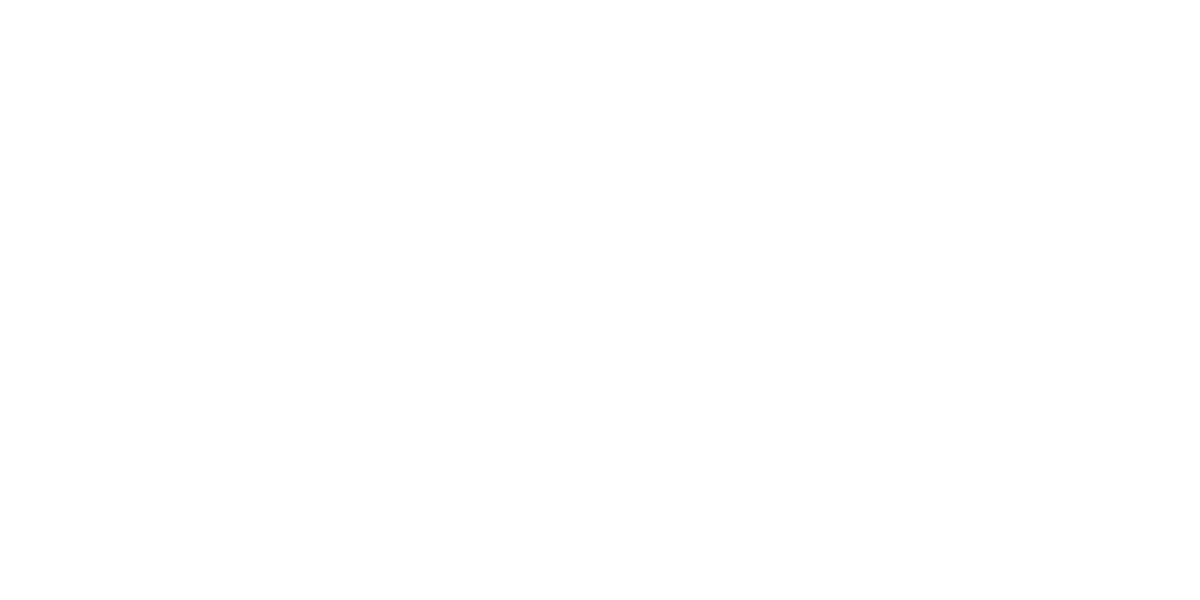

In [346]:
ggplot(df)+geom_bar(aes(x=V1,y=V3))

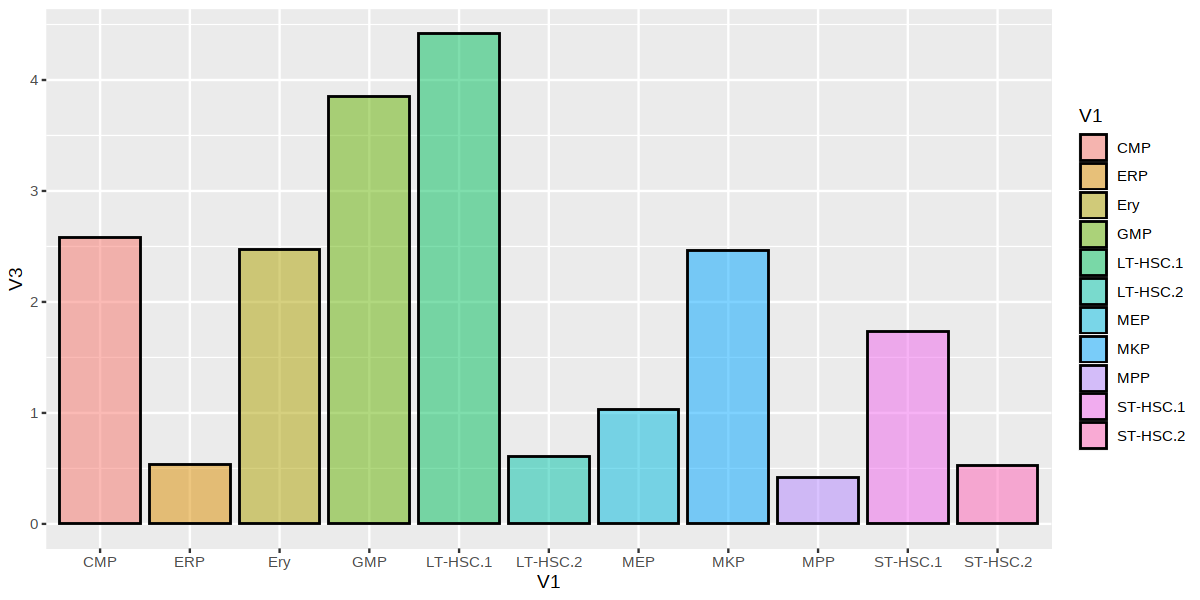

In [354]:
ggplot(df, aes(x = V1, y=V3)) +
    geom_bar(aes(fill=V1),stat='identity',size=0.6,alpha=0.5,color="black")

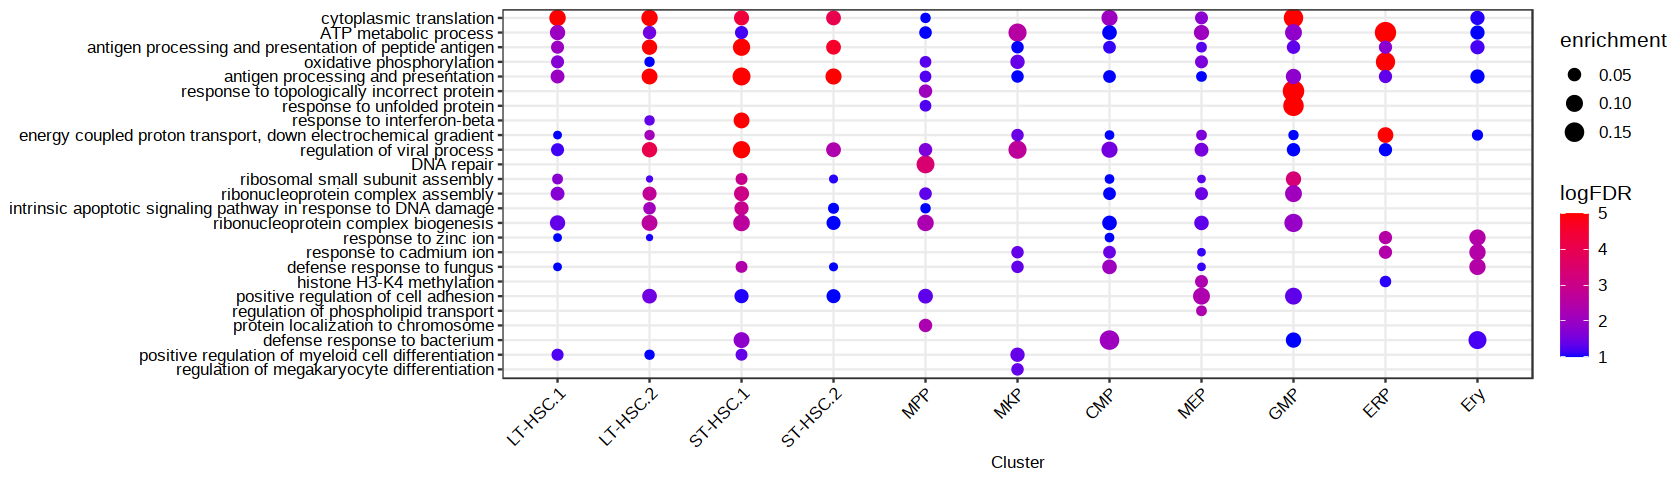

In [594]:
library(ggplot2)
library(DOSE)
df = read.table("enrichment_dotplot.tsv",header=TRUE,sep="\t")
# head(df)

level = c("LT-HSC.1","LT-HSC.2","ST-HSC.1","ST-HSC.2","MPP","MKP","CMP","MEP","GMP","ERP","Ery")
## specifying Y-axis order
orderBy="logFDR"
idx <- order(df[[orderBy]], decreasing = T)
df$Description <- factor(df$Description,levels=rev(unique(df$Description[idx])))

## specifying X-axis order
df$Cluster <- factor(df$Cluster, levels=level)

## main plot fuction
ggplot(df, aes_string(x="Cluster", y="Description", size="enrichment", color="logFDR")) +
        geom_point() + scale_size_continuous(range = c(1, 5))+
        scale_color_continuous(low="blue", high="red", name = "logFDR",limits = c(1, 5),oob = scales::squish,
                guide=guide_colorbar(reverse=F)) +ylab(NULL)+theme_dose(10)+theme(axis.text.x = element_text(angle = 45, vjust =1, hjust=1),
                                                             text = element_text(size=12))
ggsave("all_NFIX.pdf",width=9,heigh=5,useDingbats=FALSE)

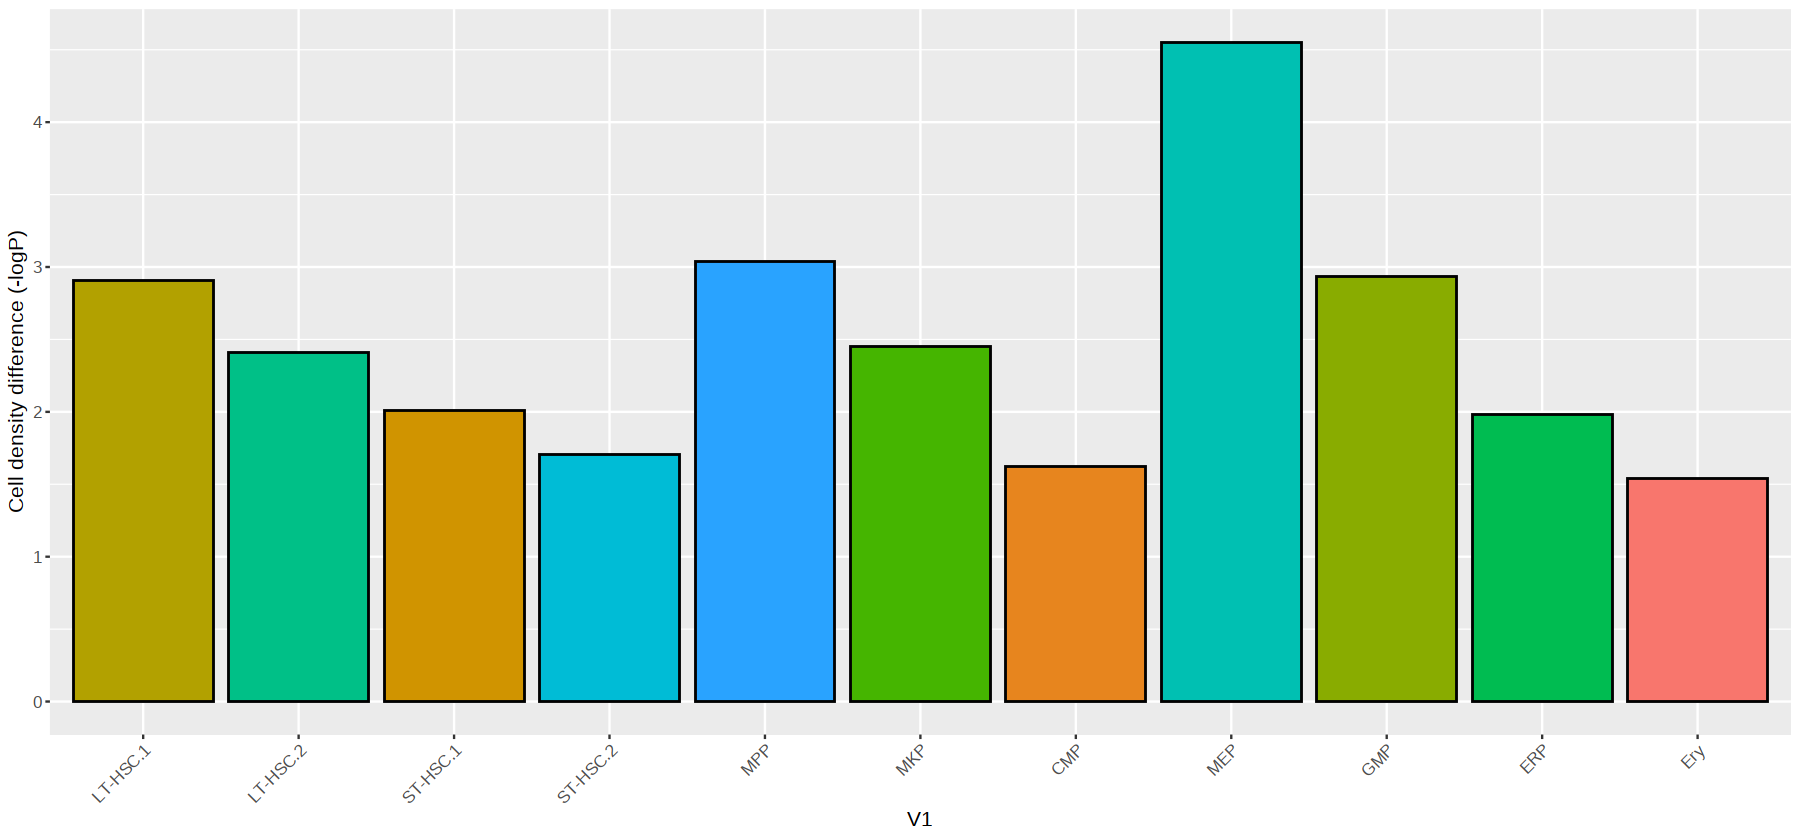

In [533]:
ggplot(df, aes(x = V1, y=V3)) +
    geom_bar(aes(fill=V1),stat='identity',size=0.6,alpha=1,color="black") +
    scale_x_discrete(limits =new_level)+
scale_fill_manual(values=cluster_colors)+theme(axis.text.x = element_text(angle = 45, vjust =1, hjust=1),
                                                             text = element_text(size=12))+
NoLegend()+
ylab("Cell density difference (-logP)")
ggsave("cluster_size.kde-test.barplot.pdf",width=5,height=3)


In [383]:
a=AverageExpression(object = merged_obj,group.by=c("manual_label",'orig.ident'))

In [386]:
write.table(a$RNA,file="avg.exp.tsv",sep="\t")

In [385]:
?AverageExpression

AverageExpression            package:Seurat            R Documentation

_A_v_e_r_a_g_e_d _f_e_a_t_u_r_e _e_x_p_r_e_s_s_i_o_n _b_y _i_d_e_n_t_i_t_y _c_l_a_s_s

_D_e_s_c_r_i_p_t_i_o_n:

     Returns averaged expression values for each identity class

_U_s_a_g_e:

     AverageExpression(
       object,
       assays = NULL,
       features = NULL,
       return.seurat = FALSE,
       group.by = "ident",
       add.ident = NULL,
       slot = "data",
       verbose = TRUE,
       ...
     )
     
_A_r_g_u_m_e_n_t_s:

  object: Seurat object

  assays: Which assays to use. Default is all assays

features: Features to analyze. Default is all features in the assay

return.seurat: Whether to return the data as a Seurat object. Default
          is FALSE

group.by: Categories for grouping (e.g, ident, replicate, celltype);
          'ident' by default

add.ident: (Deprecated) Place an additional label on each cell prior to
          pseudobulking (very useful if you want to observe cluster
          pseudobulk values, separated by replicate, for example)

    slot: Slot(s) to use; if multiple slots are given, assumed to
          follow the order of 'assays' (if specified) or object's
          assays

 verbose: Print messages and show progress bar

     ...: Arguments to be passed to methods such as
          ‘CreateSeuratObject’

_D_e_t_a_i_l_s:

     If slot is set to 'data', this function assumes that the data has
     been log normalized and therefore feature values are exponentiated
     prior to averaging so that averaging is done in non-log space.
     Otherwise, if slot is set to either 'counts' or 'scale.data', no
     exponentiation is performed prior to averaging If ‘return.seurat =
     TRUE’ and slot is not 'scale.data', averaged values are placed in
     the 'counts' slot of the returned object and the log of averaged
     values are placed in the 'data' slot. ‘ScaleData’ is then run on
     the default assay before returning the object. If ‘return.seurat =
     TRUE’ and slot is 'scale.data', the 'counts' slot is left empty,
     the 'data' slot is filled with NA, and 'scale.data' is set to the
     aggregated values.

_V_a_l_u_e:

     Returns a matrix with genes as rows, identity classes as columns.
     If return.seurat is TRUE, returns an object of class ‘Seurat’.

_E_x_a_m_p_l_e_s:

     data("pbmc_small")
     head(AverageExpression(object = pbmc_small))

In [381]:
t(a$RNA)%>% separate(x, c("A", "B"))

ERROR: Error in UseMethod("separate"): no applicable method for 'separate' applied to an object of class "c('matrix', 'array', 'double', 'numeric')"


In [375]:
library(dplyr)
# If you want to split by any non-alphanumeric value (the default):
df <- data.frame(x = c(NA, "x.y", "x.z", "y.z"))
df
df 

x  
1 NA 
2 x.y
3 x.z
4 y.z

A  B 
1 NA NA
2 x  y 
3 x  z 
4 y  z

In [371]:
?AverageExpression

AverageExpression            package:Seurat            R Documentation

_A_v_e_r_a_g_e_d _f_e_a_t_u_r_e _e_x_p_r_e_s_s_i_o_n _b_y _i_d_e_n_t_i_t_y _c_l_a_s_s

_D_e_s_c_r_i_p_t_i_o_n:

     Returns averaged expression values for each identity class

_U_s_a_g_e:

     AverageExpression(
       object,
       assays = NULL,
       features = NULL,
       return.seurat = FALSE,
       group.by = "ident",
       add.ident = NULL,
       slot = "data",
       verbose = TRUE,
       ...
     )
     
_A_r_g_u_m_e_n_t_s:

  object: Seurat object

  assays: Which assays to use. Default is all assays

features: Features to analyze. Default is all features in the assay

return.seurat: Whether to return the data as a Seurat object. Default
          is FALSE

group.by: Categories for grouping (e.g, ident, replicate, celltype);
          'ident' by default

add.ident: (Deprecated) Place an additional label on each cell prior to
          pseudobulking (very useful if you want to observe cluster
          pseudobulk values, separated by replicate, for example)

    slot: Slot(s) to use; if multiple slots are given, assumed to
          follow the order of 'assays' (if specified) or object's
          assays

 verbose: Print messages and show progress bar

     ...: Arguments to be passed to methods such as
          ‘CreateSeuratObject’

_D_e_t_a_i_l_s:

     If slot is set to 'data', this function assumes that the data has
     been log normalized and therefore feature values are exponentiated
     prior to averaging so that averaging is done in non-log space.
     Otherwise, if slot is set to either 'counts' or 'scale.data', no
     exponentiation is performed prior to averaging If ‘return.seurat =
     TRUE’ and slot is not 'scale.data', averaged values are placed in
     the 'counts' slot of the returned object and the log of averaged
     values are placed in the 'data' slot. ‘ScaleData’ is then run on
     the default assay before returning the object. If ‘return.seurat =
     TRUE’ and slot is 'scale.data', the 'counts' slot is left empty,
     the 'data' slot is filled with NA, and 'scale.data' is set to the
     aggregated values.

_V_a_l_u_e:

     Returns a matrix with genes as rows, identity classes as columns.
     If return.seurat is TRUE, returns an object of class ‘Seurat’.

_E_x_a_m_p_l_e_s:

     data("pbmc_small")
     head(AverageExpression(object = pbmc_small))

In [476]:
sessionInfo()

R version 4.0.5 (2021-03-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: RHEL

Matrix products: default
BLAS/LAPACK: /research/rgs01/home/clusterHome/yli11/.conda/envs/captureC/lib/libopenblasp-r0.3.15.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] ks_1.13.2            MASS_7.3-54          rayvertex_0.3.2     
 [4] rayshader_0.26.2     viridis_0.6.1        viridisLite_0.4.0   
 [7] DAseq_1.0.0          SeuratWrappers_0.3.0 velocyto.R_0.6      
[10] Matrix_1.3-4         tidyr_1.1.4          stringr_1.4.0       
[13] cowplot_1.1.1    

In [552]:

merged_obj <- SetIdent(merged_obj, value = merged_obj@meta.data$manual_label)



In [551]:
merged_obj@meta.data$manual_label

[1] ST-HSC.2 LT-HSC.1 Ery      ST-HSC.2 MKP      ERP      MPP      Ery     
    [9] Ery      ST-HSC.1 CMP      Ery      CMP      Ery      CMP      Ery     
   [17] Ery      Ery      ST-HSC.1 ST-HSC.2 CMP      CMP      Ery      MPP     
   [25] MKP      MKP      ST-HSC.1 GMP      Ery      GMP      CMP      ST-HSC.1
   [33] ERP      Ery      ERP      MKP      MKP      MPP      MKP      CMP     
   [41] CMP      CMP      Ery      Ery      ERP      Ery      ST-HSC.1 ERP     
   [49] ERP      Ery      Ery      Ery      MKP      GMP      MKP      ST-HSC.2
   [57] MEP      GMP      Ery      CMP      ST-HSC.2 LT-HSC.1 MPP      ST-HSC.2
   [65] GMP      MPP      MPP      LT-HSC.1 ST-HSC.1 ST-HSC.2 GMP      MKP     
   [73] Ery      MKP      Ery      Ery      GMP      LT-HSC.1 LT-HSC.2 CMP     
   [81] Ery      GMP      ST-HSC.2 ST-HSC.1 GMP      Ery      CMP      MPP     
   [89] ERP      Ery      Ery      ST-HSC.2 CMP      GMP      Ery      MKP     
   [97] ERP      ST-HSC.1 Ery      CMP      CMP      Ery      CMP      Ery     
  [105] MEP      ST-HSC.2 LT-HSC.1 MPP      GMP      LT-HSC.2 MEP      CMP     
  [113] MPP      GMP      LT-HSC.1 CMP      ST-HSC.1 Ery      MEP      CMP     
  [121] Ery      GMP      Ery      LT-HSC.1 ST-HSC.1 GMP      GMP      GMP     
  [129] MEP      MEP      Ery      LT-HSC.1 CMP      MKP      CMP      LT-HSC.1
  [137] LT-HSC.1 Ery      GMP      CMP      CMP      LT-HSC.2 ST-HSC.2 Ery     
  [145] GMP      CMP      MKP      GMP      LT-HSC.1 LT-HSC.1 LT-HSC.1 CMP     
  [153] Ery      Ery      Ery      LT-HSC.1 ERP      ST-HSC.2 MEP      MKP     
  [161] MEP      CMP      ST-HSC.1 LT-HSC.1 MEP      CMP      CMP      LT-HSC.1
  [169] LT-HSC.1 Ery      Ery      ST-HSC.1 ST-HSC.2 CMP      GMP      ERP     
  [177] ST-HSC.1 ST-HSC.1 LT-HSC.1 Ery      Ery      LT-HSC.2 MKP      ST-HSC.1
  [185] LT-HSC.2 Ery      Ery      Ery      CMP      MPP      Ery      Ery     
  [193] Ery      ERP      CMP      LT-HSC.2 CMP      MKP      GMP      GMP     
  [201] ST-HSC.1 Ery      MPP      ERP      GMP      MKP      GMP      LT-HSC.1
  [209] CMP      LT-HSC.1 ST-HSC.2 Ery      ERP      MEP      ST-HSC.2 MKP     
  [217] MKP      CMP      ERP      LT-HSC.1 MEP      Ery      MKP      Ery     
  [225] Ery      Ery      GMP      CMP      ST-HSC.1 Ery      Ery      Ery     
  [233] CMP      Ery      CMP      MKP      Ery      GMP      ERP      CMP     
  [241] GMP      MKP      LT-HSC.1 ST-HSC.2 Ery      Ery      MKP      CMP     
  [249] ST-HSC.1 LT-HSC.1 LT-HSC.2 LT-HSC.1 LT-HSC.1 CMP      MKP      ERP     
  [257] LT-HSC.1 LT-HSC.1 ERP      ERP      ST-HSC.1 Ery      CMP      CMP     
  [265] ST-HSC.1 ST-HSC.2 LT-HSC.1 MPP      ST-HSC.1 MKP      LT-HSC.2 MKP     
  [273] ST-HSC.1 ST-HSC.2 MKP      LT-HSC.2 ERP      CMP      Ery      ST-HSC.1
  [281] LT-HSC.2 GMP      ST-HSC.2 LT-HSC.1 Ery      MKP      ERP      ST-HSC.1
  [289] ST-HSC.1 LT-HSC.1 ERP      CMP      LT-HSC.1 ERP      LT-HSC.2 MKP     
  [297] CMP      Ery      LT-HSC.1 Ery      LT-HSC.1 ST-HSC.1 LT-HSC.1 Ery     
  [305] CMP      LT-HSC.2 GMP      GMP      LT-HSC.1 LT-HSC.2 ST-HSC.1 LT-HSC.1
  [313] MKP      MKP      CMP      GMP      LT-HSC.1 MPP      MKP      ST-HSC.1
  [321] ST-HSC.2 CMP      ST-HSC.1 LT-HSC.1 CMP      CMP      ST-HSC.2 ST-HSC.2
  [329] MPP      CMP      CMP      LT-HSC.1 CMP      ERP      GMP      LT-HSC.2
  [337] ST-HSC.1 ST-HSC.1 LT-HSC.2 MEP      ST-HSC.1 MKP      CMP      ST-HSC.1
  [345] MKP      Ery      Ery      ST-HSC.1 LT-HSC.1 MPP      LT-HSC.1 GMP     
  [353] GMP      GMP      CMP      CMP      MKP      Ery      CMP      ST-HSC.1
  [361] CMP      ST-HSC.2 ST-HSC.1 LT-HSC.2 Ery      Ery      Ery      LT-HSC.2
  [369] ST-HSC.1 LT-HSC.1 GMP      CMP      MKP      Ery      ERP      LT-HSC.1
  [377] LT-HSC.1 CMP      LT-HSC.1 LT-HSC.1 ST-HSC.1 LT-HSC.2 ST-HSC.2 ST-HSC.1
  [385] MPP      GMP      ST-HSC.1 LT-HSC.2 ST-HSC.2 LT-HSC.2 ST-HSC.1 MPP     
  [393] CMP      MPP      Ery      CMP      CMP      CMP      ST-HSC.1 LT-HSC.1
  [4

In [554]:
markers <- FindAllMarkers(merged_obj, min.pct = 0.2, logfc.threshold = 0.25)
head(markers)

Calculating cluster Ery

Calculating cluster CMP

Calculating cluster ST-HSC.1

Calculating cluster LT-HSC.1

Calculating cluster GMP

Calculating cluster MKP

Calculating cluster ERP

Calculating cluster LT-HSC.2

Calculating cluster MEP

Calculating cluster ST-HSC.2

Calculating cluster MPP



p_val avg_log2FC pct.1 pct.2 p_val_adj cluster gene    
Hbb-bs   0     3.083274   0.428 0.032 0         Ery     Hbb-bs  
Car1     0     2.874402   0.984 0.266 0         Ery     Car1    
Blvrb    0     2.605076   0.988 0.414 0         Ery     Blvrb   
C1qtnf12 0     2.553328   0.980 0.312 0         Ery     C1qtnf12
Hba-a1   0     2.107936   0.452 0.013 0         Ery     Hba-a1  
Ermap    0     2.046245   0.981 0.102 0         Ery     Ermap

In [562]:
write.table(markers,"denovo.marker.csv",sep=",")

In [561]:
top_markers = list()
for (i in c(20)){
    top_markers[[paste("top",i,sep="")]] = markers %>%
        group_by(cluster) %>%
        top_n(n = i, wt = avg_log2FC)
}
library(corrplot)
detach("package:RColorBrewer", unload=TRUE)

library(RColorBrewer)
options(repr.plot.width = 10, repr.plot.height = 10)
av.exp <- AverageExpression(merged_obj)$RNA

for (i in c(20)){
    data = top_markers[[paste("top",i,sep="")]]
    cor.exp <- cor(av.exp[data$gene,])
    a=corrplot(cor.exp, method = 'number',is.corr = FALSE,col = rev(brewer.pal(n = 10, name = 'RdBu')),order = 'hclust', addrect = 10)
   
    print (a)
}

Warning message:
“‘RColorBrewer’ namespace cannot be unloaded:
  namespace ‘RColorBrewer’ is imported by ‘ComplexHeatmap’, ‘Seurat’ so cannot be unloaded”
Warning message in get(var, frame, inherits = FALSE):
“restarting interrupted promise evaluation”
Warning message in get(var, frame, inherits = FALSE):
“internal error -3 in R_decompress1”
Warning message in rev(brewer.pal(n = 10, name = "RdBu")):
“restarting interrupted promise evaluation”
Warning message in rev(brewer.pal(n = 10, name = "RdBu")):
“internal error -3 in R_decompress1”


ERROR: Error in rev(brewer.pal(n = 10, name = "RdBu")): lazy-load database '/research/rgs01/home/clusterHome/yli11/.conda/envs/captureC/lib/R/library/RColorBrewer/R/RColorBrewer.rdb' is corrupt


In [559]:
?brewer

RColorBrewer           package:RColorBrewer            R Documentation

_C_o_l_o_r_B_r_e_w_e_r _p_a_l_e_t_t_e_s

_D_e_s_c_r_i_p_t_i_o_n:

     Creates nice looking color palettes especially for thematic maps

_U_s_a_g_e:

     brewer.pal(n, name)
     display.brewer.pal(n, name)
     display.brewer.all(n=NULL, type="all", select=NULL, exact.n=TRUE, 
     colorblindFriendly=FALSE)
     brewer.pal.info
     
_A_r_g_u_m_e_n_t_s:

       n: Number of different colors in the palette, minimum 3, maximum
          depending on palette

    name: A palette name from the lists below

    type: One of the string "div", "qual", "seq", or "all"

  select: A list of names of existing palettes

 exact.n: If TRUE, only display palettes with a color number given by n

colorblindFriendly: if TRUE, display only colorblind friendly palettes

_D_e_t_a_i_l_s:

     ‘brewer.pal’ makes the color palettes from ColorBrewer available
     as R palettes.

     ‘display.brewer.pal()’ displays the selected palette in a graphics
     window.

     ‘display.brewer.all()’ displays the a few palettes simultanueously
     in a graphics window.

     ‘brewer.pal.info’ returns information about the available palettes
     as a dataframe. ‘brewer.pal.info’ is not a function, it is a
     variable. This might change in the future.

     For details and an interactive palette selection tools see
     http://colorbrewer.org. It is free to use, although ColorBrewer's
     designers would appreciate it if you could cite the ColorBrewer
     project if you decide to use one of our color schemes.

     There are 3 types of palettes, sequential, diverging, and
     qualitative.
     1. Sequential palettes are suited to ordered data that progress
     from low to high.  Lightness steps dominate the look of these
     schemes, with light colors for low data values to dark colors for
     high data values.
     2. Diverging palettes put equal emphasis on mid-range critical
     values and extremes at both ends of the data range. The critical
     class or break in the middle of the legend is emphasized with
     light colors and low and high extremes are emphasized with dark
     colors that have contrasting hues.
     3. Qualitative palettes do not imply magnitude differences between
     legend classes, and hues are used to create the primary visual
     differences between classes.  Qualitative schemes are best suited
     to representing nominal or categorical data.

     The sequential palettes names are
     Blues BuGn BuPu GnBu Greens Greys Oranges OrRd PuBu PuBuGn PuRd
     Purples RdPu Reds YlGn YlGnBu YlOrBr YlOrRd

     All the sequential palettes are available in variations from 3
     different values up to 9 different values.

     The diverging palettes are
     BrBG PiYG PRGn PuOr RdBu RdGy RdYlBu RdYlGn Spectral

     All the diverging palettes are available in variations from 3
     different values up to 11 different values.

     For qualitative palettes, the lowest number of distinct values
     available always is 3, but the largest number is different for
     different palettes. It is given together with the palette names in
     the following table.

       Accent    8 
       Dark2     8 
       Paired   12 
       Pastel1   9 
       Pastel2   8 
       Set1      9 
       Set2      8 
       Set3     12 
      
     ColorBrewer is Copyright (c) 2002 Cynthia Brewer, Mark Harrower,
     and The Pennsylvania State University.  All rights reserved.
     The ColorBrewer palettes have been included in this R package with
     permission of the copyright holder.
     For license details see the file ‘COPYING’ included in this
     package.

_V_a_l_u_e:

     A palette
     You will get an error when you ask for a nonexisting palette, and
     you will get a warning if a palette you asked for exists but not
     with as many different leves as you asked for.

_N_o_t_e:

     More information on 

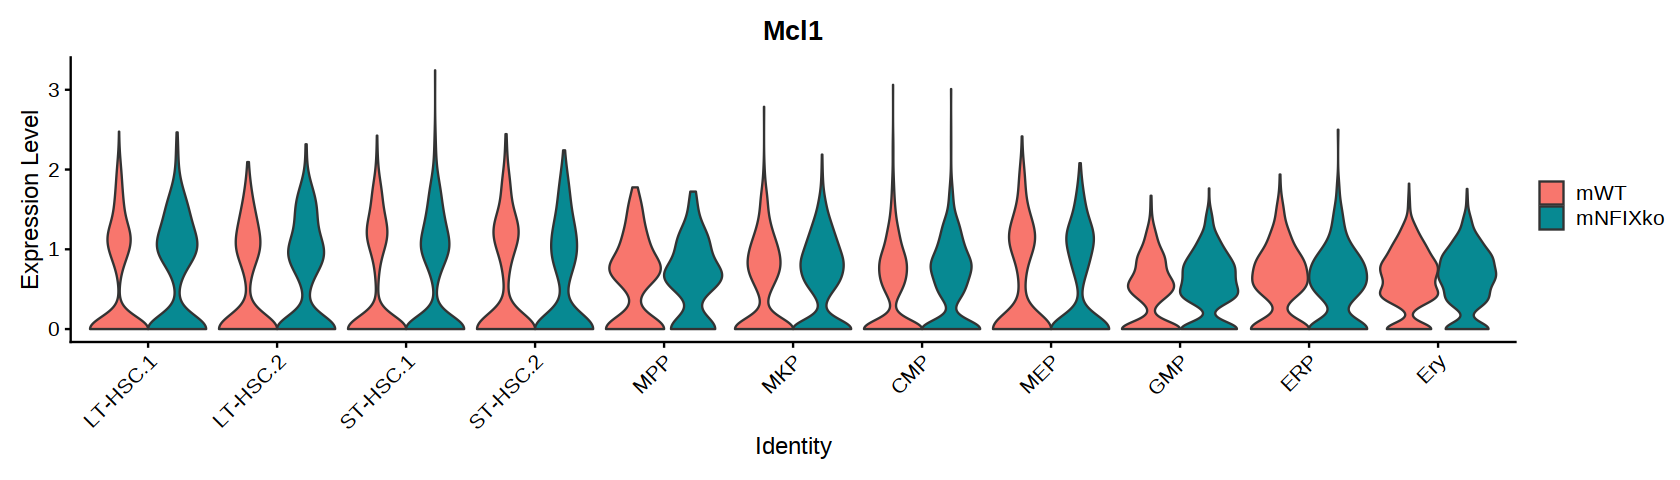

In [581]:
options(repr.plot.width = 14, repr.plot.height =4)

VlnPlot(merged_obj, features = c("Mcl1"),group.by="manual_label",split.by="orig.ident",pt.size=0)+scale_x_discrete(limits =new_level)
ggsave("Mcl1.pdf",width=10,height=4)

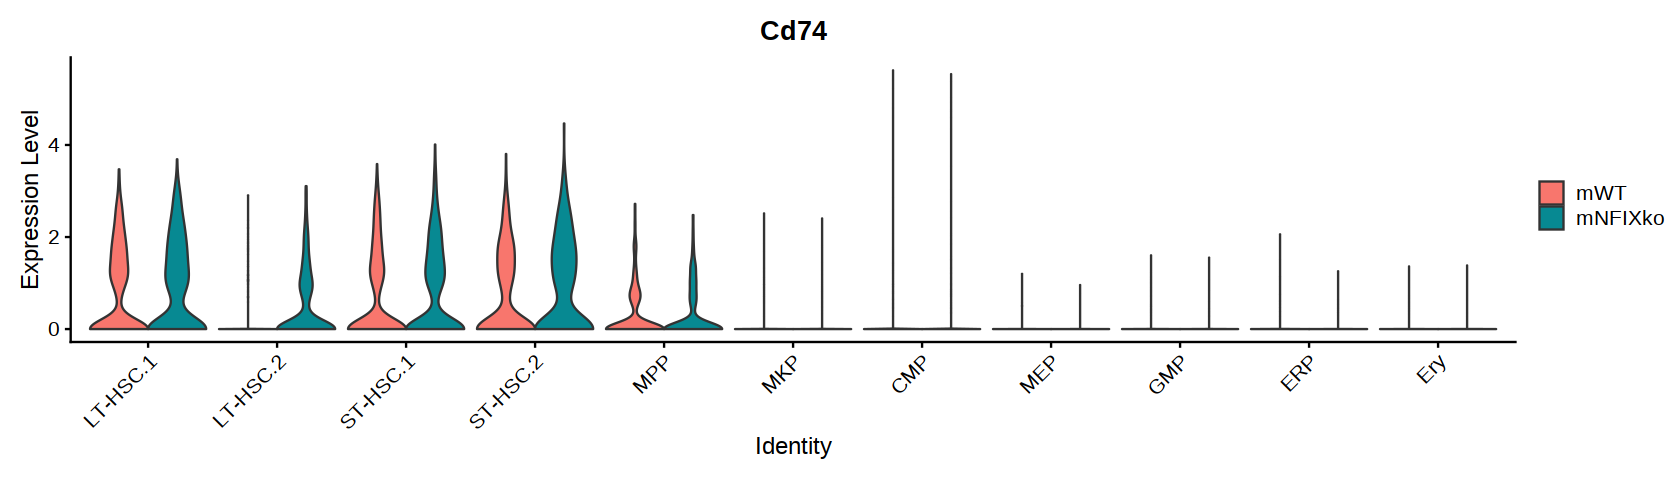

In [573]:
options(repr.plot.width = 14, repr.plot.height =4)

VlnPlot(merged_obj, features = c("Cd74"),group.by="manual_label",split.by="orig.ident",pt.size=0)+scale_x_discrete(limits =new_level)
ggsave("Cd74.pdf",width=10,height=4)

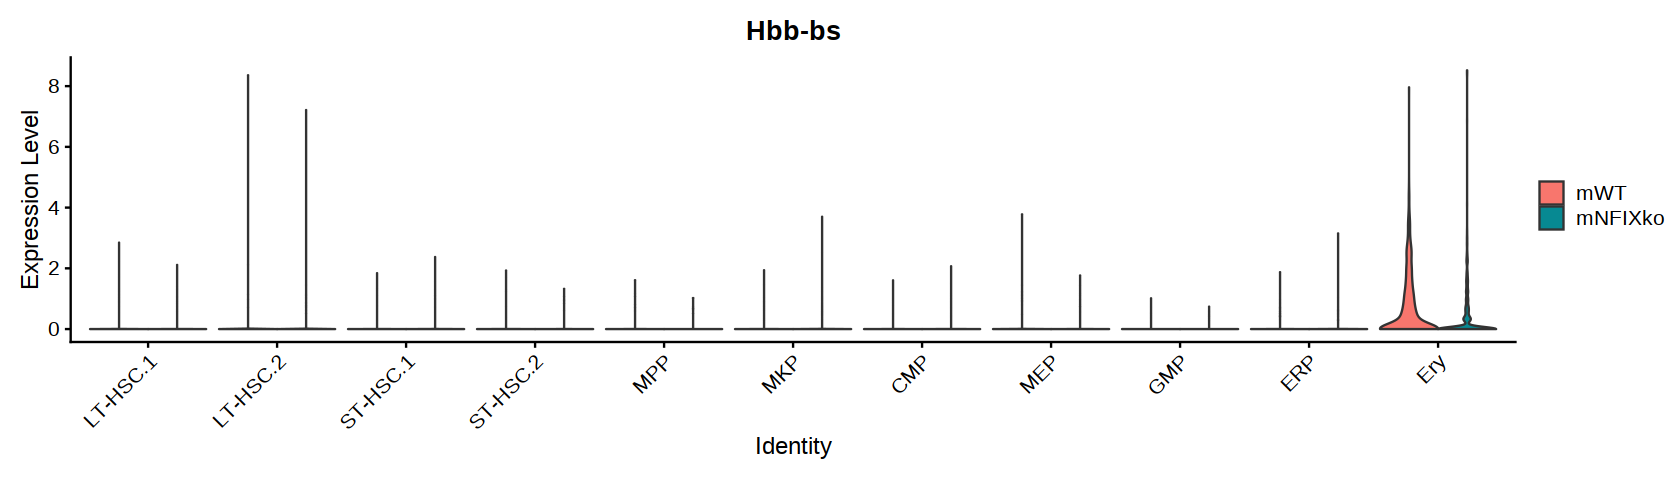

In [575]:
options(repr.plot.width = 14, repr.plot.height =4)

VlnPlot(merged_obj, features = c("Hbb-bs"),group.by="manual_label",split.by="orig.ident",pt.size=0)+scale_x_discrete(limits =new_level)
ggsave("Hbb-bs.pdf",width=10,height=4)

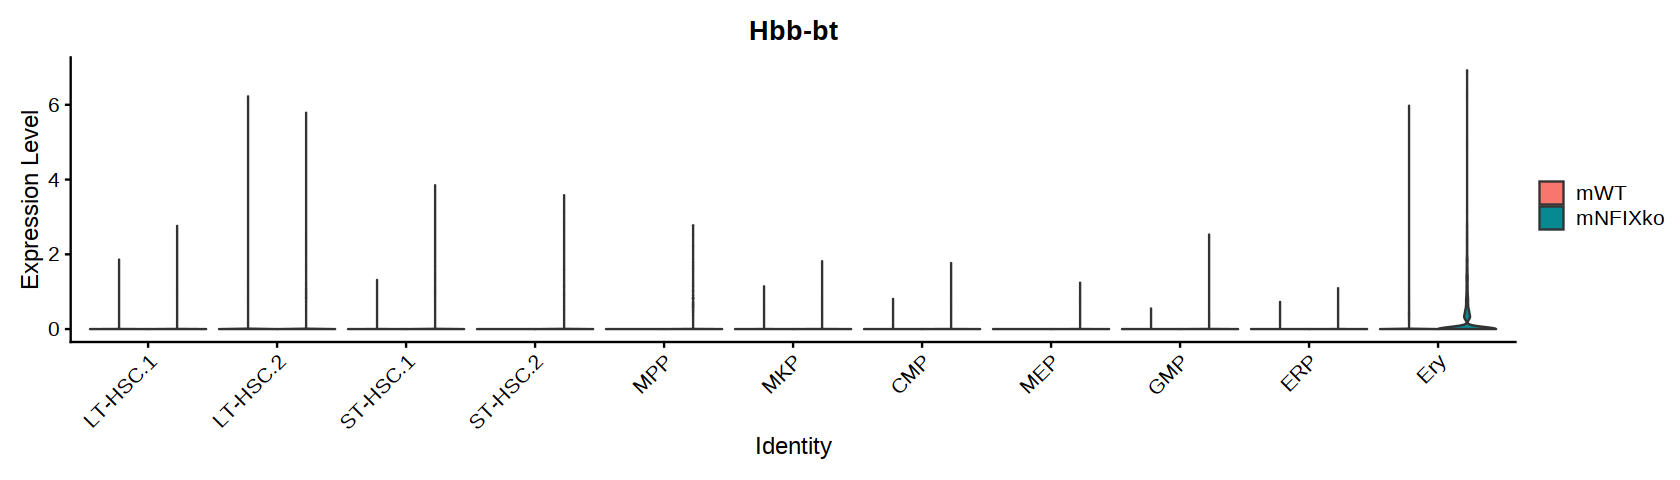

In [579]:
options(repr.plot.width = 14, repr.plot.height =4)

VlnPlot(merged_obj, features = c("Hbb-bt"),group.by="manual_label",split.by="orig.ident",pt.size=0)+scale_x_discrete(limits =new_level)
ggsave("Hbb-bt.pdf",width=10,height=4)

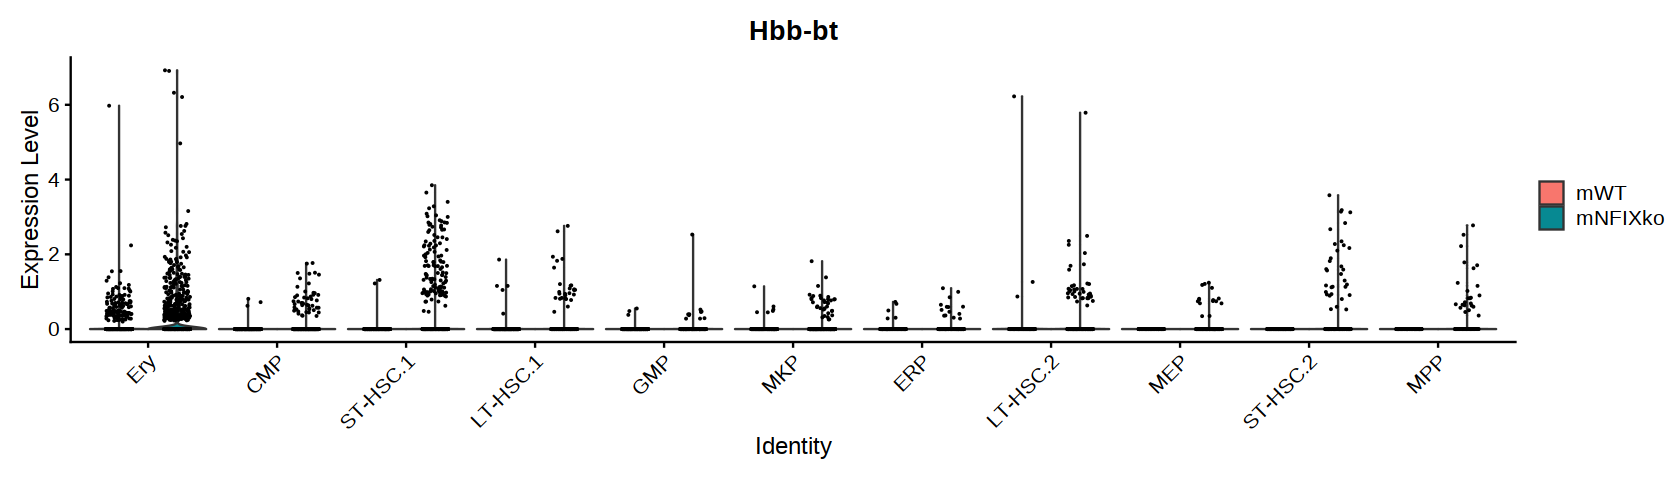

In [578]:
options(repr.plot.width = 14, repr.plot.height =4)

VlnPlot(merged_obj, features = c("Hbb-bt"),group.by="manual_label",split.by="orig.ident")